Plotting the correlation matrix


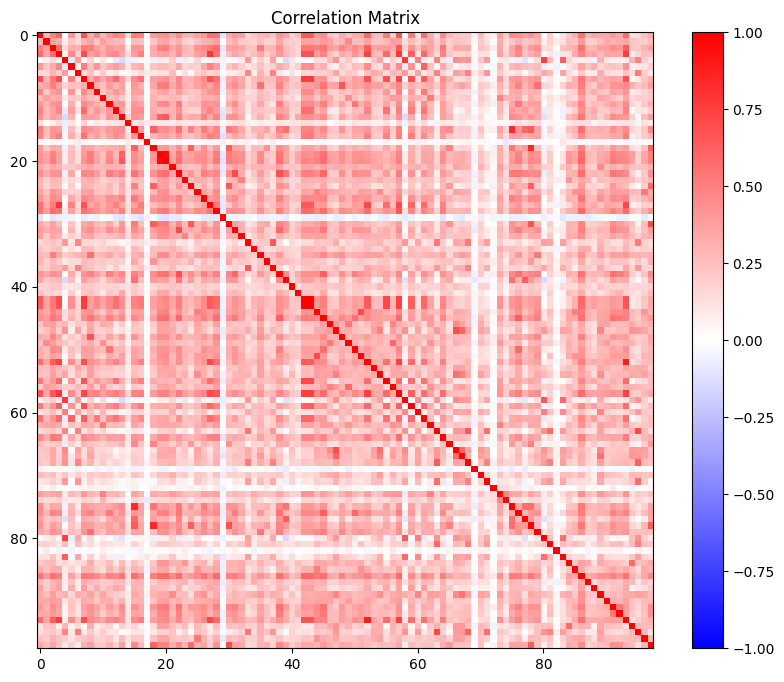

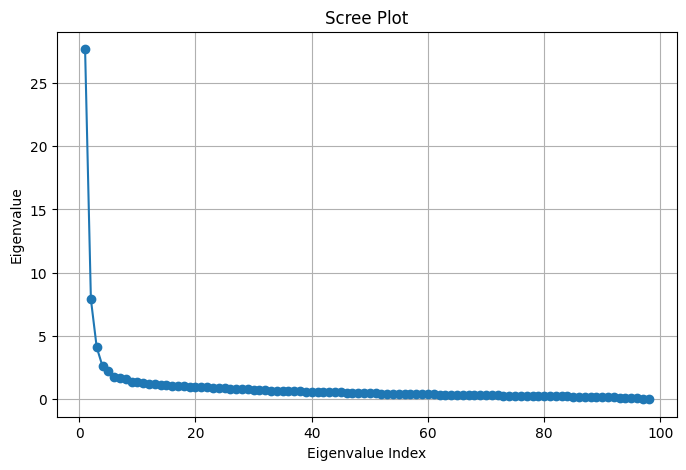

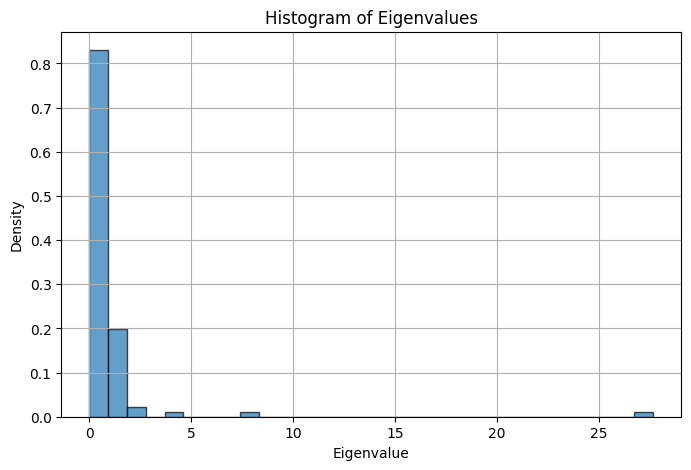

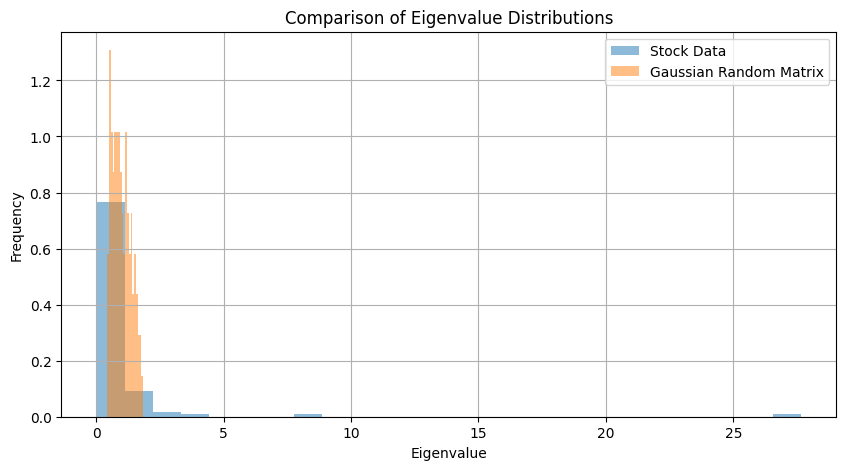

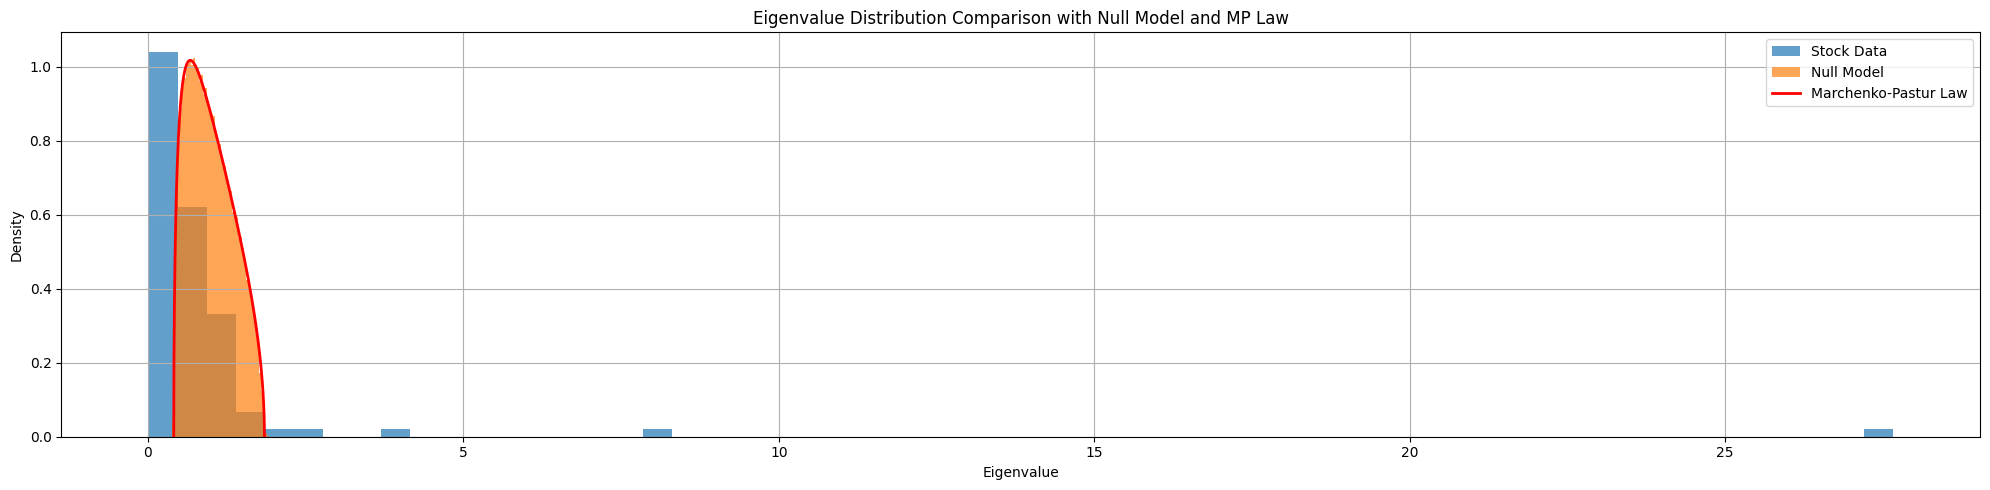

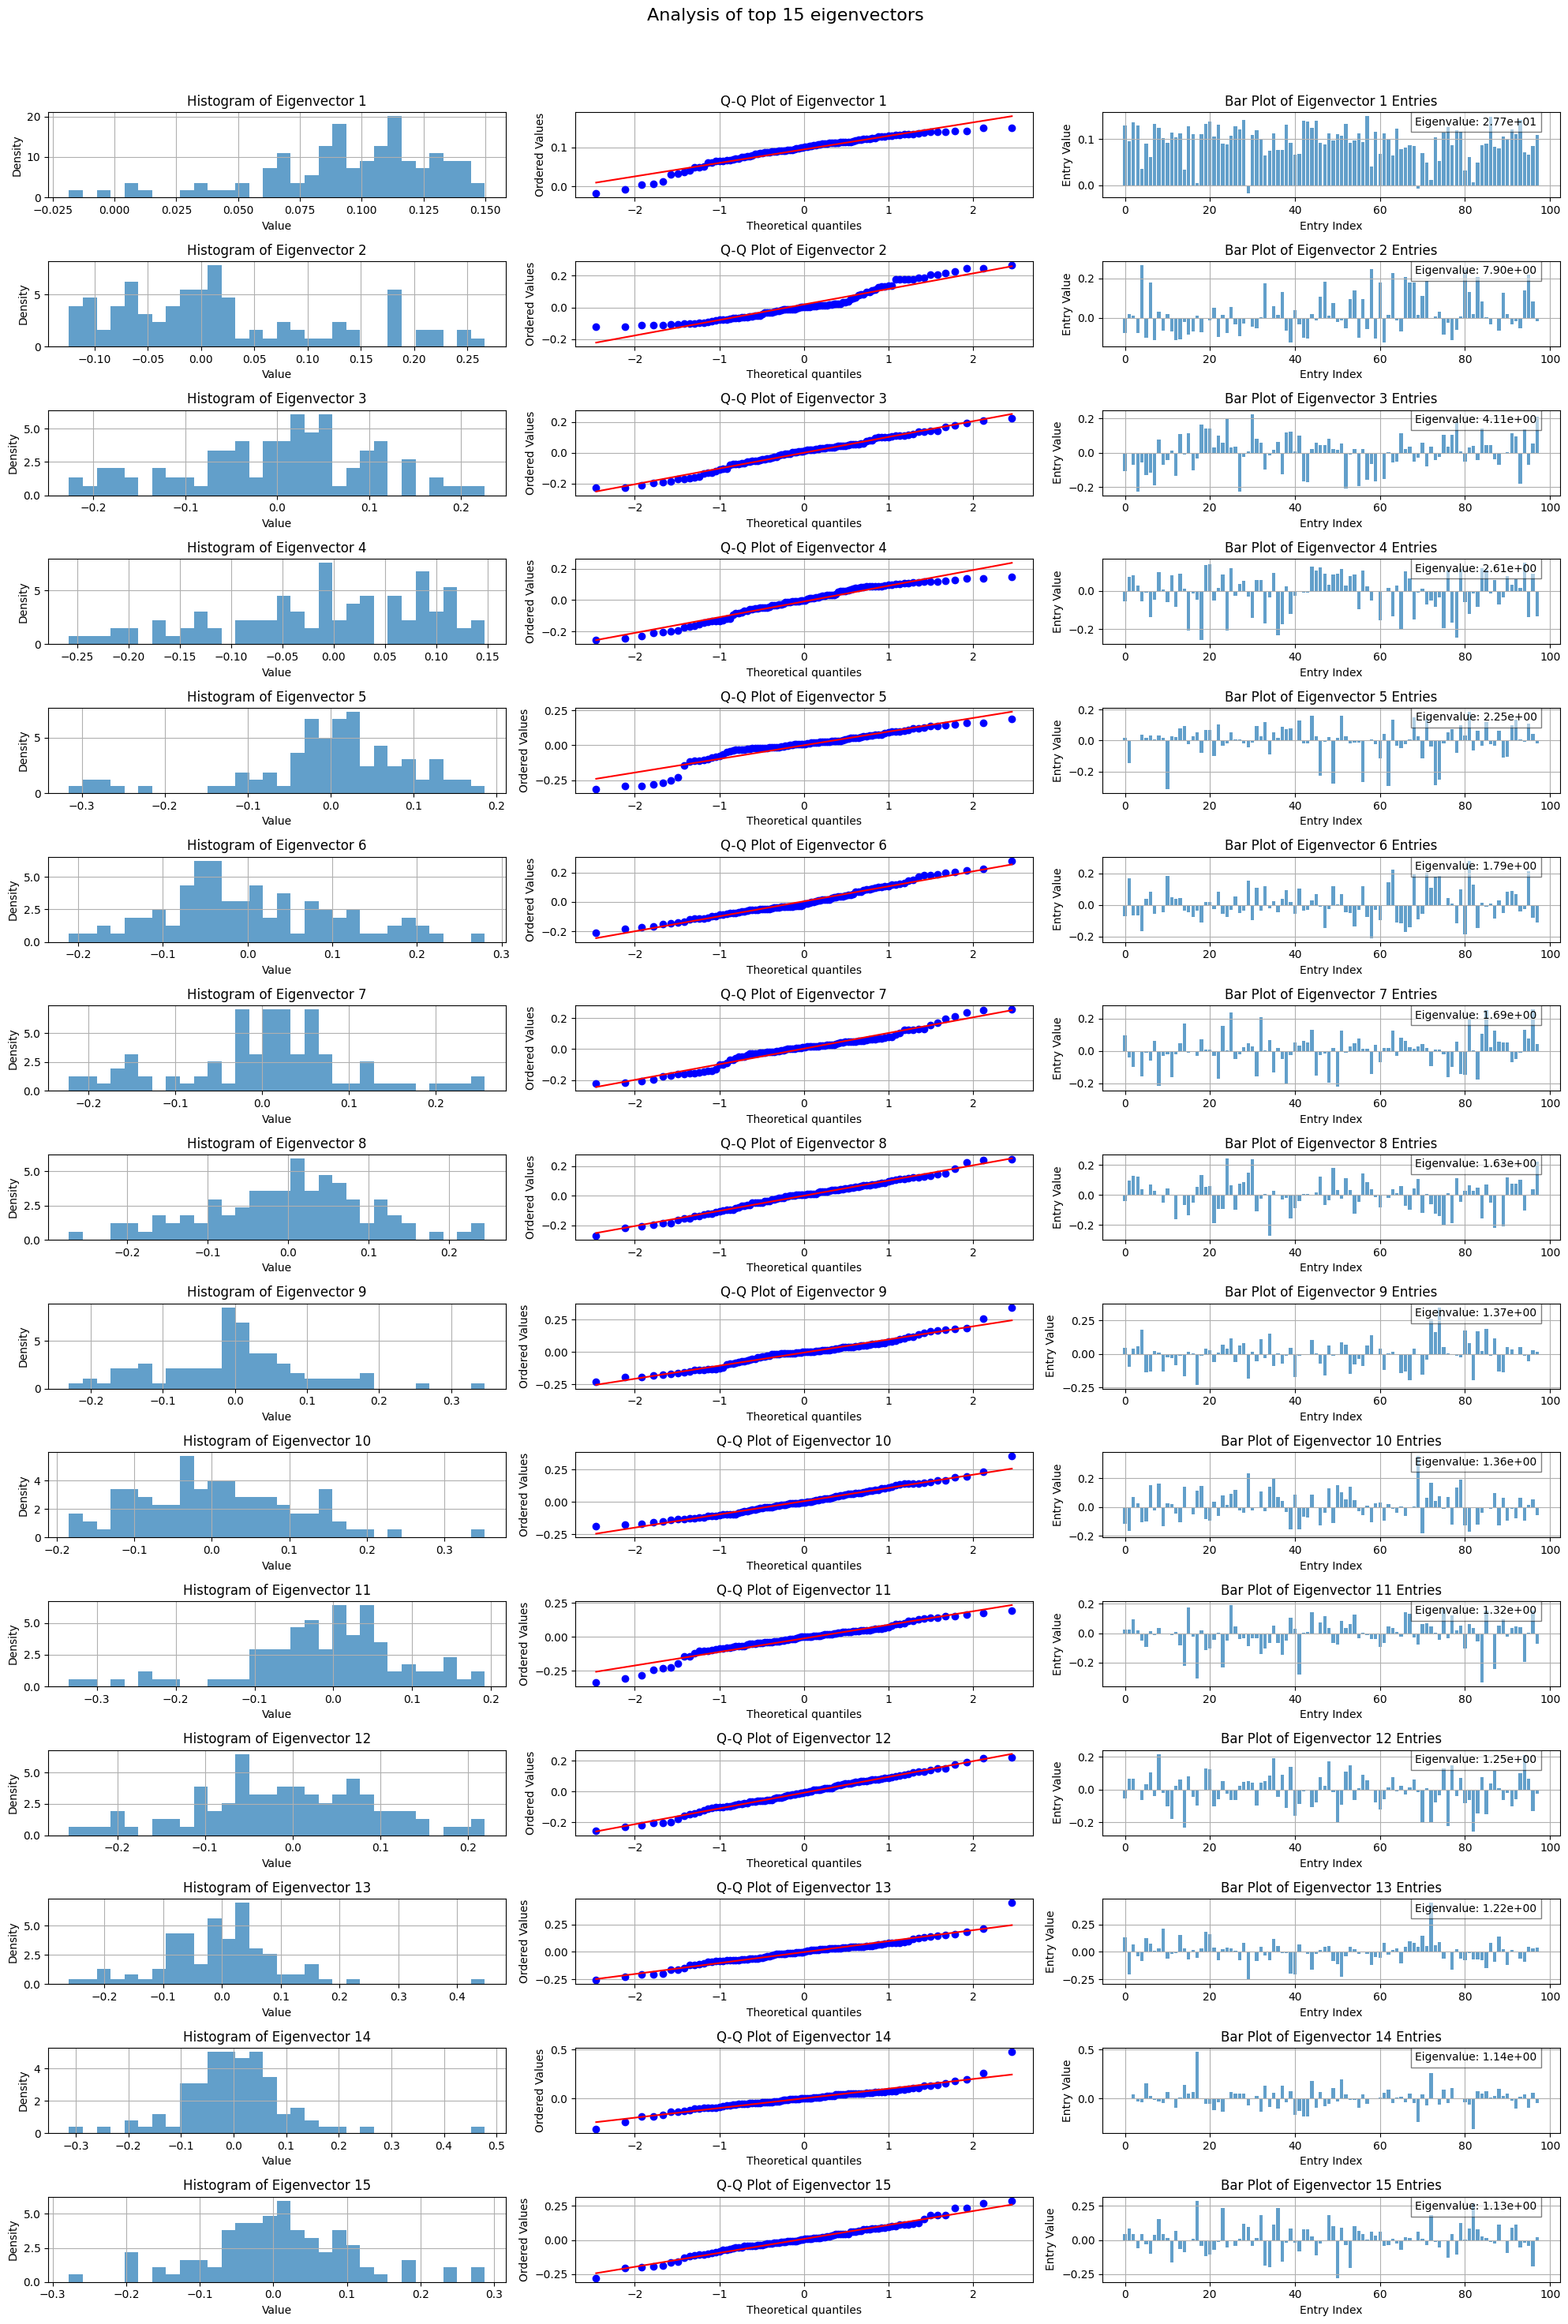

Number of significant eigenvalues: 5
Generating bi-plots for the top 5 eigenvectors


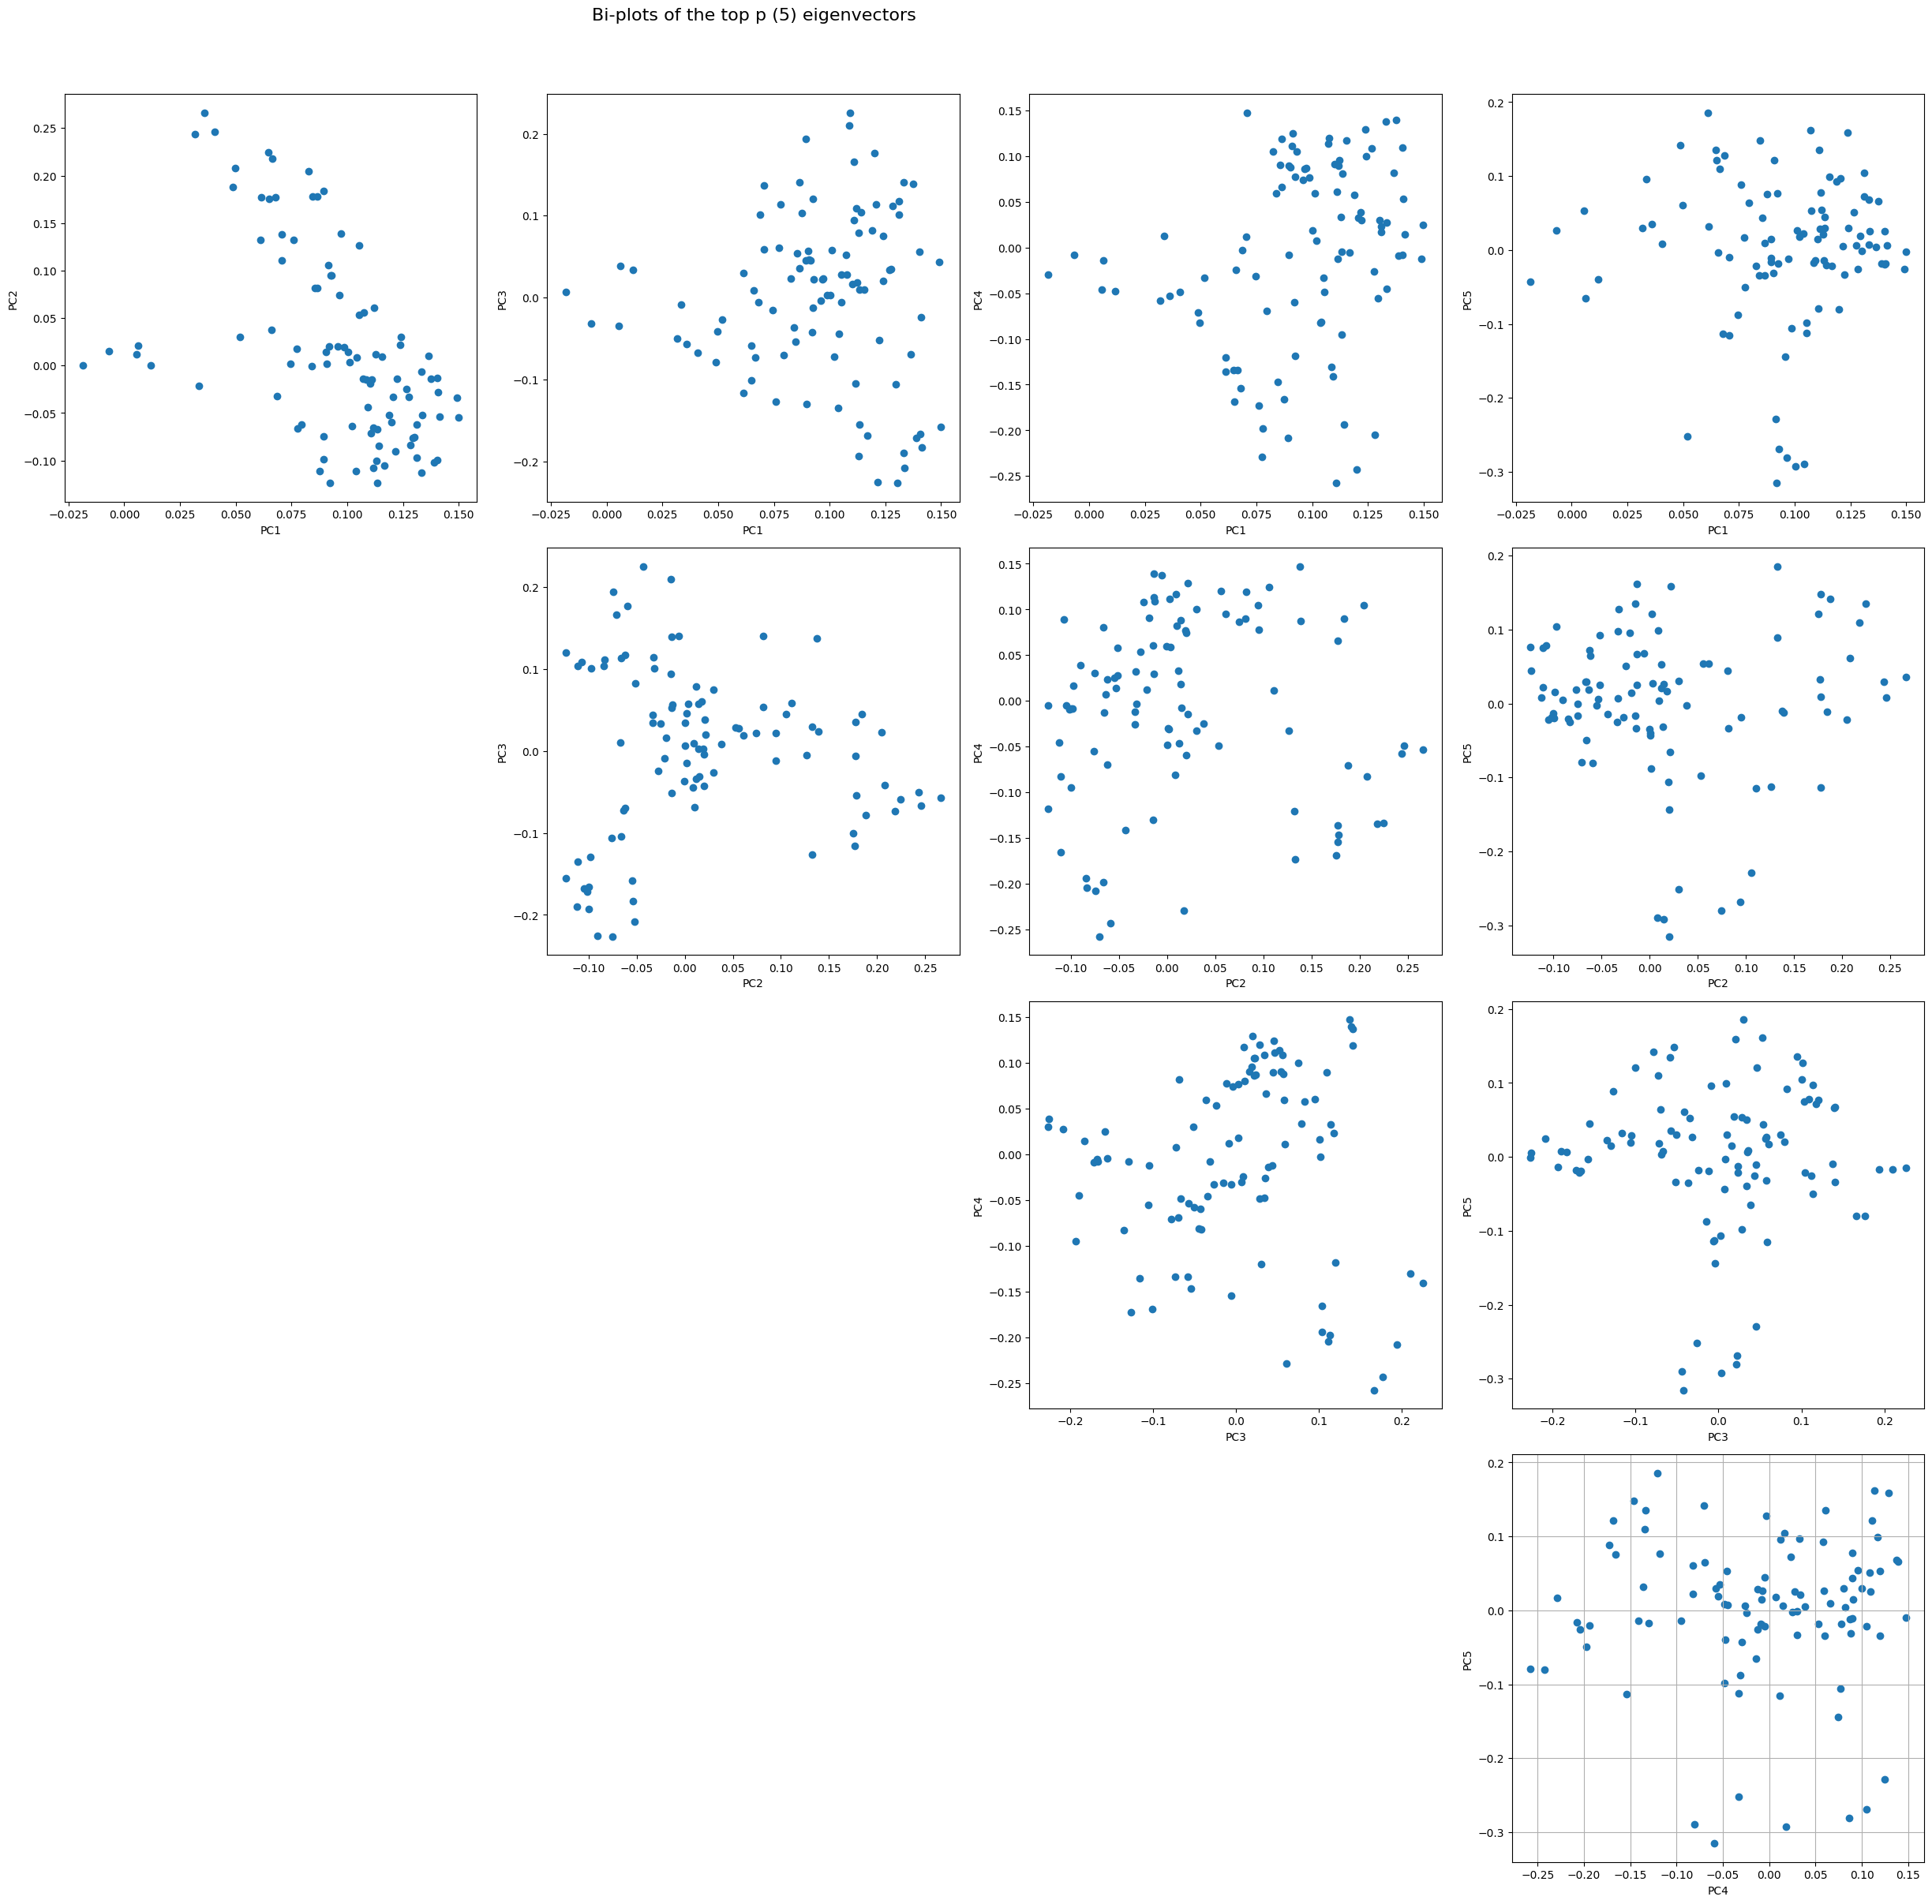

filtering eigenvectors based on confidence level
Threshold for filtering eigenvectors: 0.1817680053036141
Plotting the histogram of the filtered eigenvectors


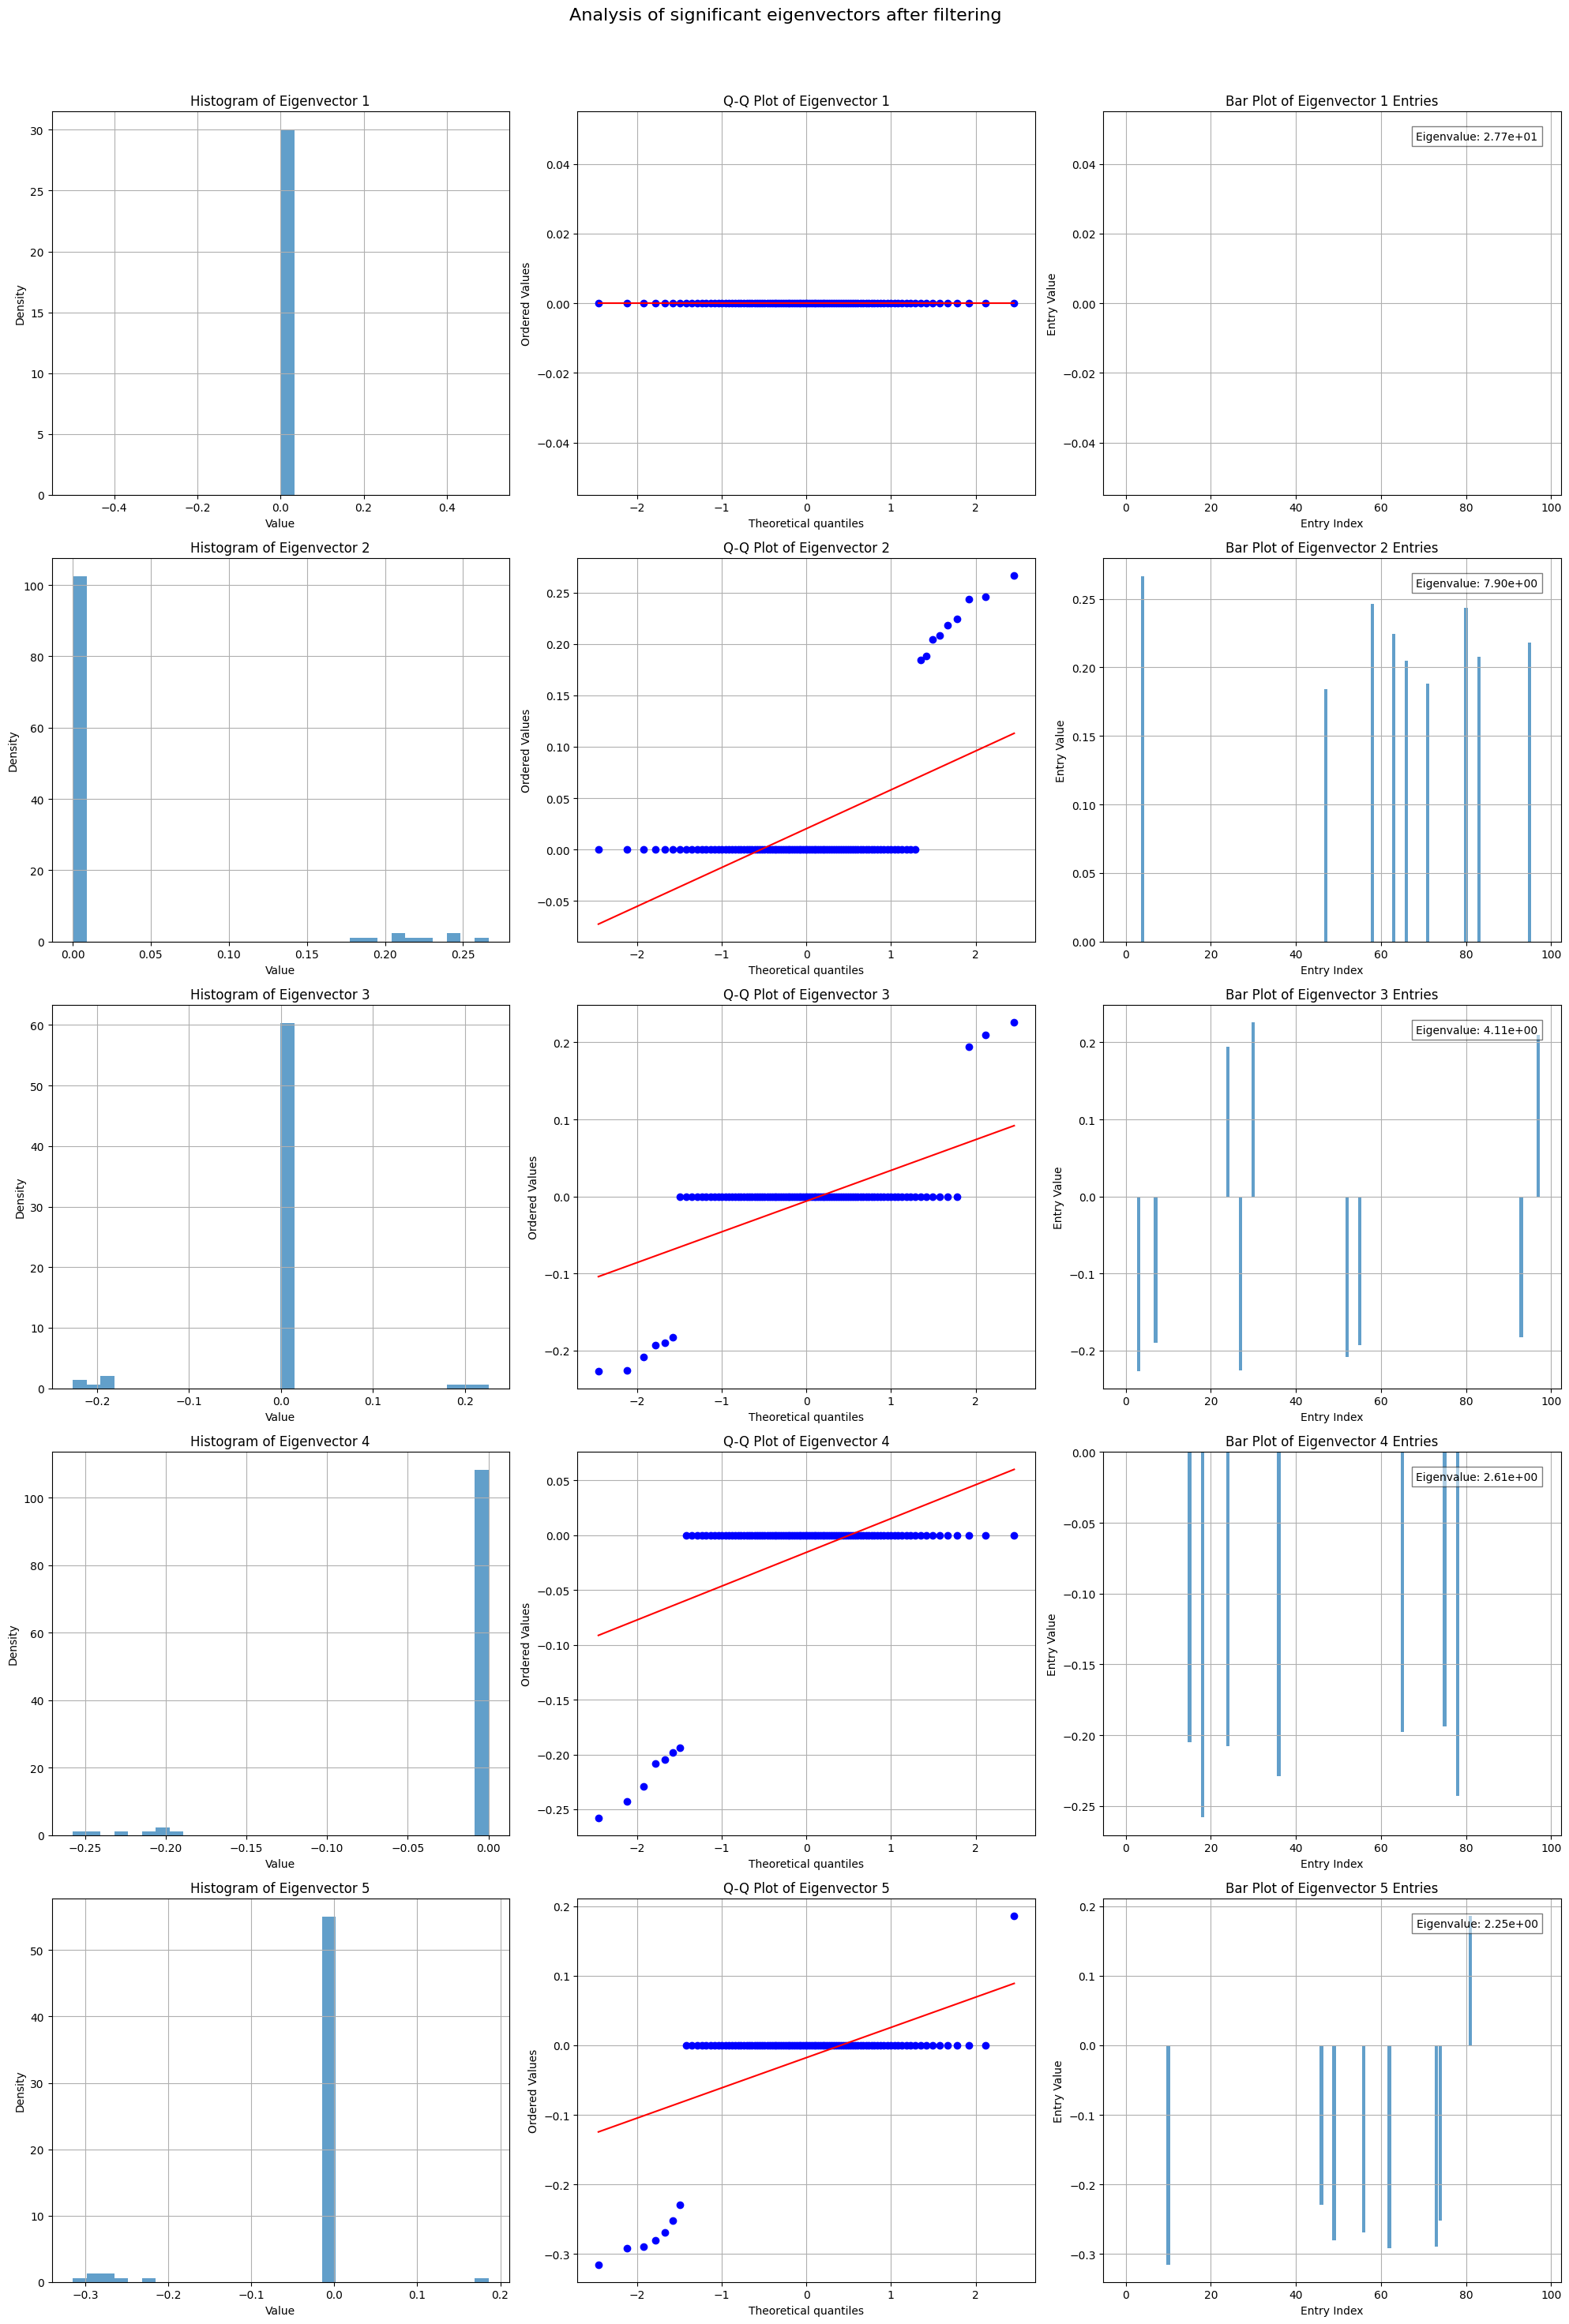

Generating bi-plots for the filtered eigenvectors


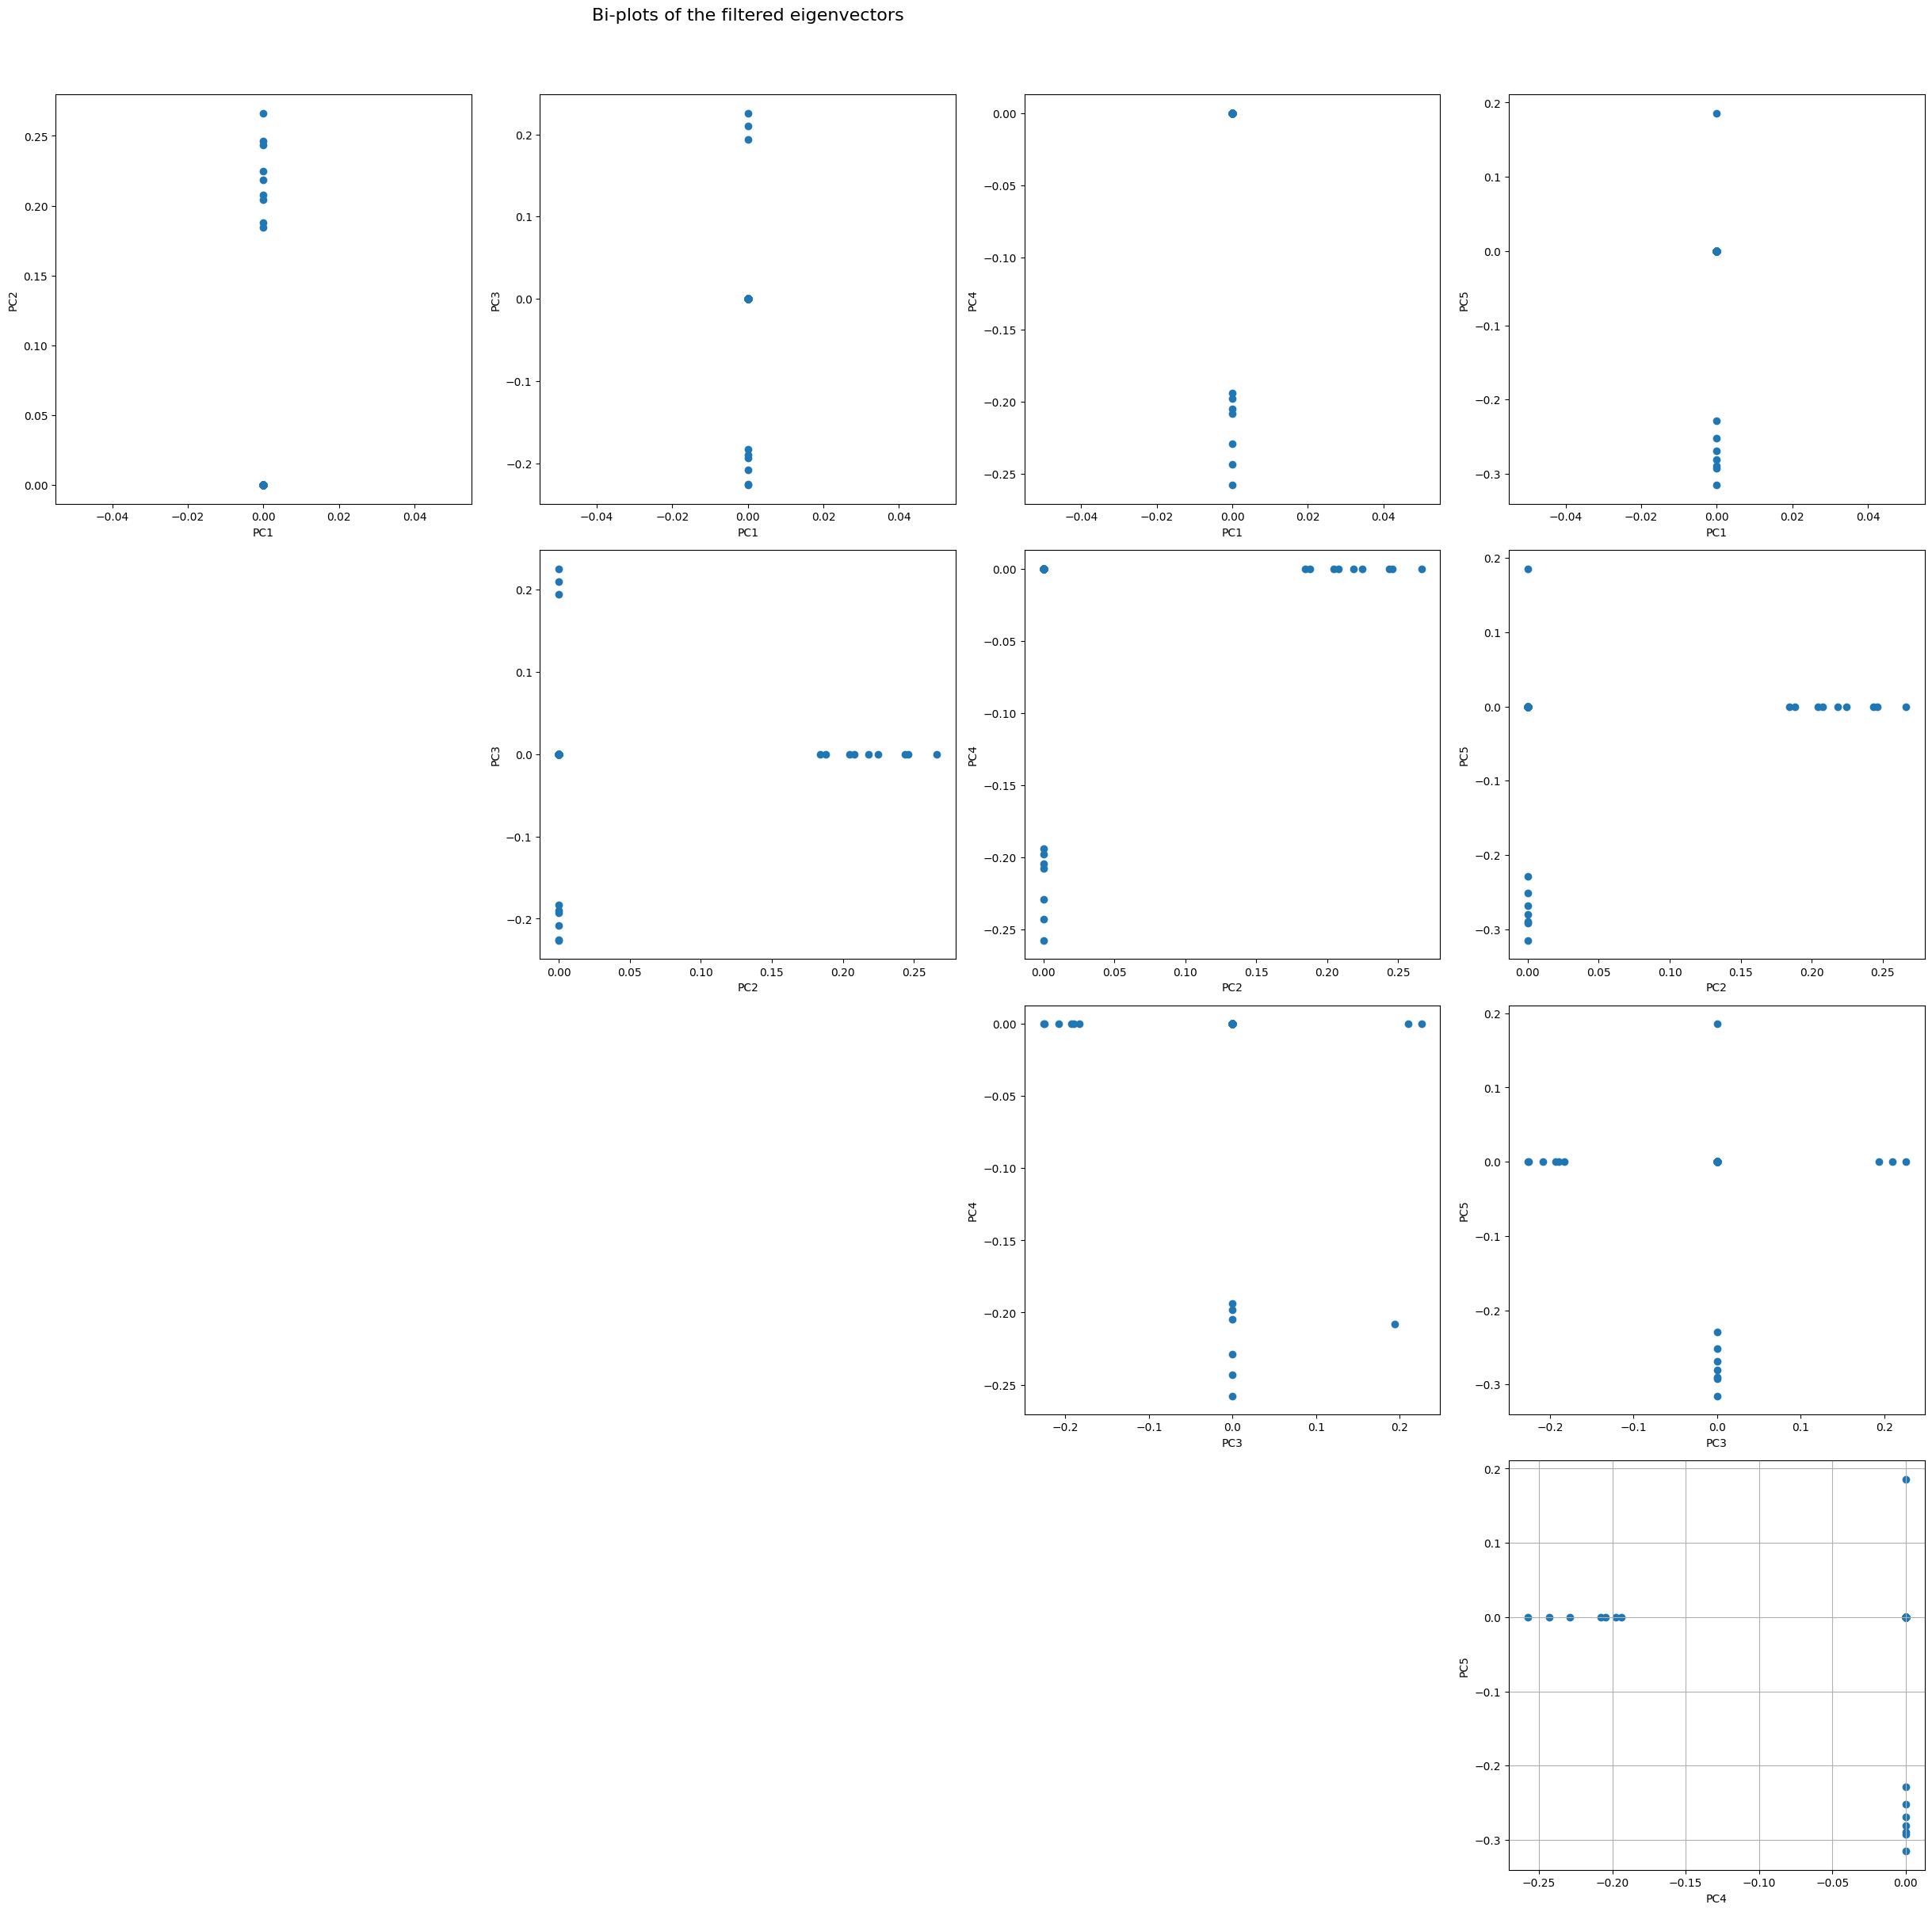

Identifying groups based on the top p 5 eigenvectors

Cluster 0:
   Symbol                                Company Name                  Sector
0    AAPL                                  Apple Inc.              Technology
1    ABBV                                 AbbVie Inc.              Healthcare
2     ACN                               Accenture plc              Technology
3    ADBE                                  Adobe Inc.              Technology
5     AMD                Advanced Micro Devices, Inc.              Technology
7    AMZN                            Amazon.com, Inc.       Consumer Cyclical
9    AVGO                               Broadcom Inc.              Technology
10    AZN                             AstraZeneca PLC              Healthcare
12   BABA               Alibaba Group Holding Limited       Consumer Cyclical
16   BKNG                       Booking Holdings Inc.       Consumer Cyclical
21    BUD                  Anheuser-Busch InBev SA/NV      Consumer Defensive

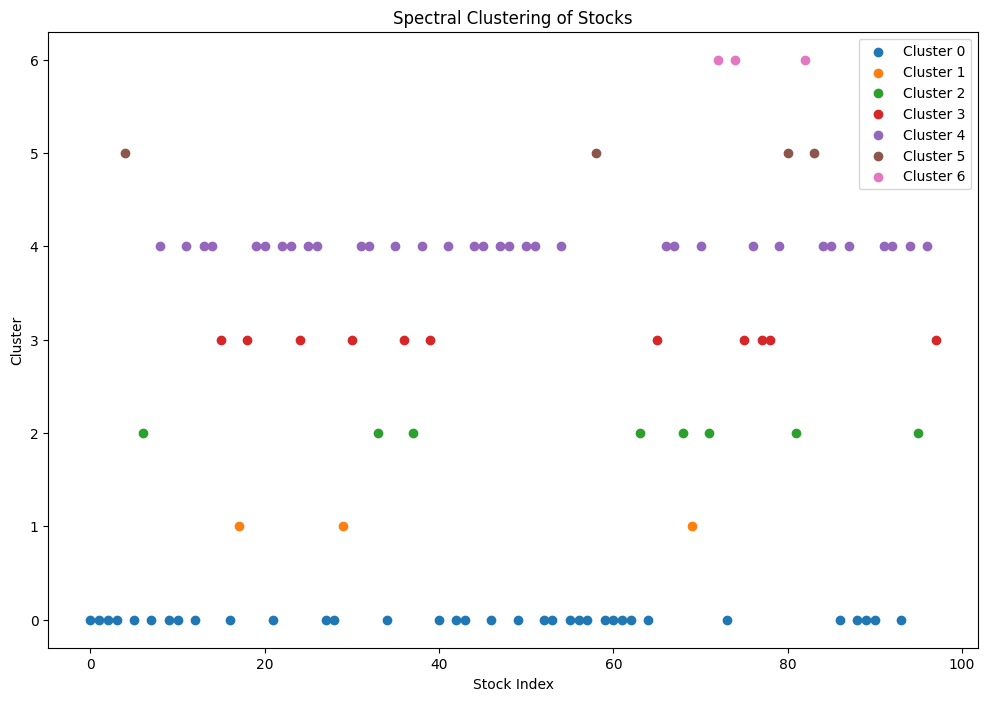

Plotting the reordered correlation matrix


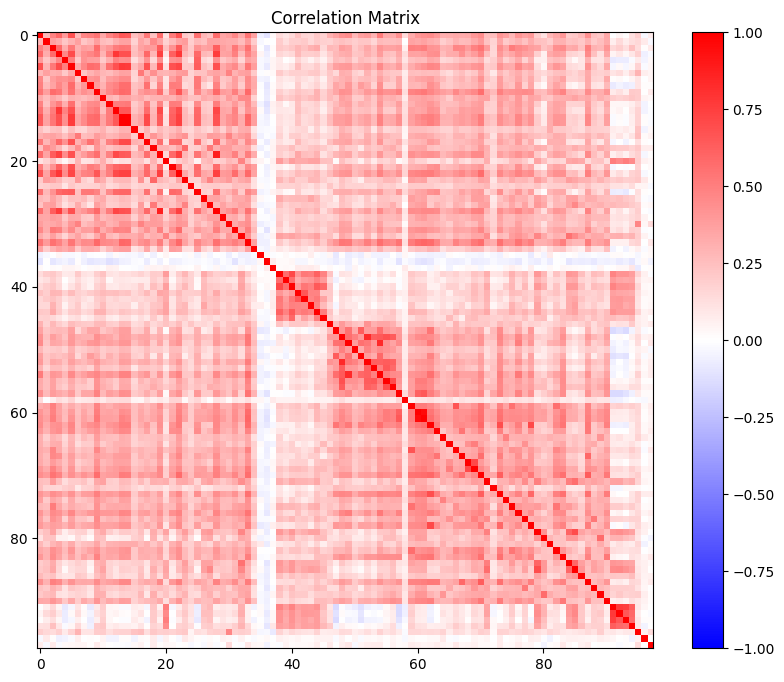

Reconstructed correlation matrix with 1 eigenvalues


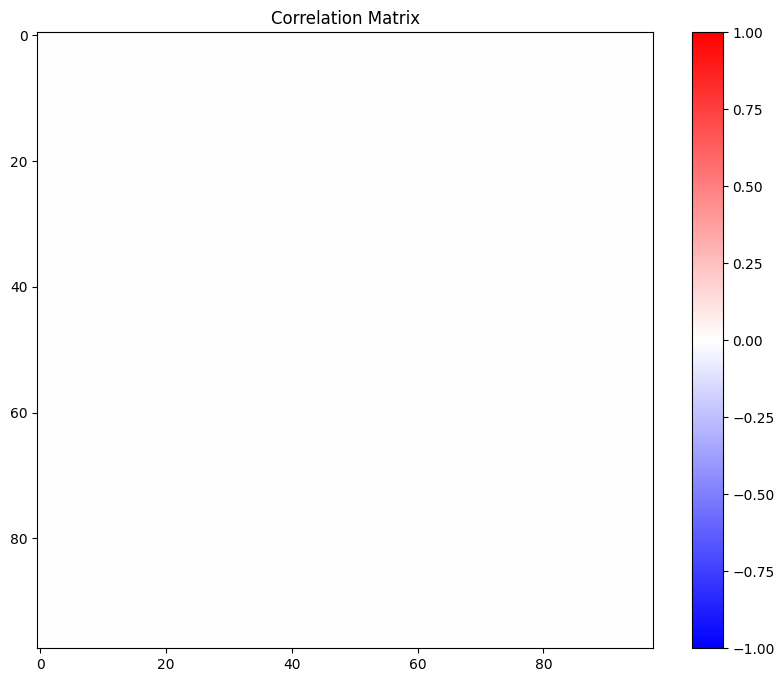

Reconstructed correlation matrix with 2 eigenvalues


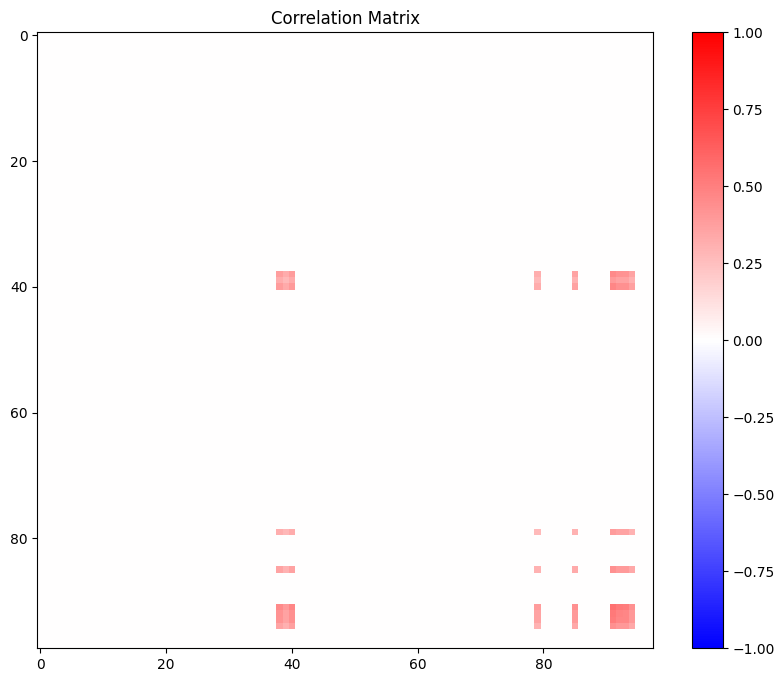

Reconstructed correlation matrix with 3 eigenvalues


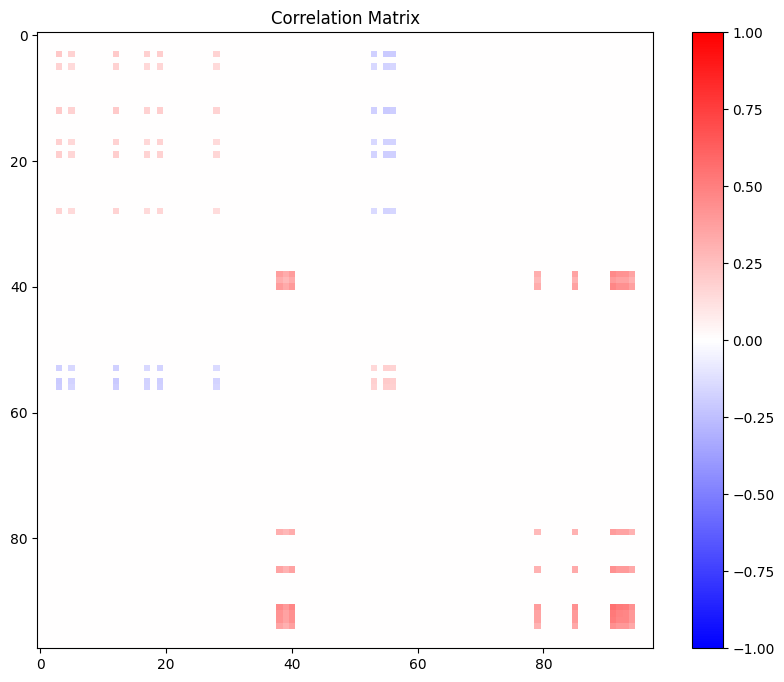

Reconstructed correlation matrix with 4 eigenvalues


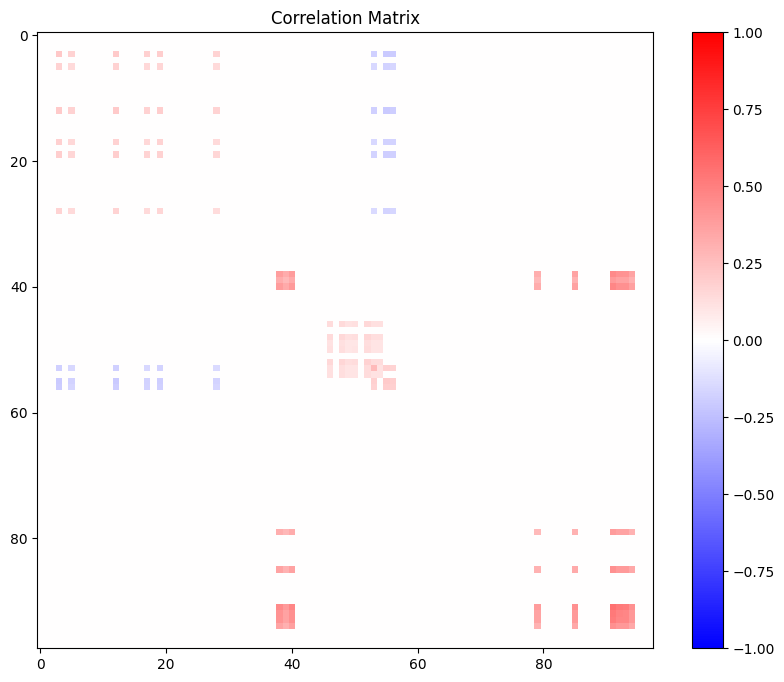

Reconstructed correlation matrix with 5 eigenvalues


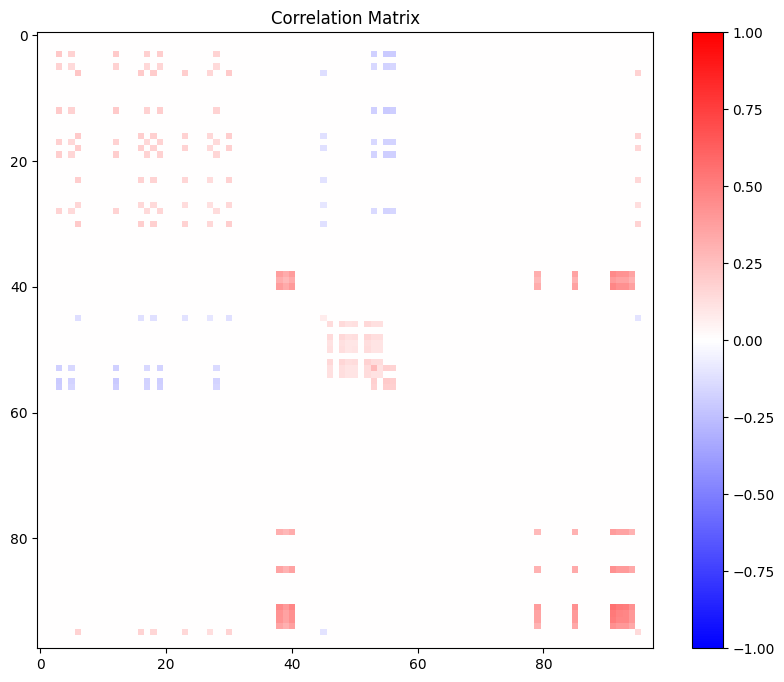

In [1]:
from stock_analysis import StockAnalysis
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# datasets
dataset_prevoid = 'Datasets/Data_PreCovid_20170101_20200109.csv'
dataset_postvoid = 'Datasets/Data_PostCovid_20200110_20221231.csv'
metadata_file = 'Datasets/Stock_metadata.csv'
analysis = StockAnalysis(returns_file_path=dataset_prevoid, metadata_file_path=metadata_file)
analysis.returns_data

#analysis.compare_covariance_estimators()
analysis.complete_analysis(cov_method='Sample Covariance Matrix')

Plotting the correlation matrix


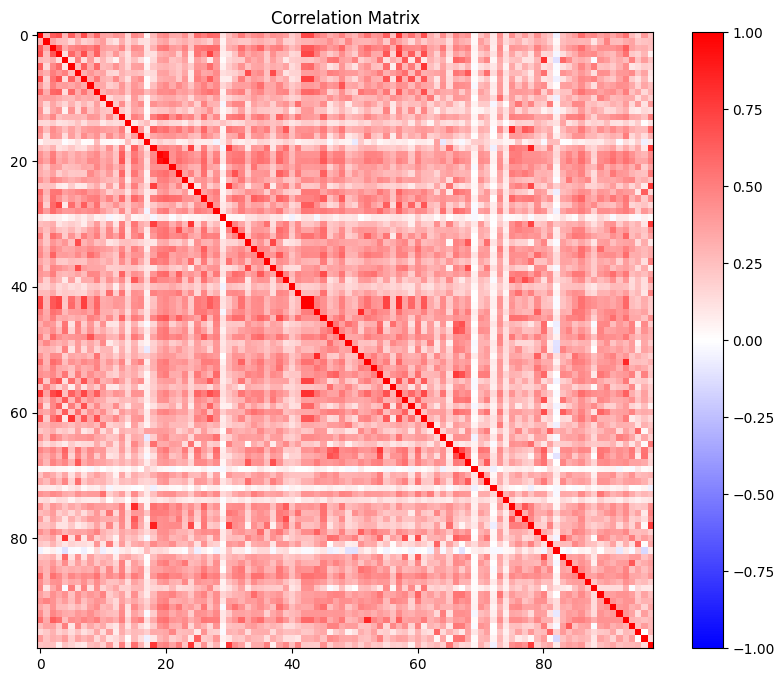

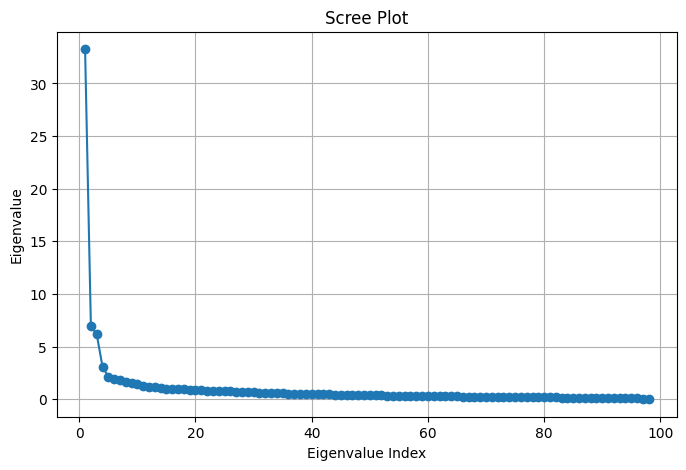

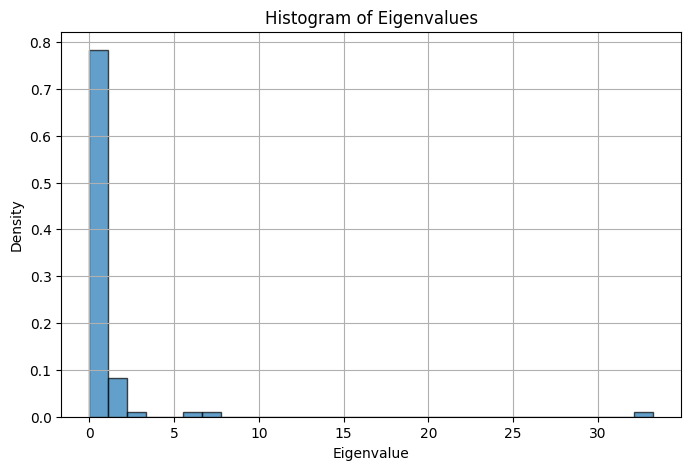

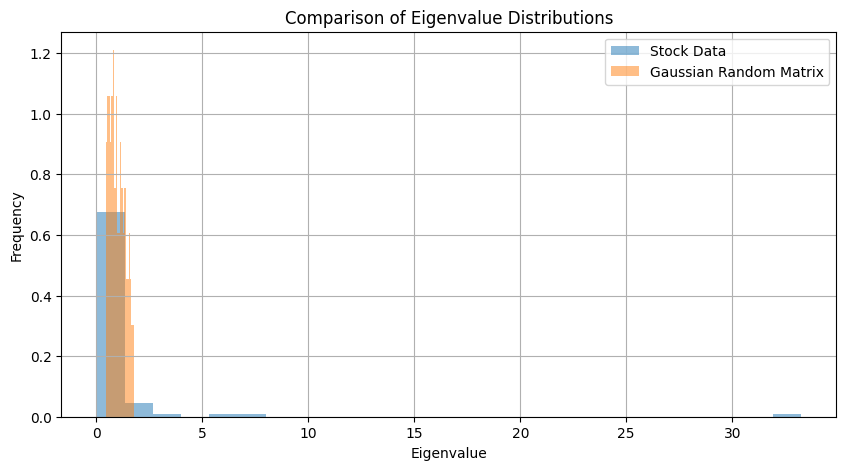

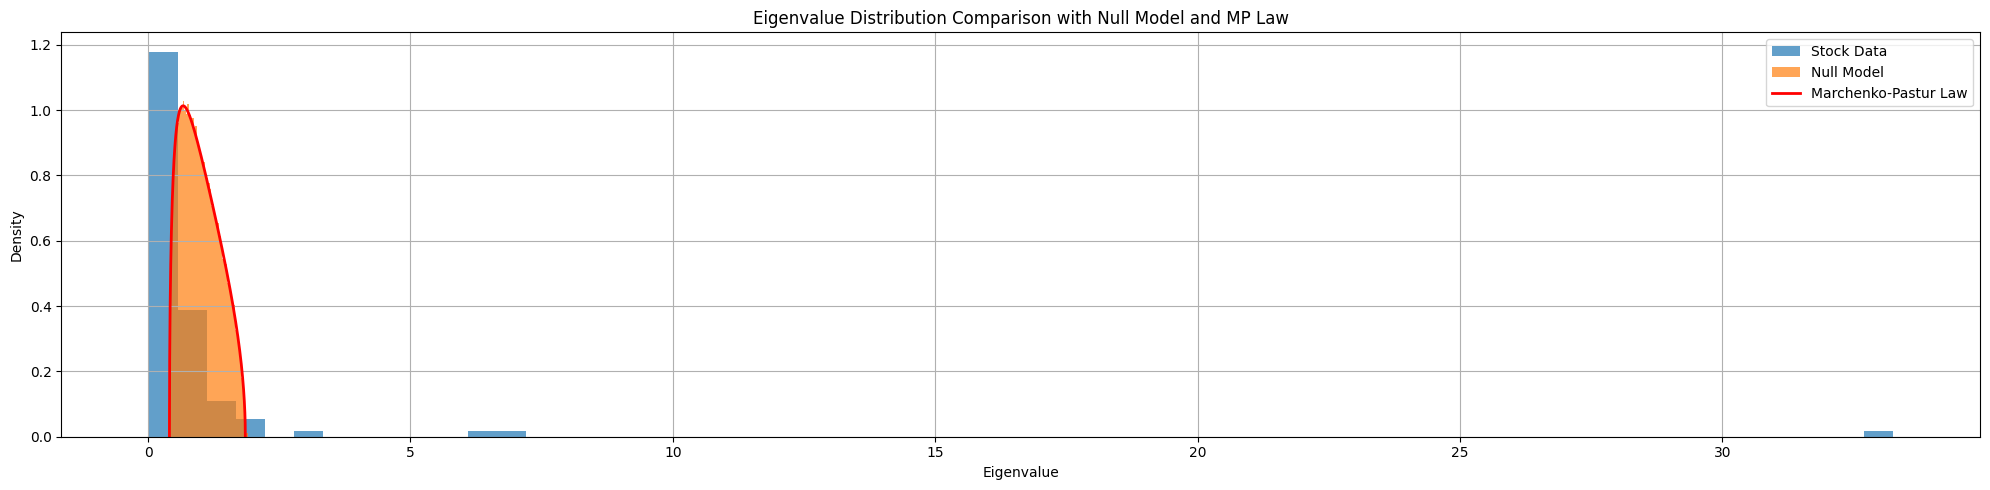

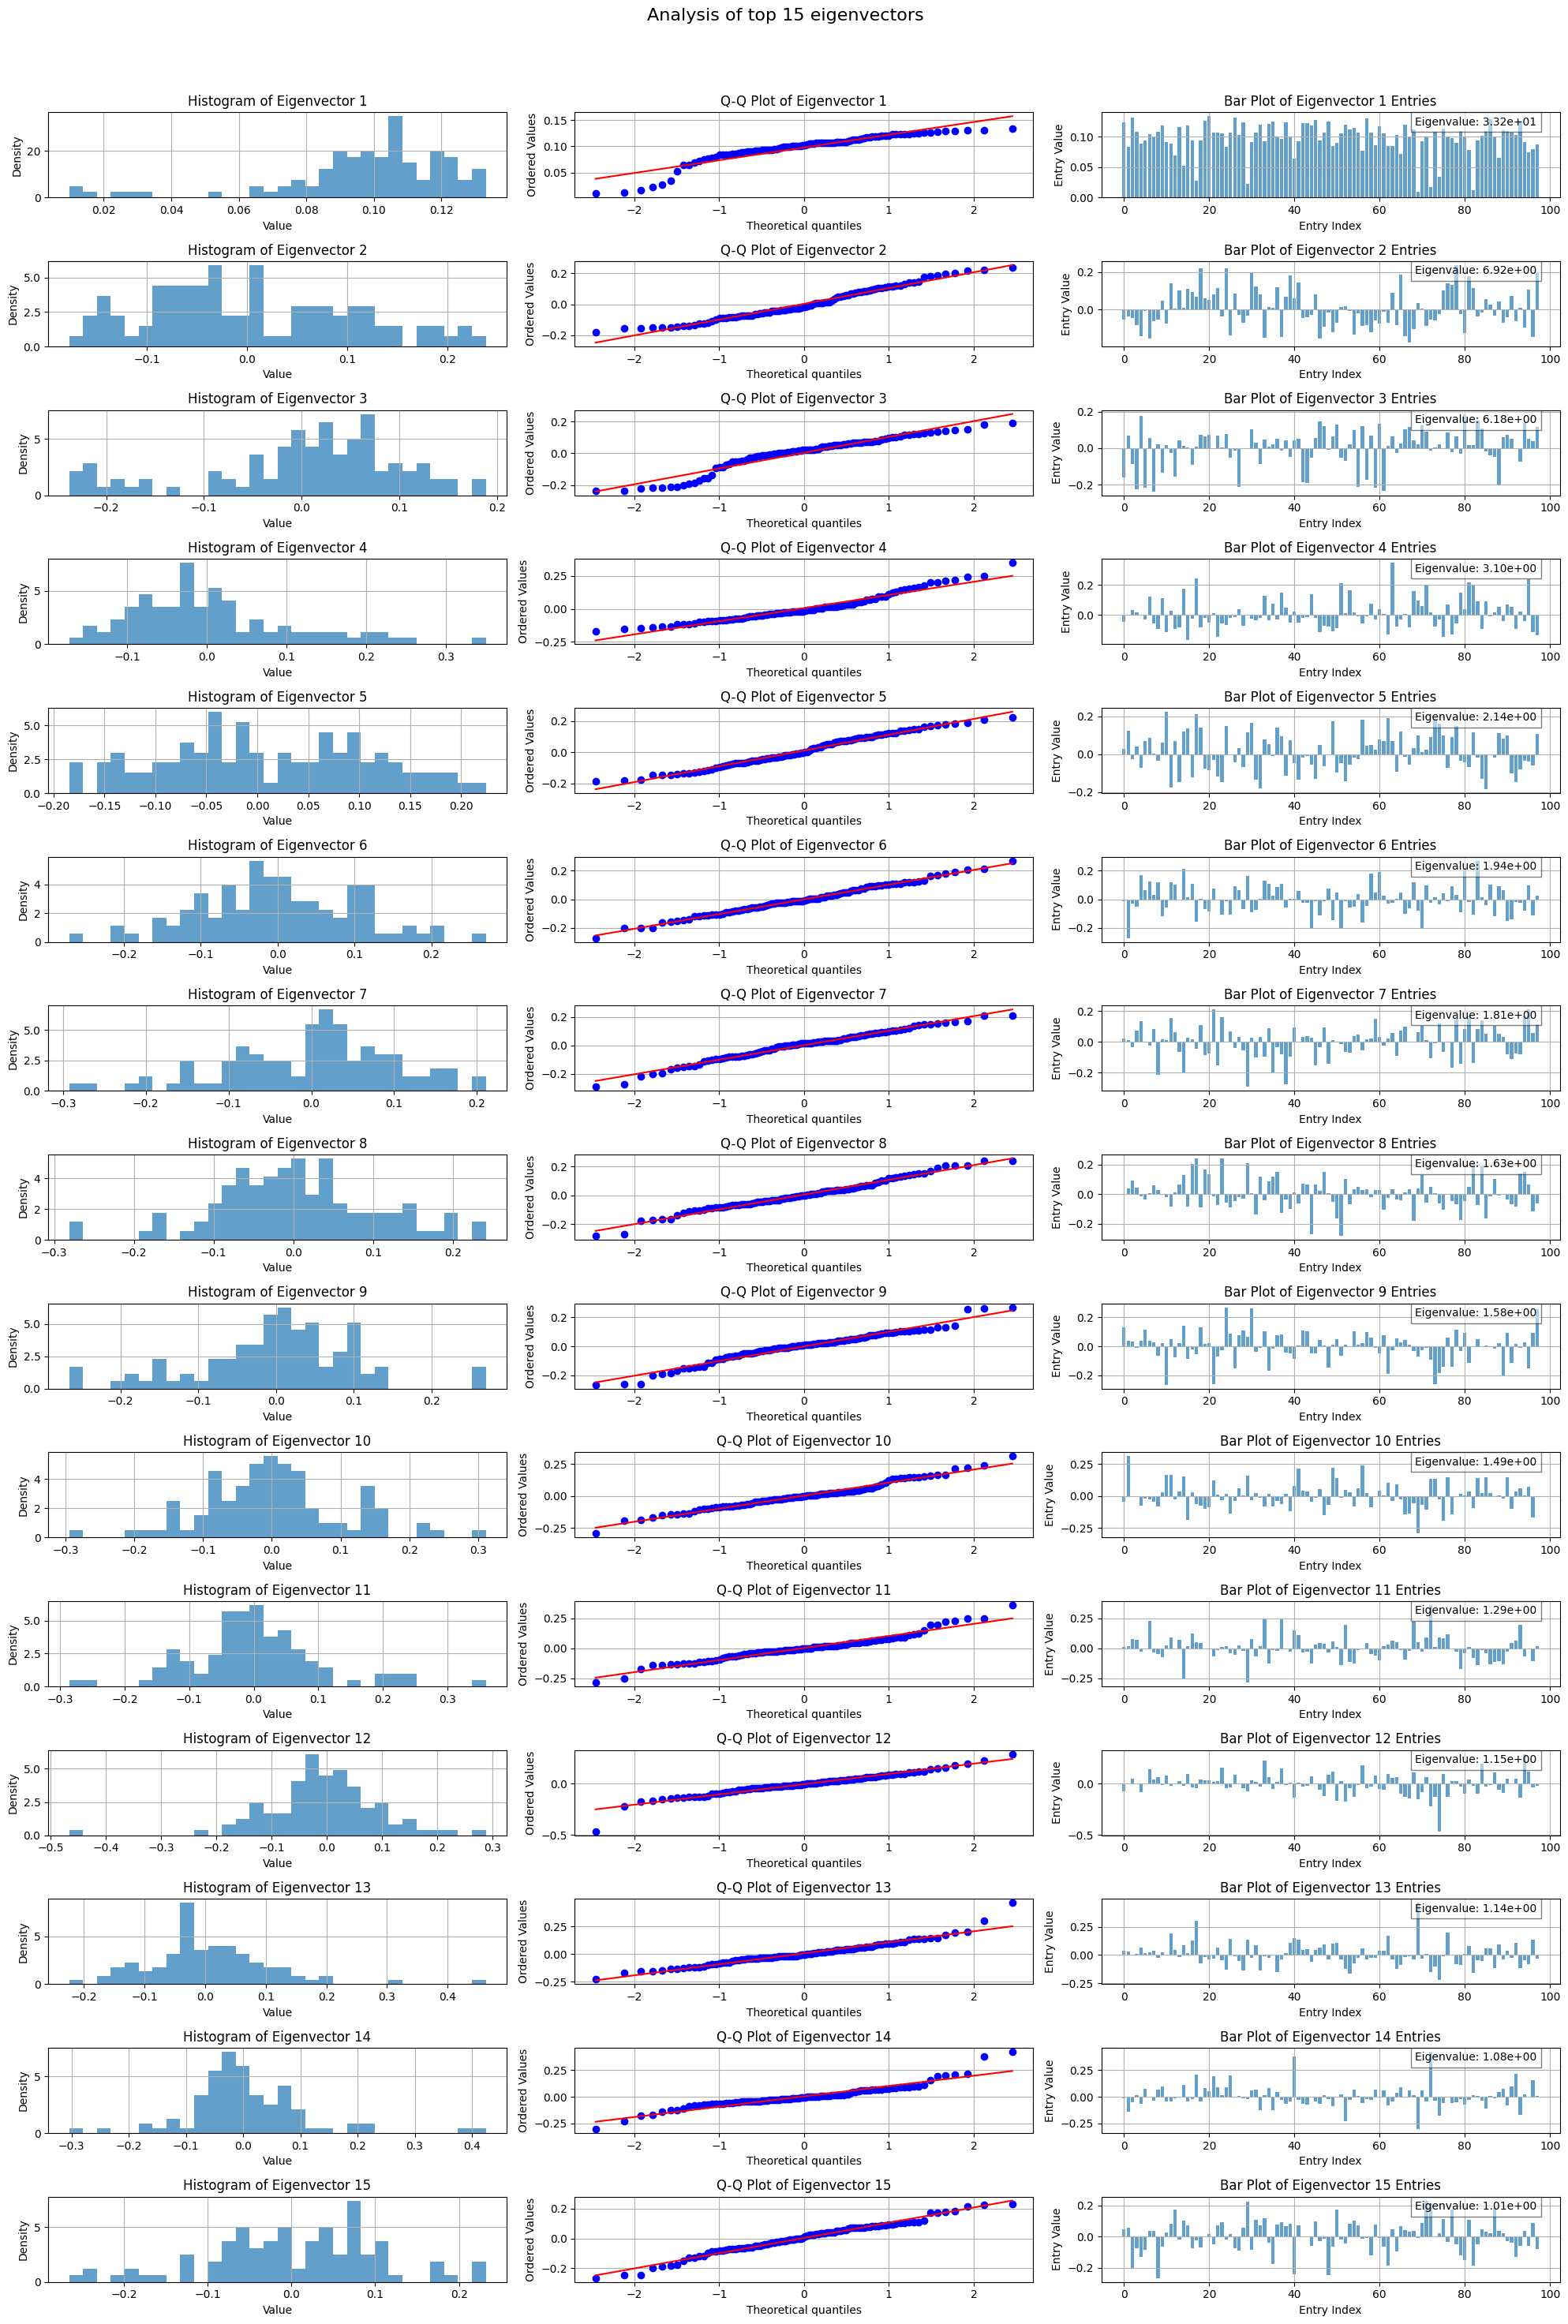

Number of significant eigenvalues: 6
Generating bi-plots for the top 6 eigenvectors


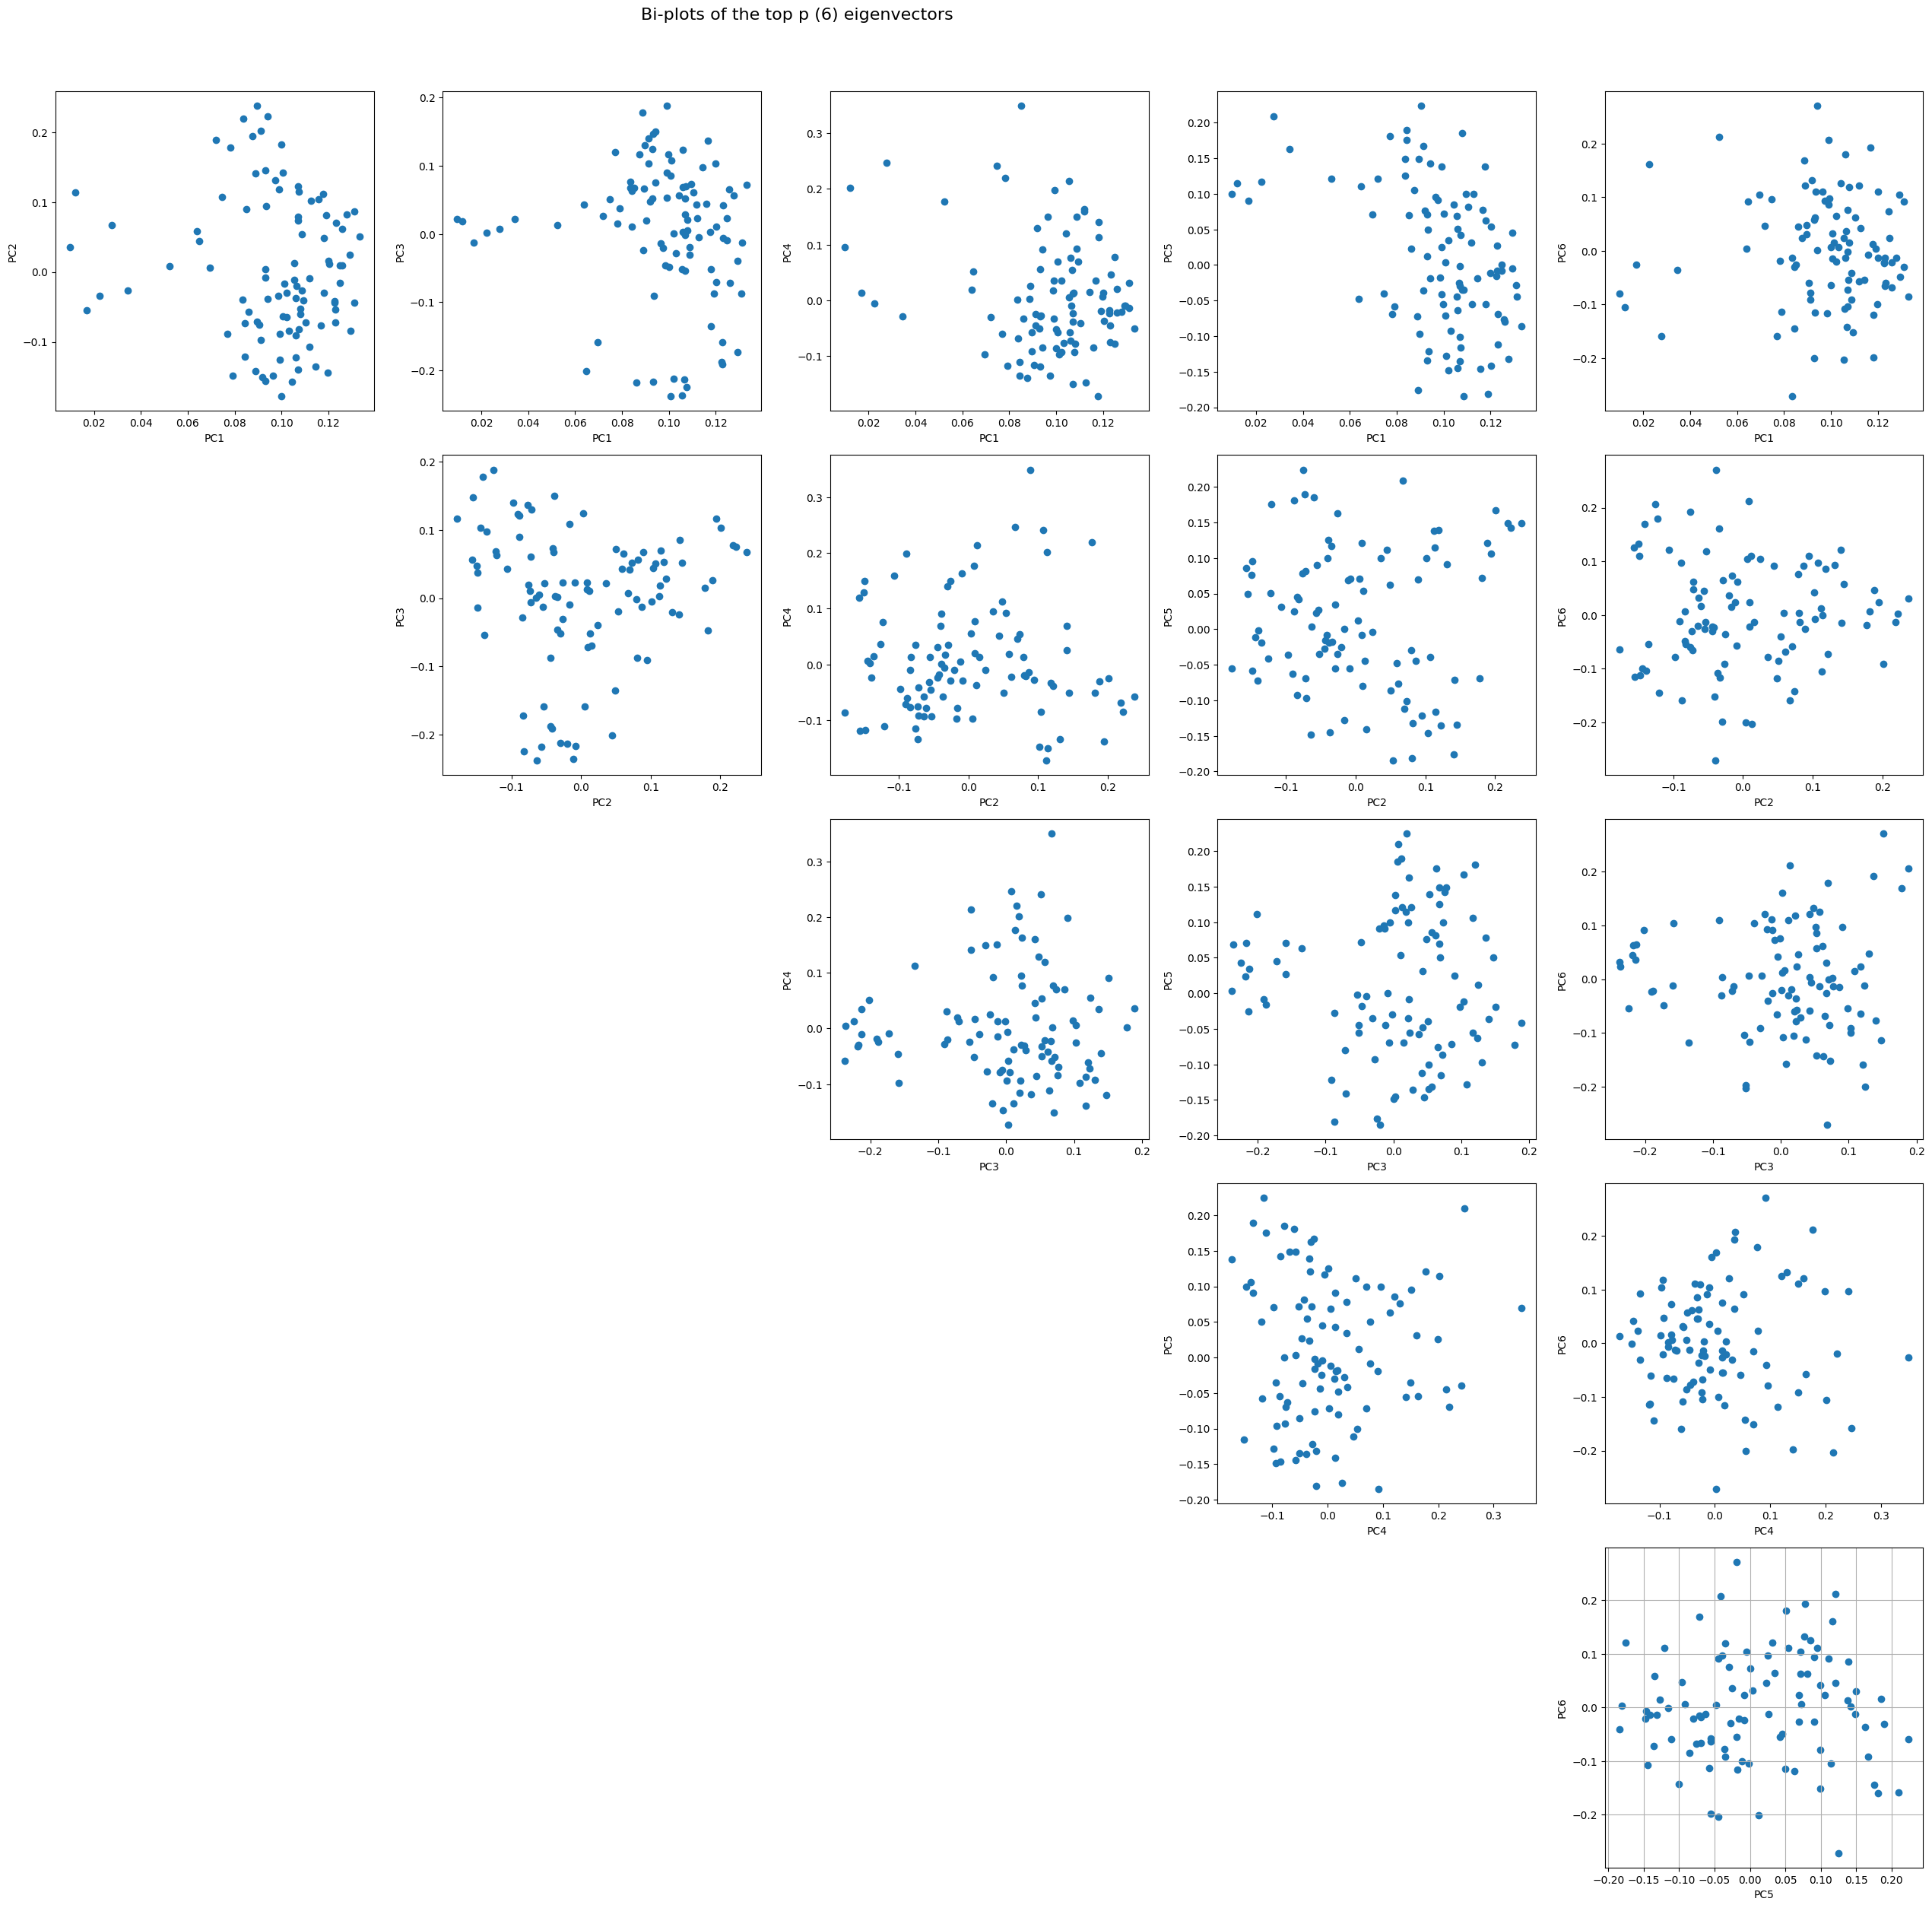

filtering eigenvectors based on confidence level
Threshold for filtering eigenvectors: 0.1818227245939953
Plotting the histogram of the filtered eigenvectors


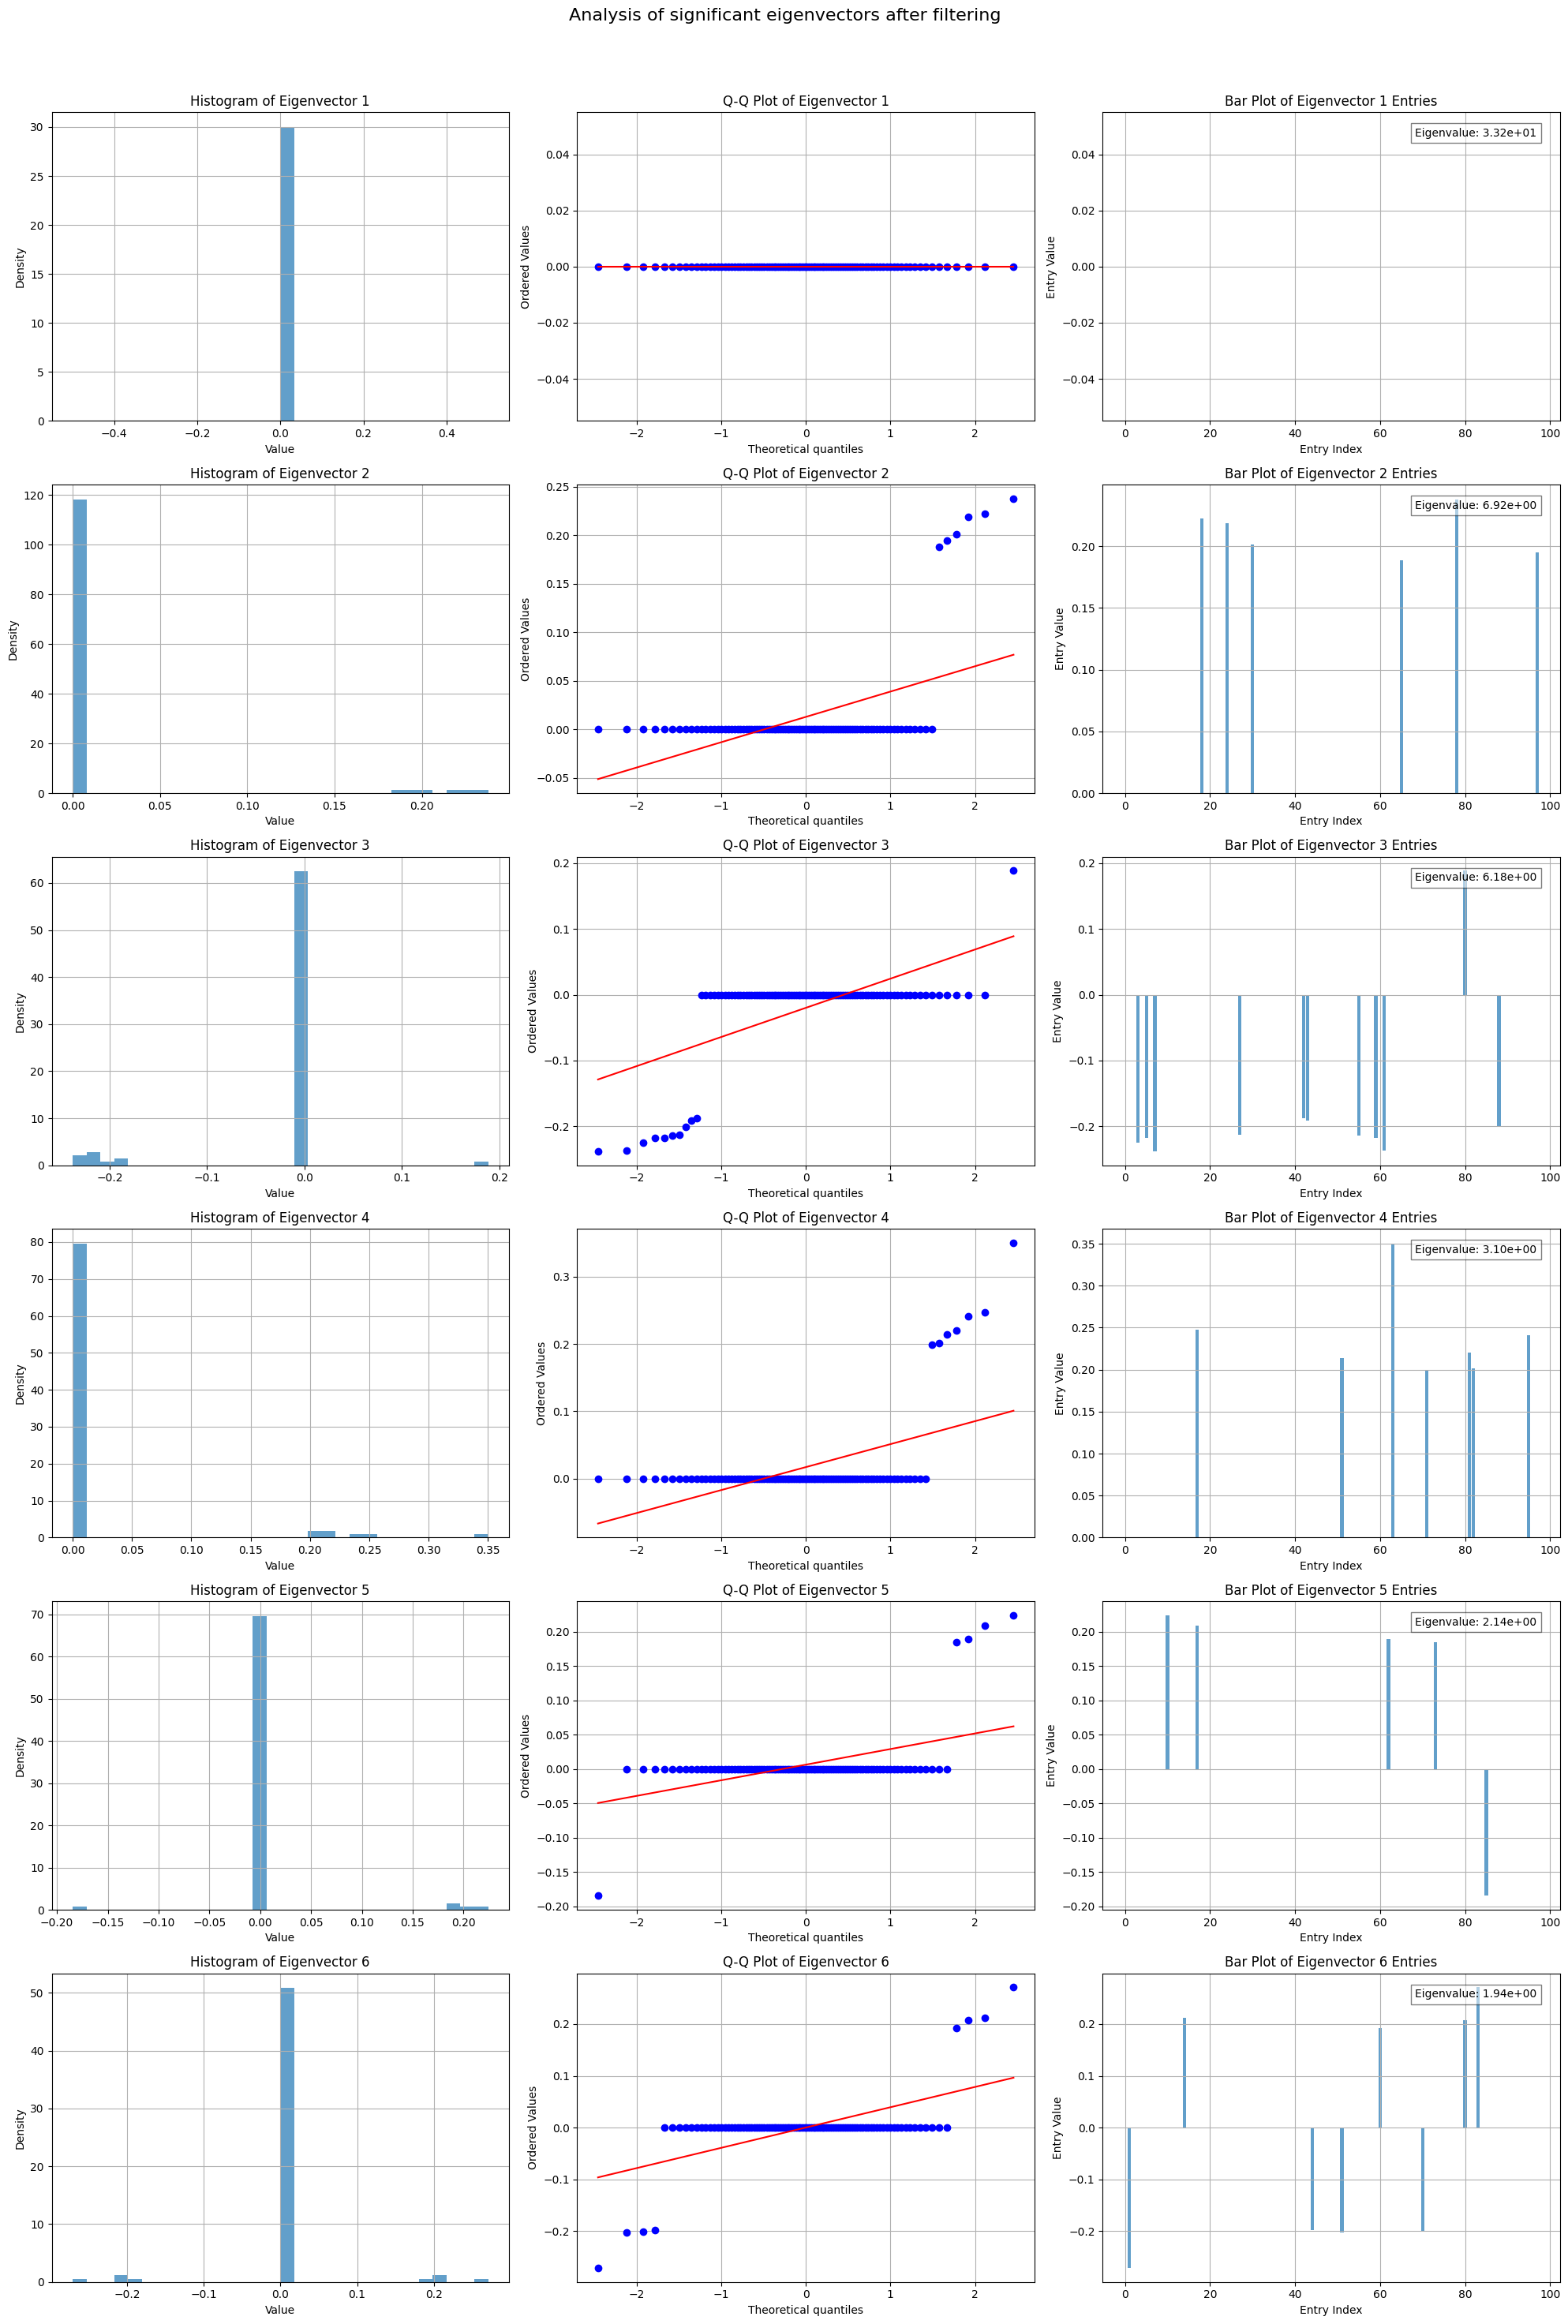

Generating bi-plots for the filtered eigenvectors


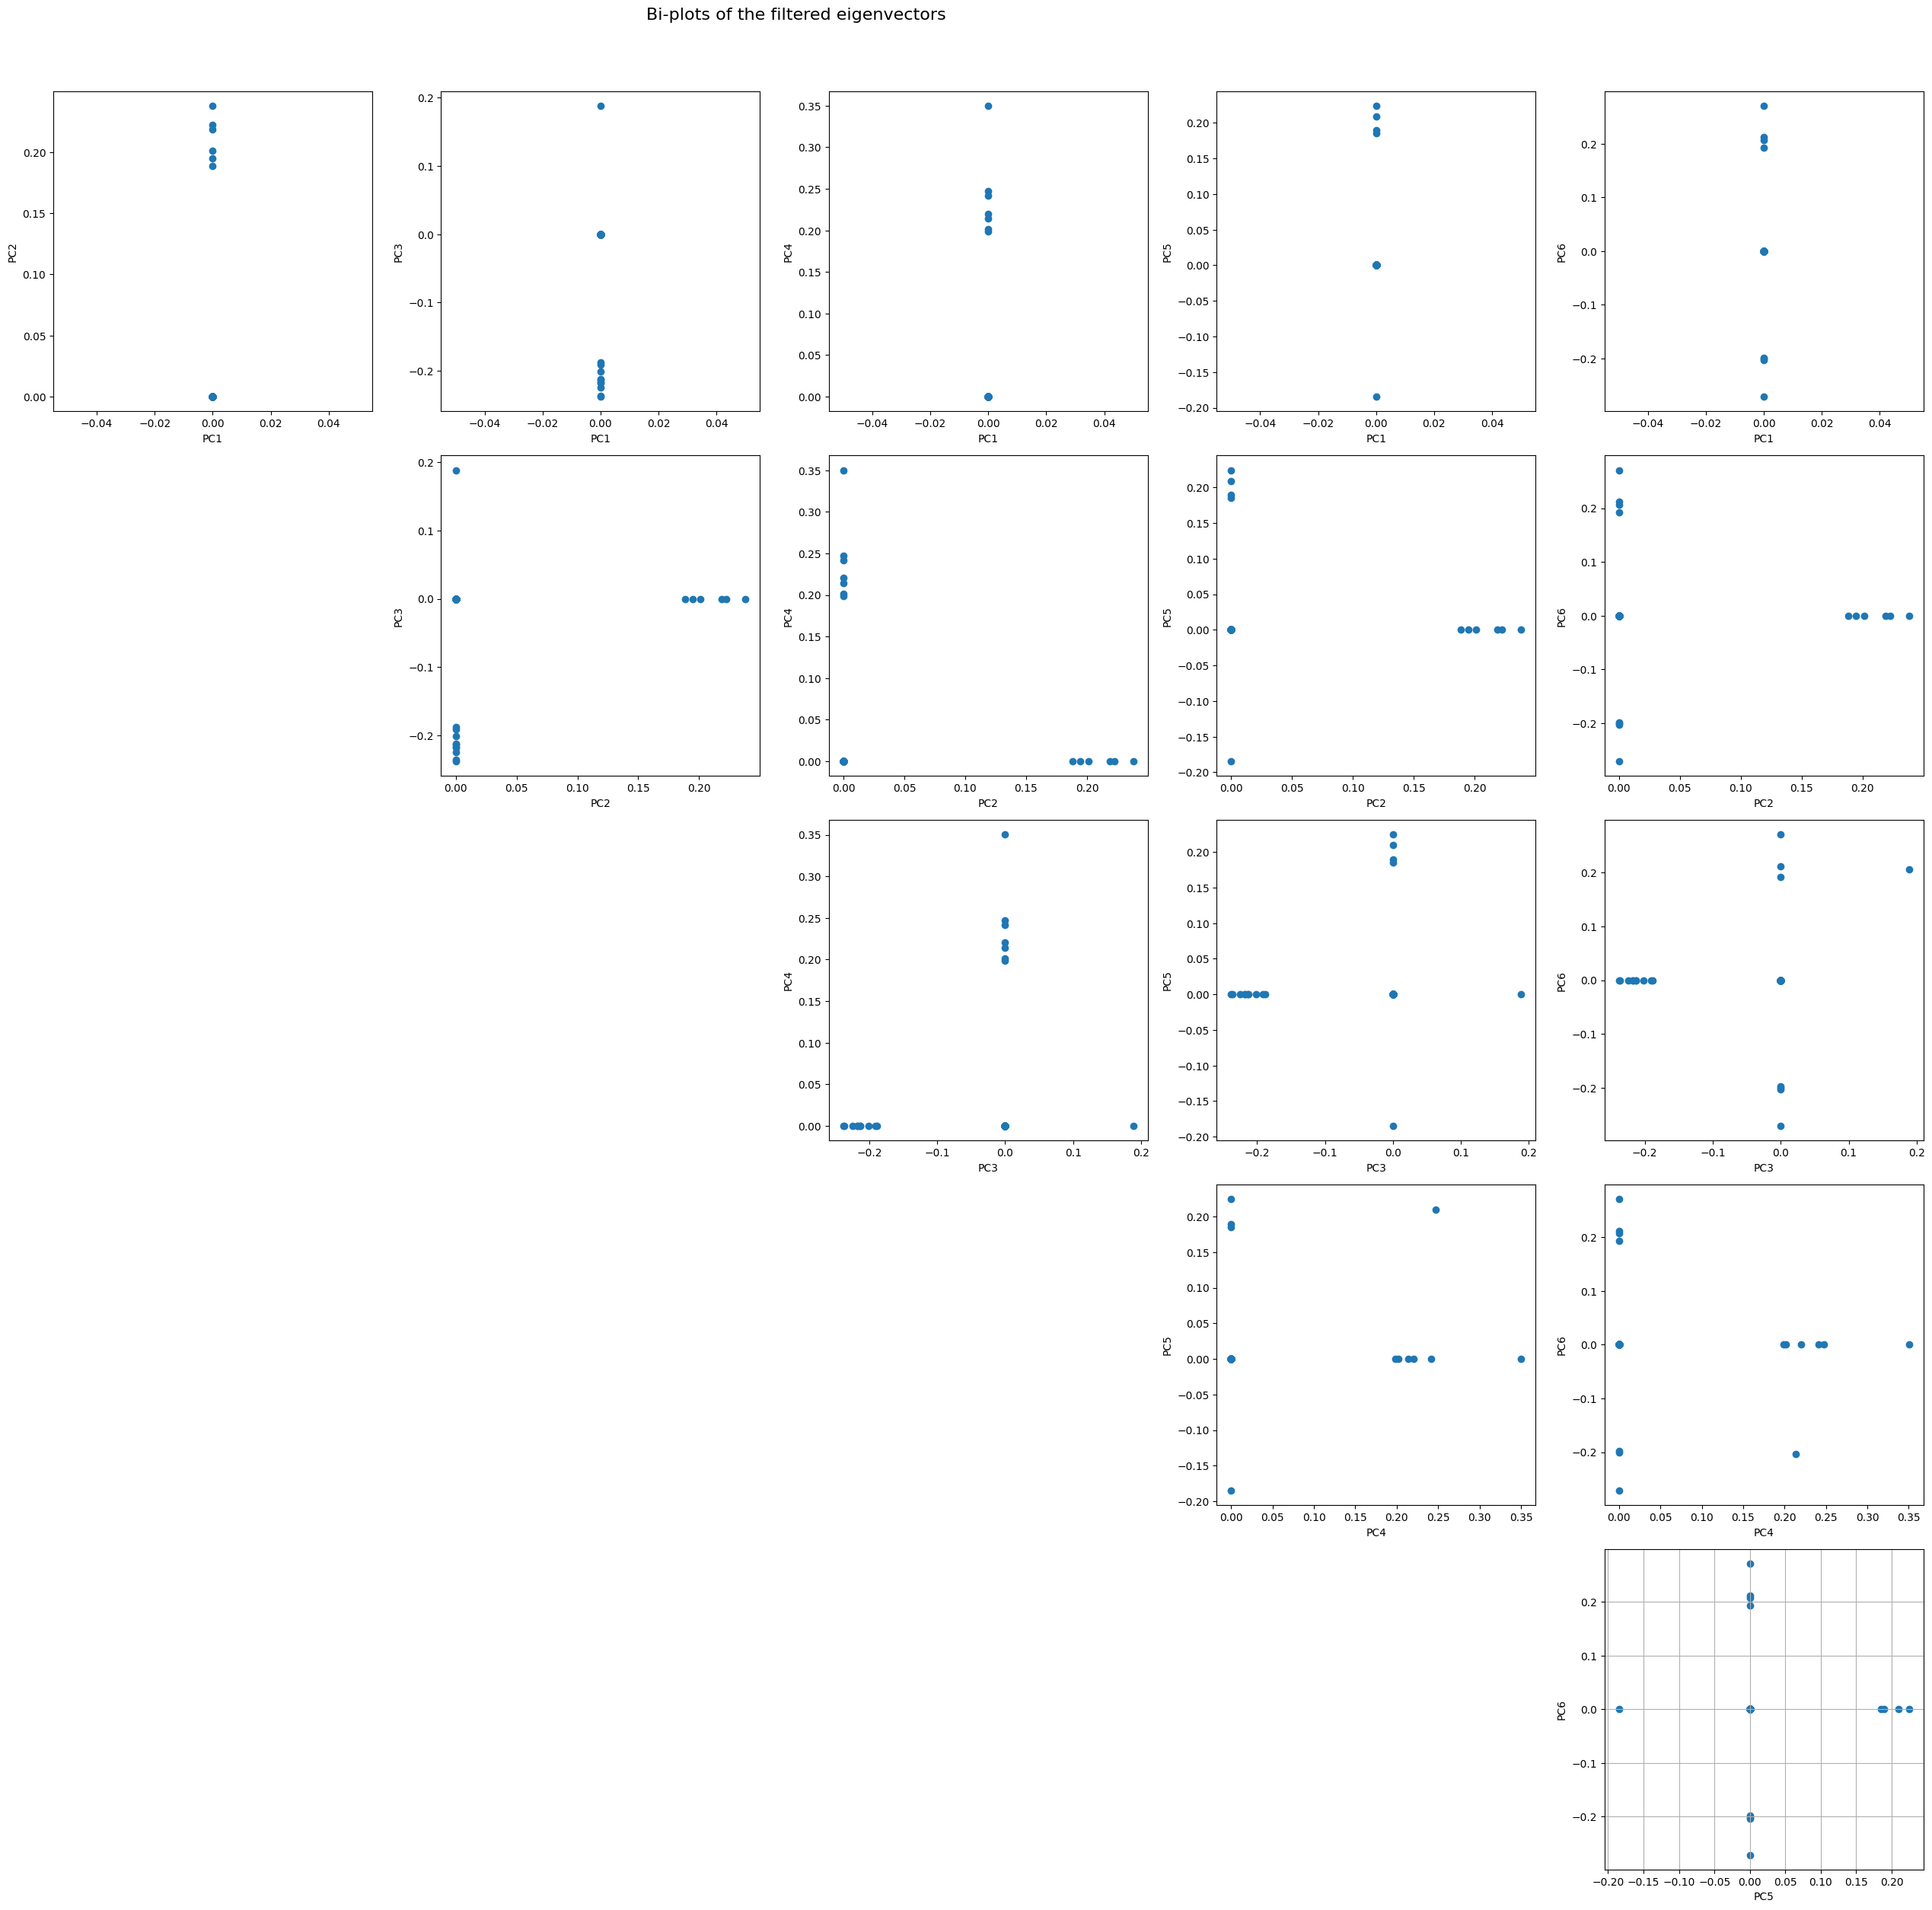

Identifying groups based on the top p 6 eigenvectors

Cluster 0:
   Symbol                           Company Name                  Sector
4     AEP  American Electric Power Company, Inc.               Utilities
23  CMCSA                    Comcast Corporation  Communication Services
25   COST           Costco Wholesale Corporation      Consumer Defensive
46    JNJ                      Johnson & Johnson              Healthcare
47     KO                  The Coca-Cola Company      Consumer Defensive
50    LMT            Lockheed Martin Corporation             Industrials
54   MDLZ           Mondelez International, Inc.      Consumer Defensive
66    PEP                          PepsiCo, Inc.      Consumer Defensive
67     PG           The Procter & Gamble Company      Consumer Defensive
70     PM       Philip Morris International Inc.      Consumer Defensive
84      T                              AT&T Inc.  Communication Services
94     VZ            Verizon Communications Inc.  Communica

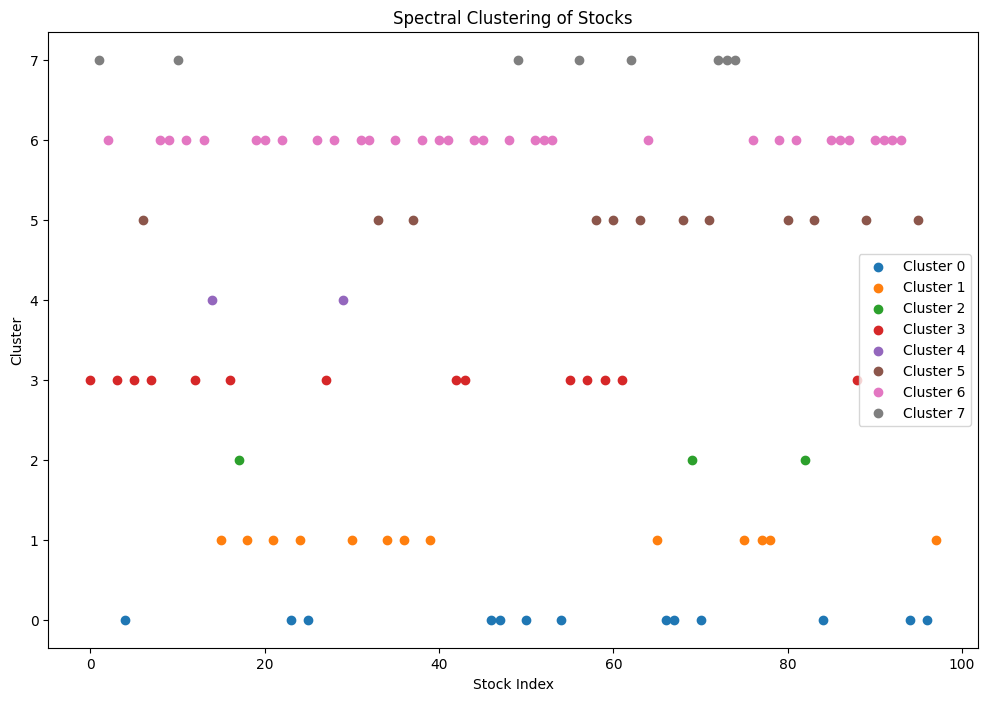

Plotting the reordered correlation matrix


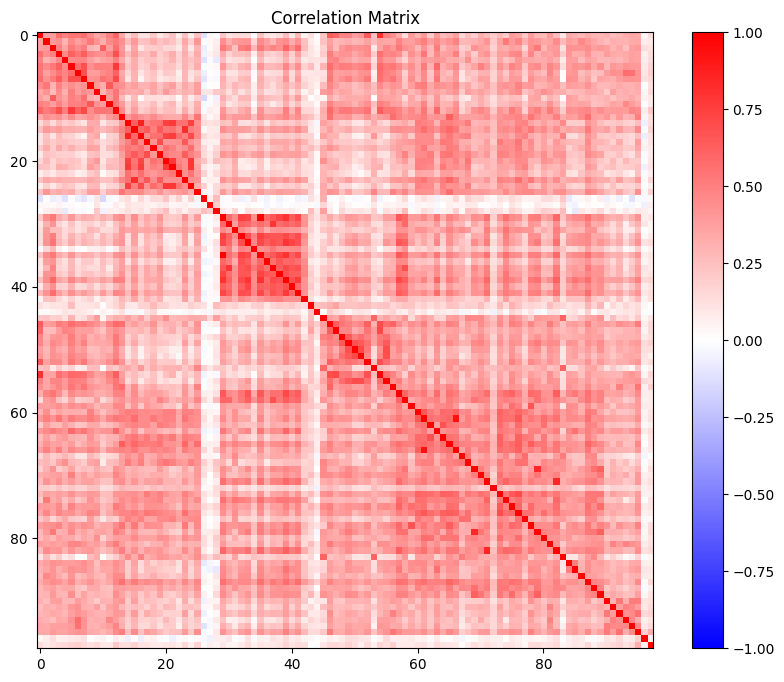

Reconstructed correlation matrix with 1 eigenvalues


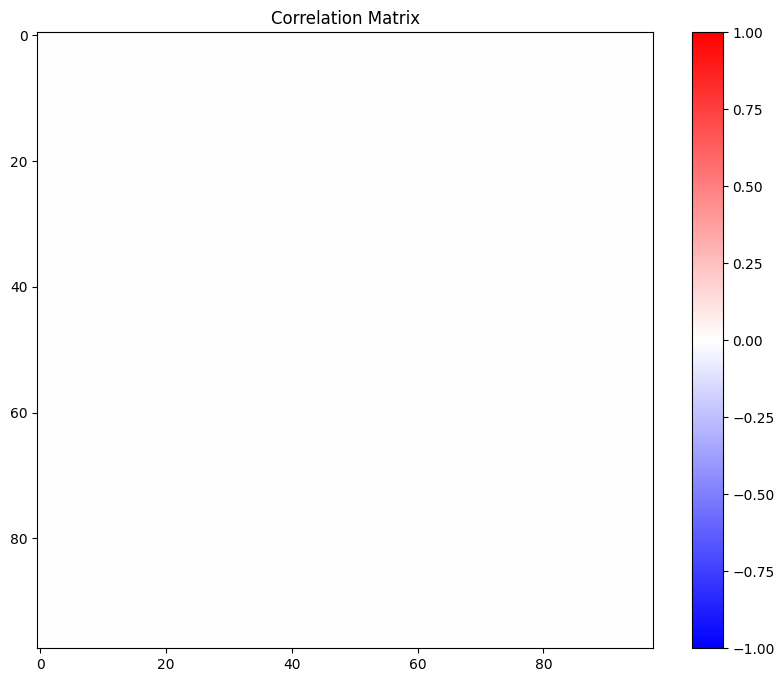

Reconstructed correlation matrix with 2 eigenvalues


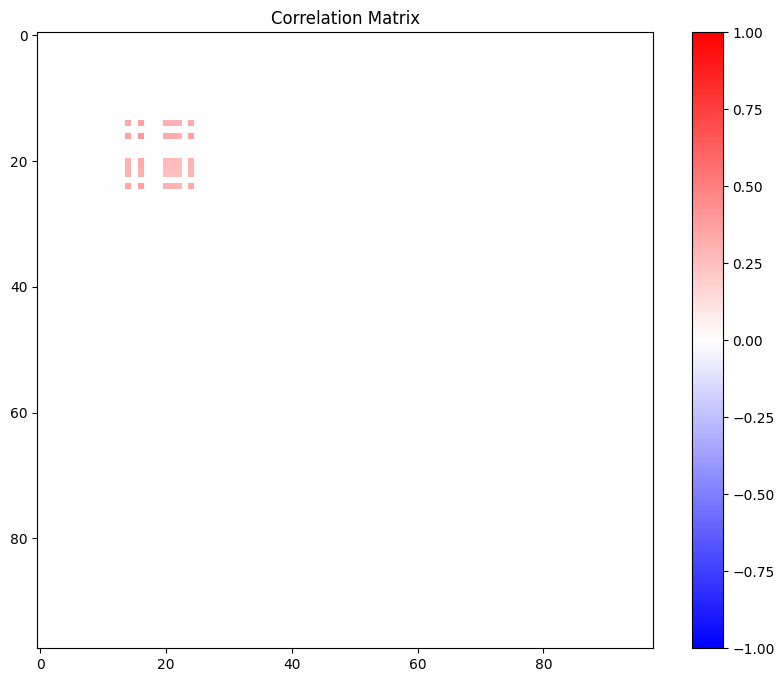

Reconstructed correlation matrix with 3 eigenvalues


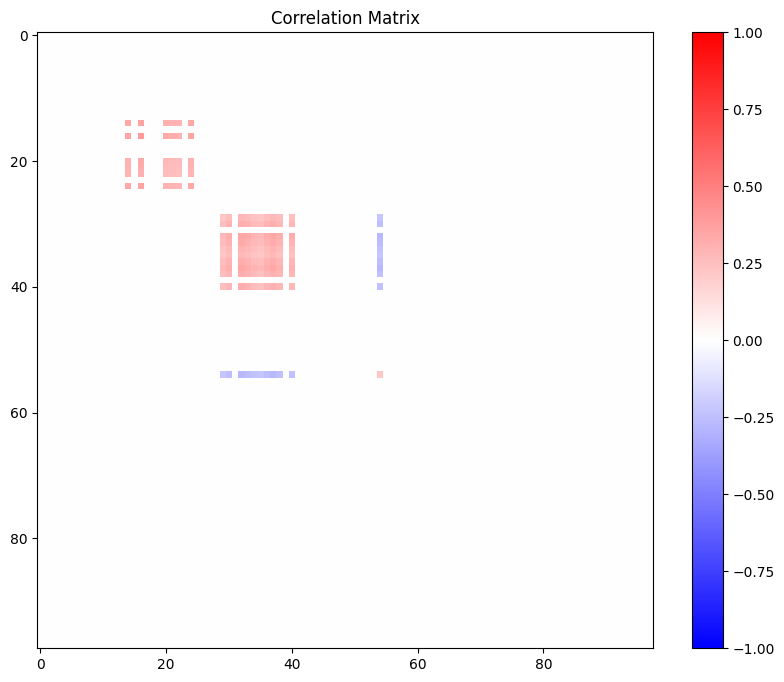

Reconstructed correlation matrix with 4 eigenvalues


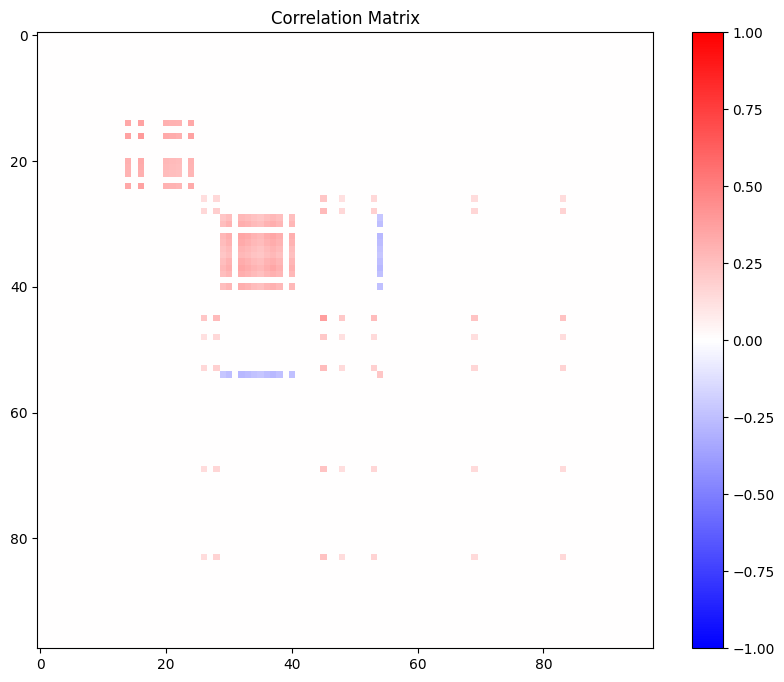

Reconstructed correlation matrix with 5 eigenvalues


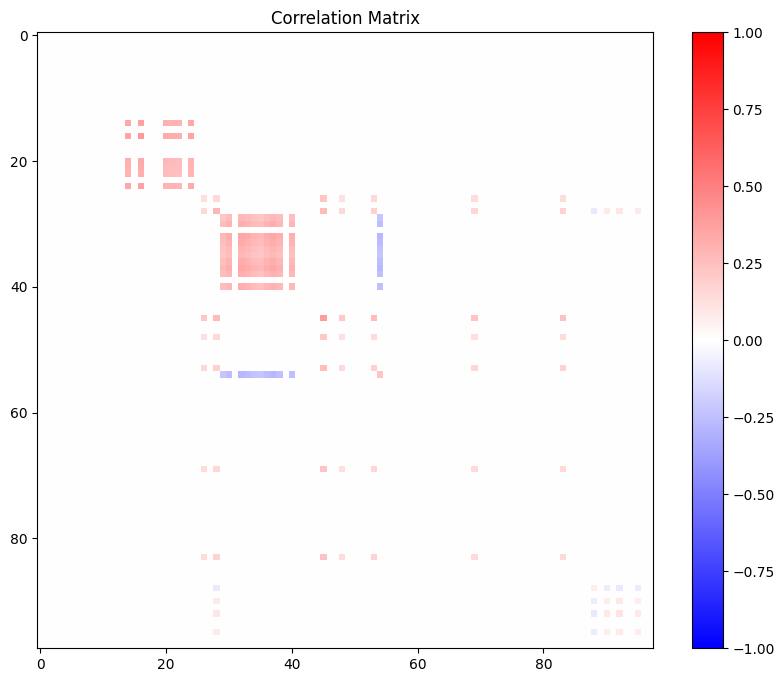

Reconstructed correlation matrix with 6 eigenvalues


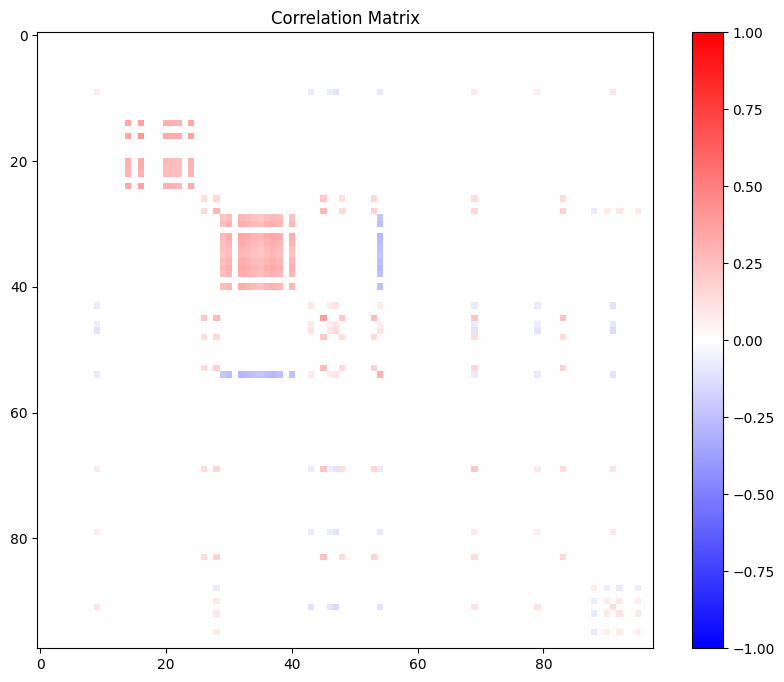

In [2]:
# post covid
dataset_postcovid = 'Datasets/Data_PostCovid_20200110_20221231.csv'
analysis_post = StockAnalysis(returns_file_path=dataset_postcovid, metadata_file_path=metadata_file)

#analysis.compare_covariance_estimators()


analysis_post.complete_analysis(cov_method='Sample Covariance Matrix')

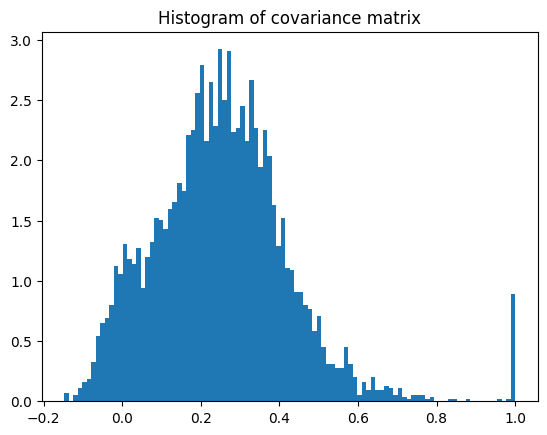

0.25206295962822794


In [3]:
# histograms of covariance matrix
corr_matrix = analysis.corr_method(analysis.returns_data)
plt.figure()
plt.hist(corr_matrix.flatten(), bins=100, density=True)
plt.title('Histogram of covariance matrix')
plt.show()


print(np.mean(corr_matrix))

[np.float64(1.847775062827126), np.float64(0.41045945627695857)]


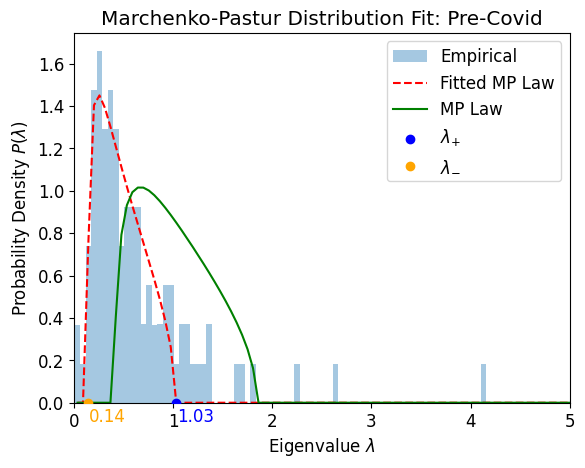

1.0293214578097123 0.13849049299024035
[np.float64(1.853623557958718), np.float64(0.4077097753746155)]


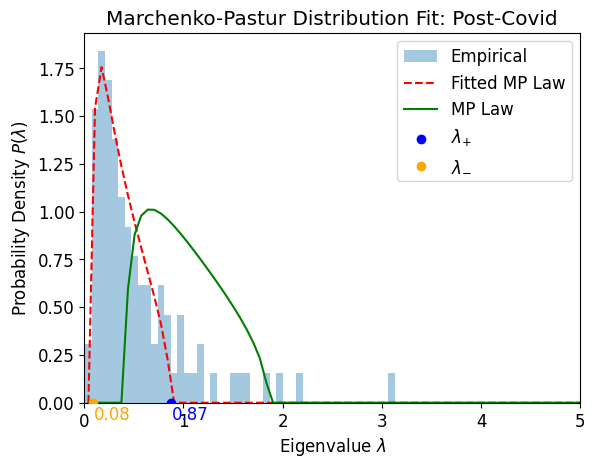

0.8721905804544285 0.08369610293166395


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_mp_distribution(eigenvalues, gamma, bins=500, title='Marchenko-Pastur Distribution Fit: Pre-Covid'):
    """
    Fit the Marchenko-Pastur distribution to a list of eigenvalues and plot the results.
    
    Parameters:
    eigenvalues (array-like): A list or numpy array of eigenvalues.
    gamma (float): The ratio of the number of rows to columns in the returns matrix.
    
    Returns:
    lambda_plus (float): The fitted upper bound of the Marchenko-Pastur distribution.
    lambda_minus (float): The fitted lower bound of the Marchenko-Pastur distribution.
    """
    # Define the Marchenko-Pastur distribution function with safeguard for negative square roots
    def mp_distribution(lmbda, lambda_plus, lambda_minus):
        # Ensure the values inside the sqrt are positive to avoid NaNs
        valid_range = (lambda_plus - lmbda) * (lmbda - lambda_minus)
        return np.sqrt(np.maximum(valid_range, 0)) / (2 * np.pi * gamma * lmbda)

    # Empirical histogram of eigenvalues
    hist, bin_edges = np.histogram(eigenvalues, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Initial guess for lambda_plus and lambda_minus
    # print(np.log10((1 + np.sqrt(gamma))**2 ), np.log10((1 - np.sqrt(gamma))**2))
    lambda_plus_initial = (1 + np.sqrt(gamma))**2
    lambda_minus_initial = (1 - np.sqrt(gamma))**2
    initial_guess = [lambda_plus_initial, lambda_minus_initial]
    print(initial_guess)

    # Set bounds for lambda_plus and lambda_minus
    lower_bounds = [1e-4, -1e-6]  # Ensure they are positive
    upper_bounds = [10 * lambda_plus_initial, 10 * lambda_minus_initial]  # Wide enough to capture variability

    # Perform curve fitting with bounds
    try:
        popt, pcov = curve_fit(mp_distribution, bin_centers, hist, p0=initial_guess, bounds=(lower_bounds, upper_bounds))
        # Extract fitted parameters
        lambda_plus_fitted, lambda_minus_fitted = popt
    except RuntimeError:
        print("Curve fitting failed. Adjust initial guesses or data quality.")
        return None, None

    # Plot the fitted MP distribution
    plt.figure()
    plt.hist(eigenvalues, bins=bins, density=True, alpha=0.4, label='Empirical')
    plt.plot(bin_centers, mp_distribution(bin_centers, lambda_plus_fitted, lambda_minus_fitted), label='Fitted MP Law', color='red', linestyle='--')
    plt.plot(bin_centers, mp_distribution(bin_centers, lambda_plus_initial, lambda_minus_initial), label='MP Law', color='green')
    plt.xlim([0, 5])

    # Add scatter points for lambda_plus and lambda_minus
    plt.scatter([lambda_plus_fitted], [0], color='blue', zorder=5, label=r'$\lambda_{+}$')
    plt.scatter([lambda_minus_fitted], [0], color='orange', zorder=5, label=r'$\lambda_{-}$')

    # Add text labels for lambda_plus and lambda_minus
    plt.text(lambda_plus_fitted + 0.2, -0.09, r'{:.2f}'.format(lambda_plus_fitted), color='blue', ha='center')
    plt.text(lambda_minus_fitted + 0.2, -0.09, r'{:.2f}'.format(lambda_minus_fitted), color='orange', ha='center')


    plt.xlabel(r'Eigenvalue $\lambda$')
    plt.ylabel(r'Probability Density $P(\lambda)$')
    plt.legend()
    plt.title(rf'{title}')
    plt.show()

    return lambda_plus_fitted, lambda_minus_fitted

# Fit the Marchenko-Pastur distribution to the eigenvalues
plt.rcParams.update({'font.size': 12})

anal = analysis
gamma = anal.returns_data.shape[0] / anal.returns_data.shape[1]
lambda_plus_pre, lambda_minus_pre = fit_mp_distribution(anal.eigenvalues, gamma, title='Marchenko-Pastur Distribution Fit: Pre-Covid')
print(lambda_plus_pre, lambda_minus_pre)

anal = analysis_post
gamma = anal.returns_data.shape[0] / anal.returns_data.shape[1]
lambda_plus_post, lambda_minus_post = fit_mp_distribution(anal.eigenvalues, gamma, title='Marchenko-Pastur Distribution Fit: Post-Covid')
print(lambda_plus_post, lambda_minus_post)


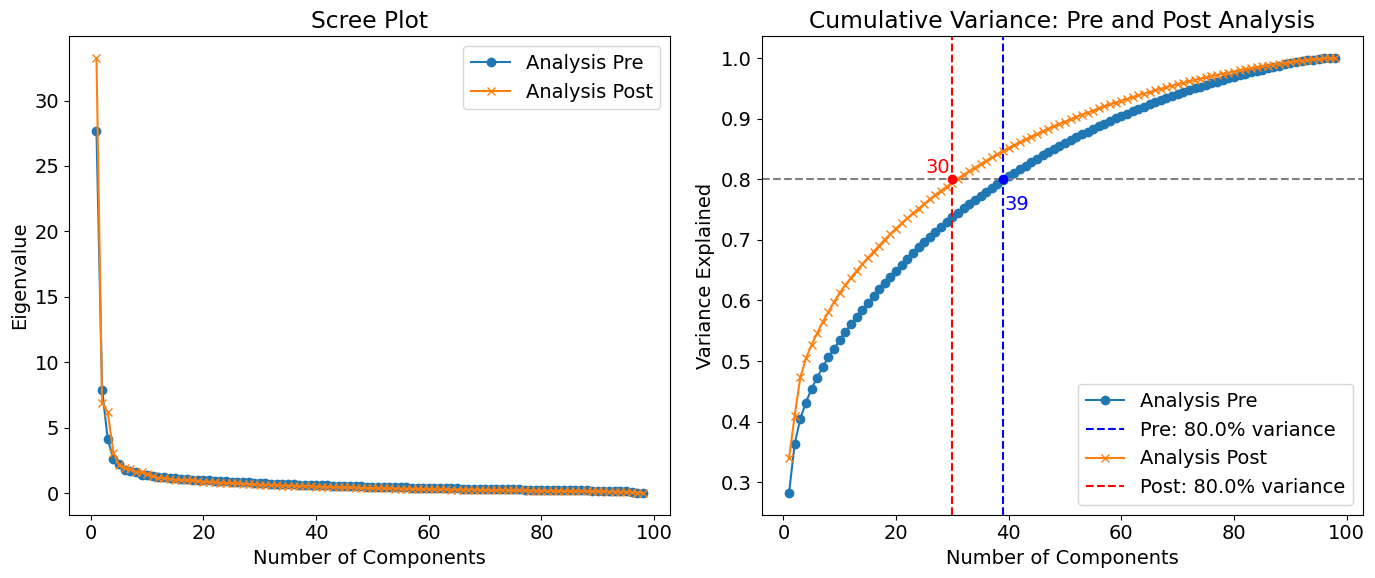

In [5]:
# find number of eigenvalues to retain 80% of variance
def find_num_components(eigenvalues, variance_retained):
    """
    Find the number of principal components required to retain a certain percentage of variance.
    
    Parameters:
    eigenvalues (array-like): A list or numpy array of eigenvalues.
    variance_retained (float): The percentage of variance to retain.
    
    Returns:
    num_components (int): The number of principal components to retain the specified variance.
    """
    # Sort the eigenvalues in descending order
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    
    # Calculate the total variance
    total_variance = np.sum(sorted_eigenvalues)
    
    # Calculate the variance retained for each number of components
    variance_retained_by_num_components = np.cumsum(sorted_eigenvalues) / total_variance
    
    # Find the first index where the variance exceeds the threshold
    num_components = np.argmax(variance_retained_by_num_components > variance_retained)
    
    return num_components

plt.rcParams.update({'font.size': 14})
# Create figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scree plot (individual eigenvalues) for both pre and post analysis
ax[0].plot(np.arange(1, len(analysis.eigenvalues) + 1), analysis.eigenvalues, marker='o', label='Analysis Pre')
ax[0].plot(np.arange(1, len(analysis_post.eigenvalues) + 1), analysis_post.eigenvalues, marker='x', label='Analysis Post')

# General settings for the scree plot
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Eigenvalue')
ax[0].set_title('Scree Plot')
ax[0].legend()

# Cumulative explained variance plot for both pre and post analysis
variance_retained = 0.8
num_components_pre = find_num_components(analysis.eigenvalues, variance_retained)
num_components_post = find_num_components(analysis_post.eigenvalues, variance_retained)

# Plot for the first analysis (pre)
ax[1].plot(np.arange(1, len(analysis.eigenvalues) + 1), 
           np.cumsum(analysis.eigenvalues) / np.sum(analysis.eigenvalues), marker='o', label='Analysis Pre')
ax[1].axvline(num_components_pre, color='blue', linestyle='--', label=f'Pre: {variance_retained * 100}% variance')
ax[1].scatter(num_components_pre, variance_retained, color='blue', zorder=5)
ax[1].text(num_components_pre + 2.4, variance_retained - 0.05, f'{num_components_pre}', color='blue', ha='center')

# Plot for the second analysis (post)
ax[1].plot(np.arange(1, len(analysis_post.eigenvalues) + 1), 
           np.cumsum(analysis_post.eigenvalues) / np.sum(analysis_post.eigenvalues), marker='x', label='Analysis Post')
ax[1].axvline(num_components_post, color='red', linestyle='--', label=f'Post: {variance_retained * 100}% variance')
ax[1].scatter(num_components_post, variance_retained, color='red', zorder=5)
ax[1].text(num_components_post - 2.5, variance_retained + 0.01, f'{num_components_post}', color='red', ha='center')

# General settings for the cumulative variance plot
ax[1].axhline(variance_retained, color='gray', linestyle='--')
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Variance Explained')
ax[1].set_title('Cumulative Variance: Pre and Post Analysis')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()



0.9402383613277652 0.7933411327021521


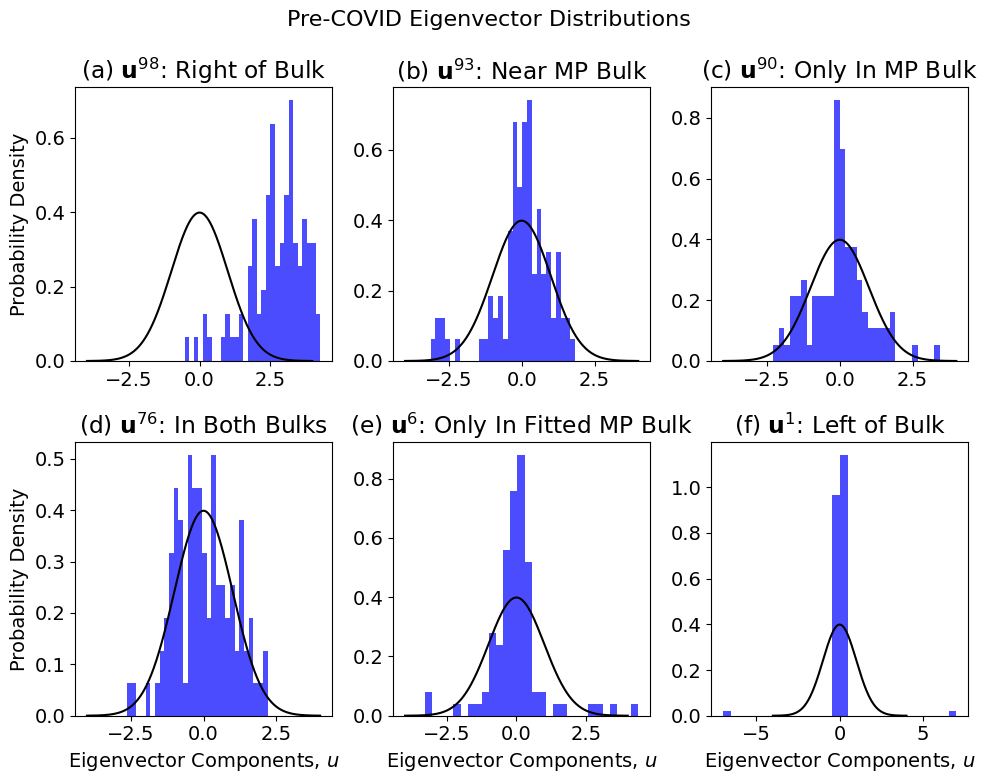

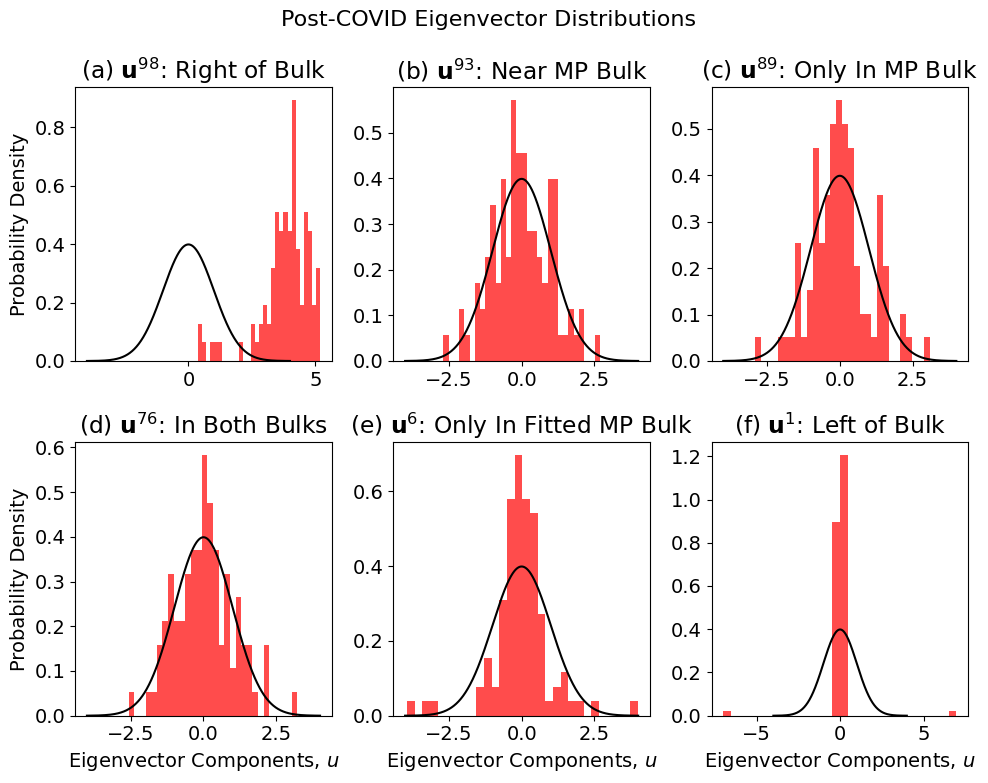

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, mode

def plot_eigenvector_distributions(analysis, analysis_post, pre_bulk_val, post_bulk_val, bins=30, eigenvalues_pre=None, eigenvalues_post=None, eigenvectors_pre=None, eigenvectors_post=None):
    """
    Plots the normalized histograms (as PDFs) of the largest two, bulk, and smallest eigenvectors 
    for both pre and post analysis in two separate 2x2 subplots.

    Parameters:
    - analysis: Pre-COVID analysis object (must have sorted eigenvalues and eigenvectors).
    - analysis_post: Post-COVID analysis object (must have sorted eigenvalues and eigenvectors).
    - pre_bulk_val: Bulk value for pre-COVID analysis.
    - post_bulk_val: Bulk value for post-COVID analysis.
    - bins: Number of bins for the histograms (default: 30).
    """
    # Number of components (eigenvectors) to plot
    largest_1_idx = 0  # largest eigenvector (since sorted, this is the first)
    largest_2_idx = 1  # second largest eigenvector (second index)
    smallest_idx = -1  # smallest eigenvector (last index)

    if eigenvalues_pre is None:
        eigenvalues_pre = analysis.eigenvalues
        eigenvectors_pre = analysis.eigenvectors
    if eigenvalues_post is None:
        eigenvalues_post = analysis_post.eigenvalues
        eigenvectors_post = analysis_post.eigenvectors

    # mp law bulk right boundary
    pre_lambda_plus = (1 + np.sqrt(analysis.returns_data.shape[0] / analysis.returns_data.shape[1]))**2
    post_lambda_plus = (1 + np.sqrt(analysis_post.returns_data.shape[0] / analysis_post.returns_data.shape[1]))**2
    
    # mp law bulk left boundary
    pre_lambda_minus = (1 - np.sqrt(analysis.returns_data.shape[0] / analysis.returns_data.shape[1]))**2
    post_lambda_minus = (1 - np.sqrt(analysis_post.returns_data.shape[0] / analysis_post.returns_data.shape[1]))**2


    # find the index right after the bulk
    pre_after_mp_bulk_idx = np.argmin(np.abs(eigenvalues_pre - pre_lambda_plus)) - 1
    post_after_mp_bulk_idx = np.argmin(np.abs(eigenvalues_post - post_lambda_plus)) - 1

    # find the index which is in mp bulk for both pre and post, has value of 1.5
    pre_mp_bulk_idx = np.argmin(np.abs(eigenvalues_pre - 1.5))
    post_mp_bulk_idx = np.argmin(np.abs(eigenvalues_post - 1.5))


    # Find the index of the bulk eigenvector for both pre and post
    pre_bulk_idx = np.argmin(np.abs(eigenvalues_pre - pre_bulk_val))
    post_bulk_idx = np.argmin(np.abs(eigenvalues_post - post_bulk_val))

    # in only fitted mp bulk
    pre_most_freq  = (0.75*np.min(eigenvalues_pre) + 0.25*pre_lambda_minus)
    post_most_freq = (0.75*np.min(eigenvalues_post) + 0.25*post_lambda_minus)

    pre_most_freq_idx  = np.argmin(np.abs(eigenvalues_pre - pre_most_freq))
    post_most_freq_idx = np.argmin(np.abs(eigenvalues_post - post_most_freq))

    # Helper function to plot normalized histogram and Gaussian curve
    def plot_normalized_hist(ax, data, color, label=None):
        # Standardize the data
        standardized_data = (data) / np.std(data)

        # Plot histogram with density=True to show PDF
        ax.hist(standardized_data, bins=bins, alpha=0.7, density=True, color=color, label=f'{label}')
        
        # Generate Gaussian curve values (mean=0, std=1)
        x = np.linspace(-4, 4, 1000)  # Range for the Gaussian curve
        gaussian_pdf = norm.pdf(x, 0, 1)  # Standard normal distribution
        
        # Plot Gaussian curve on top
        ax.plot(x, gaussian_pdf, 'k-', linewidth=1.5)

    # Pre-COVID plot (2x2 layout)
    fig_pre, ax_pre = plt.subplots(2, 3, figsize=(10, 8))

    # Plot for Pre-COVID data Largest, right after mp bulk, in mp bulk,in bulk,  most frequent and smallest
    plot_normalized_hist(ax_pre[0, 0], eigenvectors_pre[:, largest_1_idx], 'blue', 'Pre-COVID Largest')
    ax_pre[0, 0].set_title(r'(a) $\mathbf{u}^{98}$: Right of Bulk')

    # Plot for Pre-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_pre[0, 1], eigenvectors_pre[:, pre_after_mp_bulk_idx], 'blue', 'Pre-COVID outside MP Bulk')
    ax_pre[0, 1].set_title(rf'(b) $\mathbf{{u}}^{{{98-post_after_mp_bulk_idx}}}$: Near MP Bulk')

    # Plot for Pre-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_pre[0, 2], eigenvectors_pre[:, pre_mp_bulk_idx], 'blue', 'Pre-COVID in MP Bulk')
    ax_pre[0, 2].set_title(rf'(c) $\mathbf{{u}}^{{{98-pre_mp_bulk_idx}}}$: Only In MP Bulk')

    # Plot for Pre-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_pre[1, 0], eigenvectors_pre[:, pre_bulk_idx], 'blue', 'Pre-COVID Most Frequent')
    ax_pre[1, 0].set_title(rf'(d) $\mathbf{{u}}^{{{98-post_bulk_idx}}}$: In Both Bulks')

    # Plot for Pre-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_pre[1, 1], eigenvectors_pre[:, pre_most_freq_idx], 'blue', 'Pre-COVID Bulk')
    ax_pre[1, 1].set_title(rf'(e) $\mathbf{{u}}^{{{98-post_most_freq_idx}}}$: Only In Fitted MP Bulk')

    # Plot for Pre-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_pre[1, 2], eigenvectors_pre[:, smallest_idx], 'blue', 'Pre-COVID Smallest')
    ax_pre[1, 2].set_title(r'(f) $\mathbf{u}^{1}$: Left of Bulk')

    # Labeling for Pre-COVID plot
    for i in range(2):
        ax_pre[i, 0].set_ylabel('Probability Density')

    for i in range(3):
        ax_pre[1, i].set_xlabel(r'Eigenvector Components, $u$')

    plt.tight_layout()


    # Add a title for the entire figure
    fig_pre.suptitle("Pre-COVID Eigenvector Distributions", fontsize=16)

    plt.tight_layout()
    plt.show()

    # Post-COVID plot (2x2 layout)
    fig_post, ax_post = plt.subplots(2, 3, figsize=(10, 8))

    # Plot for Post-COVID data Largest, right after mp bulk, in mp bulk,in bulk,  most frequent and smallest
    plot_normalized_hist(ax_post[0, 0], eigenvectors_post[:, largest_1_idx], 'red', 'Post-COVID Largest')
    ax_post[0, 0].set_title(r'(a) $\mathbf{u}^{98}$: Right of Bulk')
    
    # Plot for Post-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_post[0, 1], eigenvectors_post[:, post_after_mp_bulk_idx], 'red', 'Post-COVID outside MP Bulk')
    ax_post[0, 1].set_title(rf'(b) $\mathbf{{u}}^{{{98-post_after_mp_bulk_idx}}}$: Near MP Bulk')

    # Plot for Post-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_post[0, 2], eigenvectors_post[:, post_mp_bulk_idx], 'red', 'Post-COVID in MP Bulk')
    ax_post[0, 2].set_title(rf'(c) $\mathbf{{u}}^{{{98-post_mp_bulk_idx}}}$: Only In MP Bulk')

    # Plot for Post-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_post[1, 0], eigenvectors_post[:, post_bulk_idx], 'red', 'Post-COVID Most Frequent')
    ax_post[1, 0].set_title(rf'(d) $\mathbf{{u}}^{{{98-post_bulk_idx}}}$: In Both Bulks')

    # Plot for Post-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_post[1, 1], eigenvectors_post[:, post_most_freq_idx], 'red', 'Post-COVID Bulk')
    ax_post[1, 1].set_title(rf'(e) $\mathbf{{u}}^{{{98-post_most_freq_idx}}}$: Only In Fitted MP Bulk')

    # Plot for Post-COVID data Largest, right after bulk, in mp bulk, most frequent and smallest
    plot_normalized_hist(ax_post[1, 2], eigenvectors_post[:, smallest_idx], 'red', 'Post-COVID Smallest')
    ax_post[1, 2].set_title(r'(f) $\mathbf{u}^{1}$: Left of Bulk')

    # Labeling for Post-COVID plot
    for i in range(2):
        ax_post[i, 0].set_ylabel('Probability Density')
    
    for i in range(3):
        ax_post[1, i].set_xlabel(r'Eigenvector Components, $u$')
    # Add a title for the entire figure
    fig_post.suptitle("Post-COVID Eigenvector Distributions", fontsize=16)

    plt.tight_layout()
    plt.show()

plt.rcParams.update({'font.size': 14})
# Calculate the bulk values for pre and post analysis
pre_bulk_val = (0.9*lambda_plus_pre + 0.1*lambda_minus_pre)
post_bulk_val = (0.9*lambda_plus_post + 0.1*lambda_minus_post)

print(pre_bulk_val, post_bulk_val)
    
# Call the function to plot the distributions
plot_eigenvector_distributions(analysis, analysis_post, pre_bulk_val, post_bulk_val, bins=30)


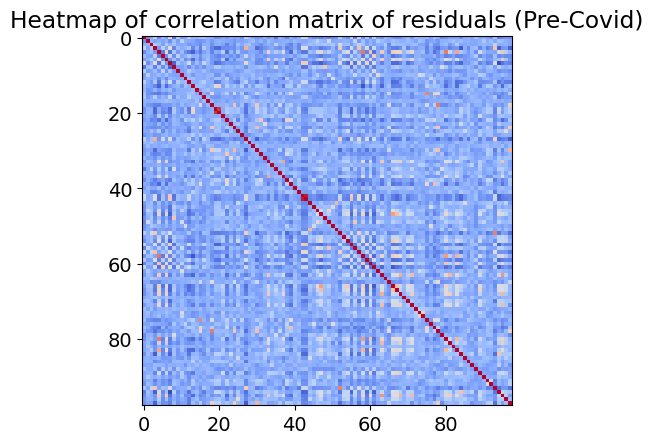

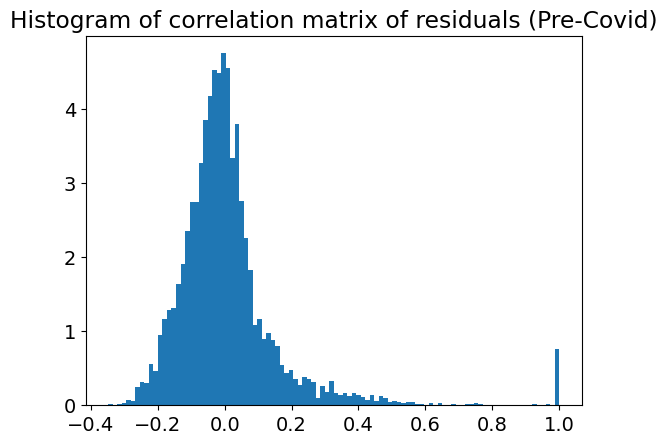

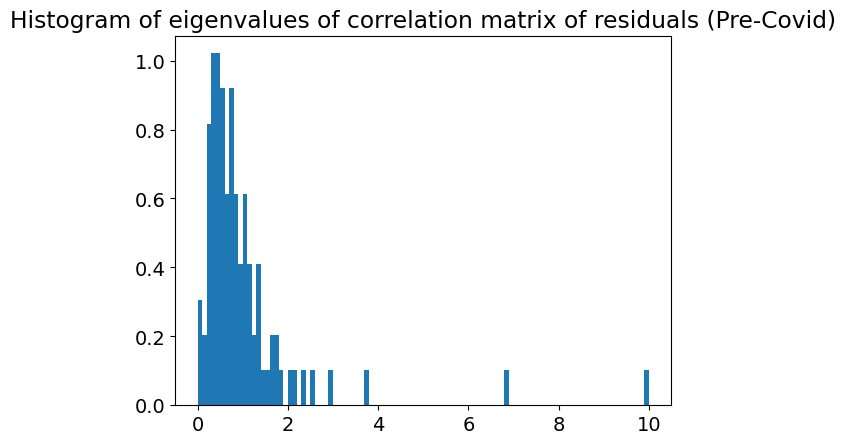

[np.float64(1.847775062827126), np.float64(0.41045945627695857)]


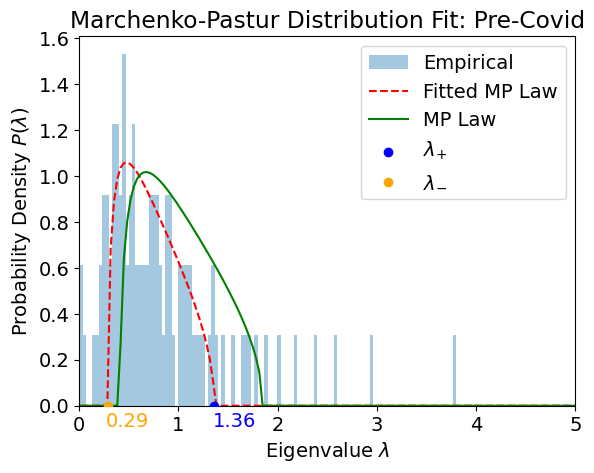

Number of eigenvalues below lambda_minus: 11


C:\Users\mukul\AppData\Local\Temp\ipykernel_25720\3376463636.py:141: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(eigenvalues_corr), np.log10(IPR))


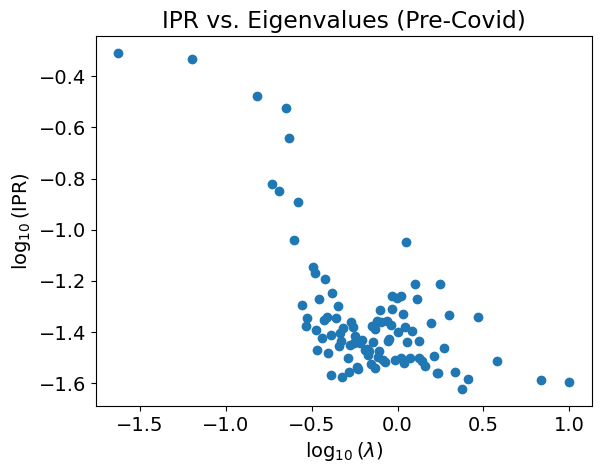

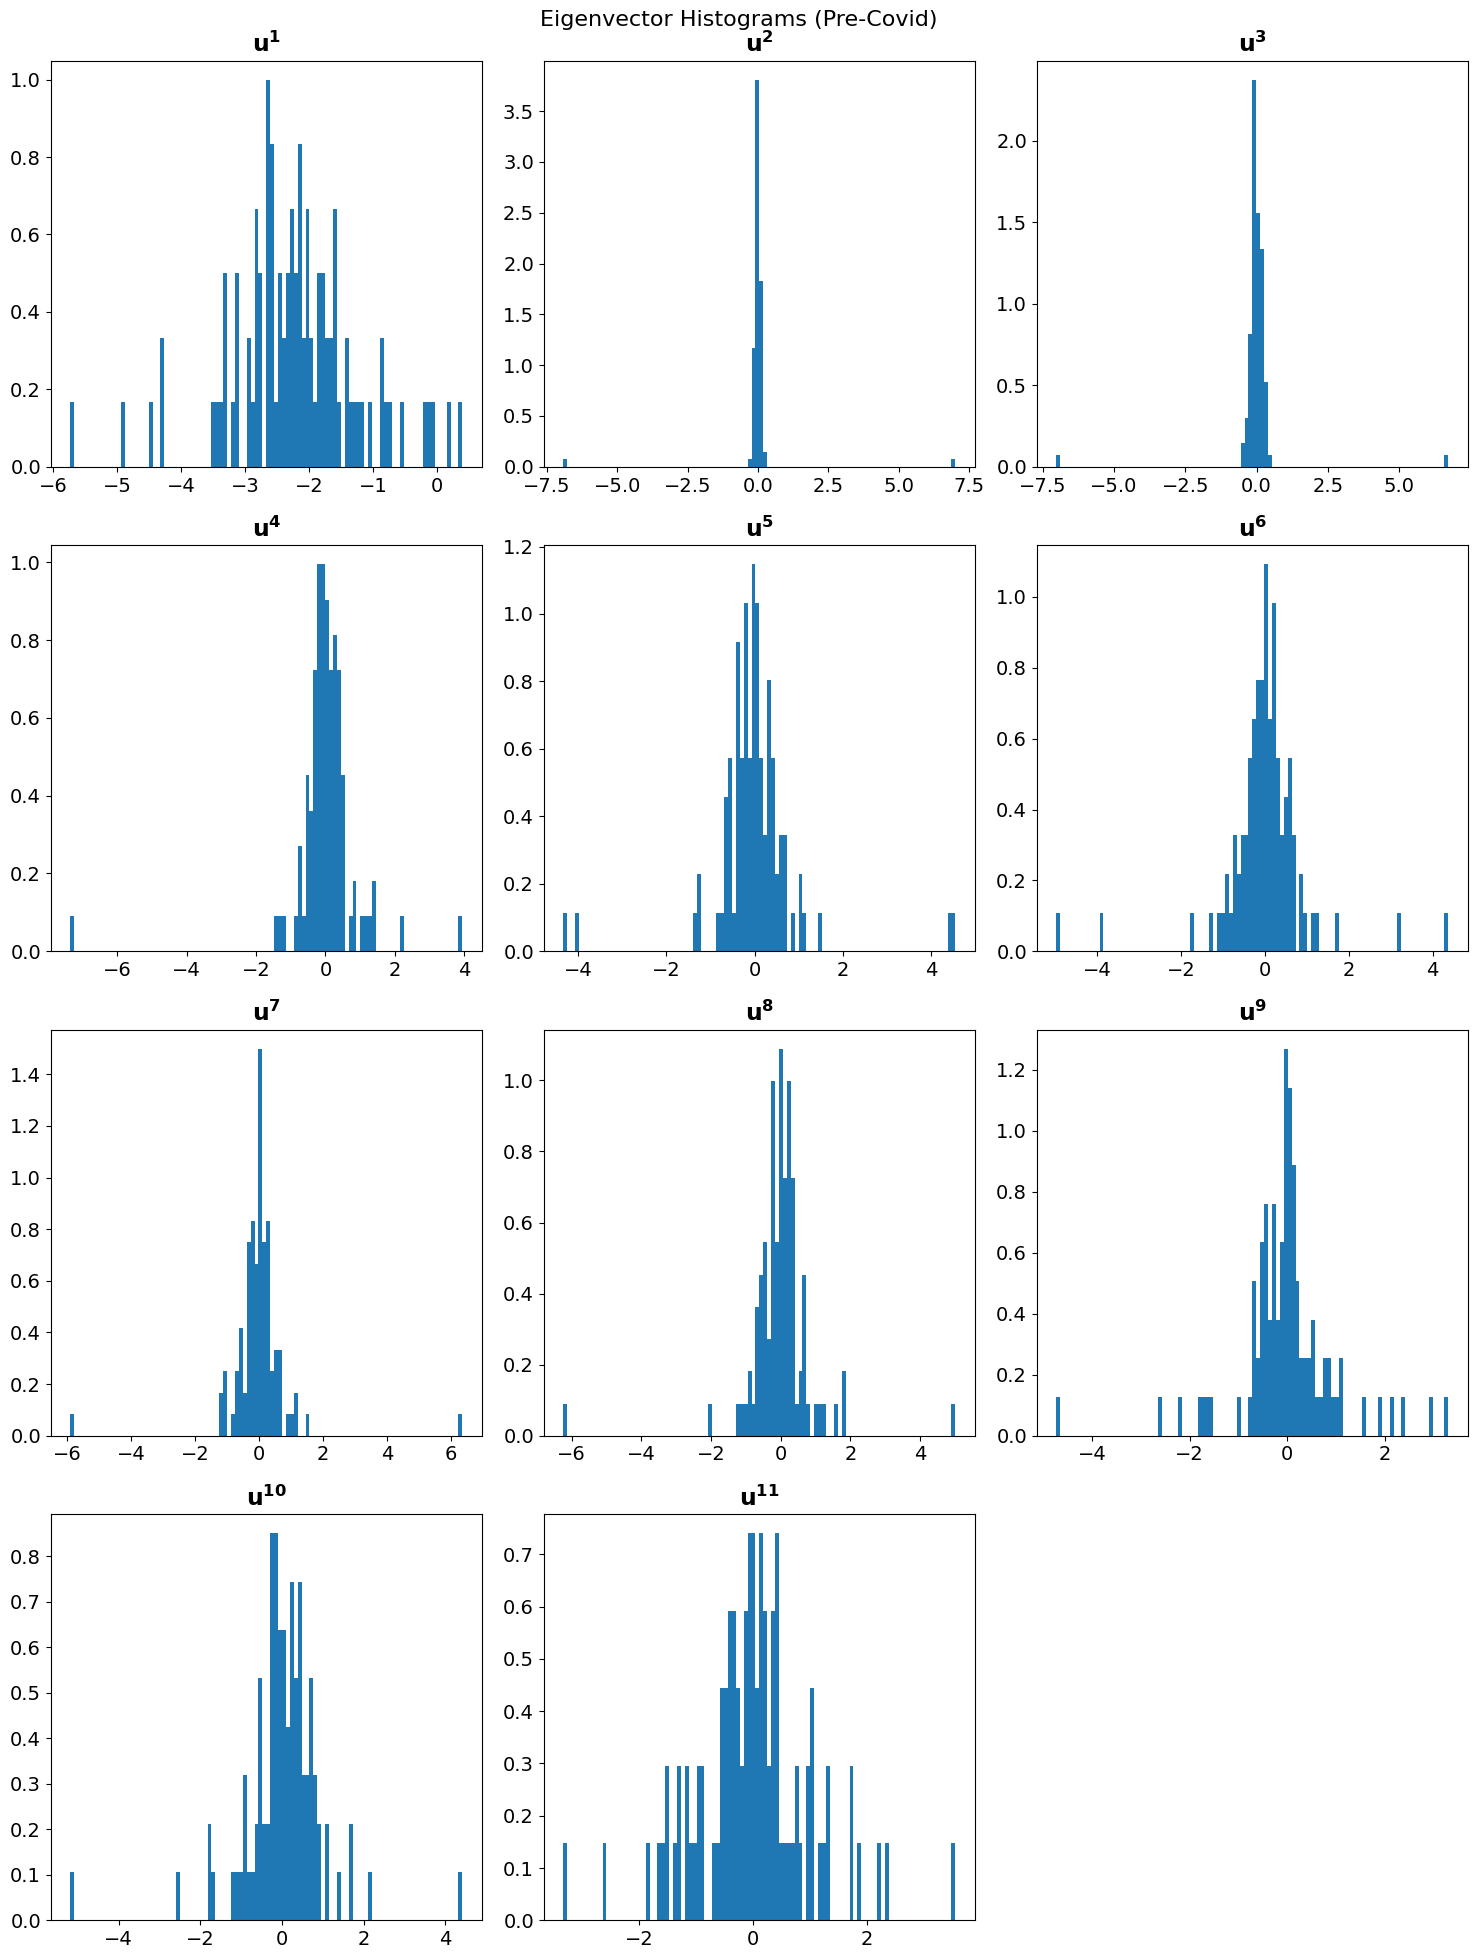

Mean of correlation matrix: 0.007959138208158736, Std of correlation matrix: 0.1627919464828045
 ;$u^{1}$;  0.005878856181827952, IPR: 0.017585040648022097
CTA-PB; EIDP, Inc.; Basic Materials
AMD; Advanced Micro Devices, Inc.; Technology
 ;$u^{2}$;  0.9709885095320825, IPR: 0.49138953063281915
GOOGL; Alphabet Inc.; Communication Services
GOOG; Alphabet Inc.; Communication Services
 ;$u^{3}$;  0.9207679416270483, IPR: 0.46618348991885294
BRK-A; Berkshire Hathaway Inc.; Financial Services
BRK-B; Berkshire Hathaway Inc.; Financial Services
 ;$u^{4}$;  0.7657218027855665, IPR: 0.3336608285554248
NEE; NextEra Energy, Inc.; Utilities
AEP; American Electric Power Company, Inc.; Utilities
 ;$u^{5}$;  0.7321764802770007, IPR: 0.15033317467036703
V; Visa Inc.; Financial Services
MA; Mastercard Incorporated; Financial Services
 ;$u^{6}$;  0.7542626032562776, IPR: 0.14132430951699368
BP; BP p.l.c.; Energy
SHEL; Shell plc; Energy
 ;$u^{7}$;  0.7183287381270242, IPR: 0.29848808741248983
BHP; BHP Gro

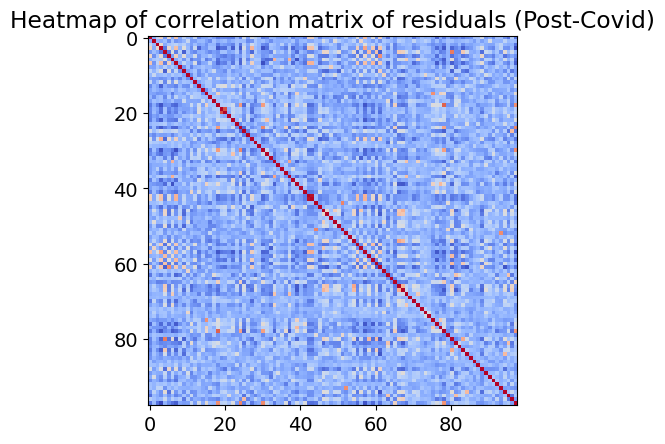

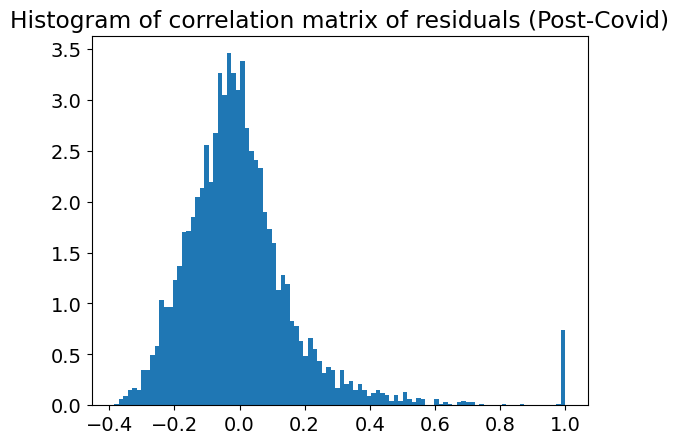

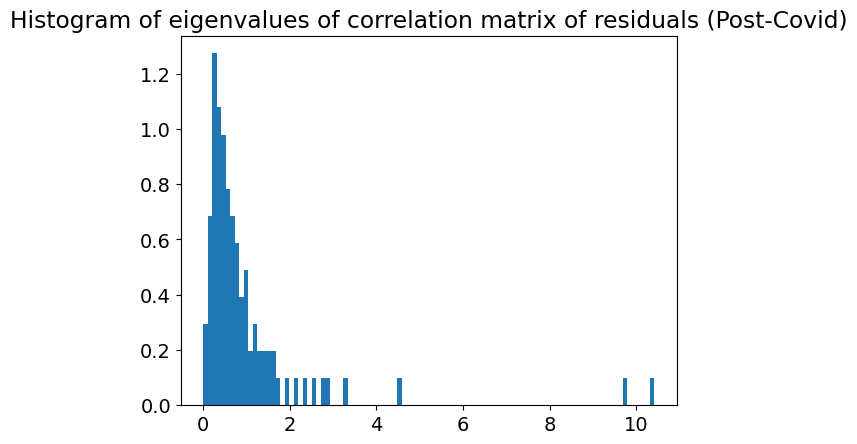

[np.float64(1.853623557958718), np.float64(0.4077097753746155)]


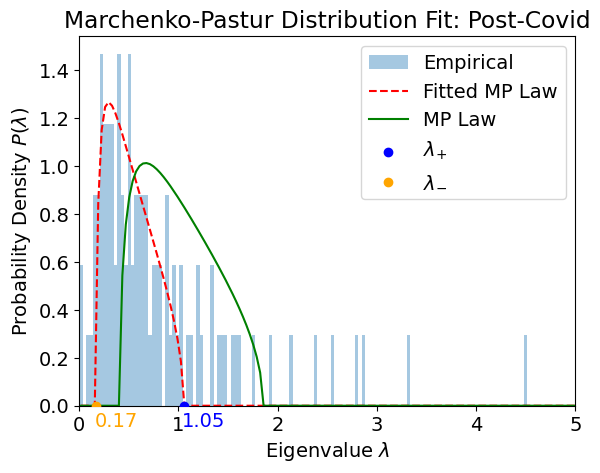

Number of eigenvalues below lambda_minus: 7


C:\Users\mukul\AppData\Local\Temp\ipykernel_25720\3376463636.py:141: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(eigenvalues_corr), np.log10(IPR))


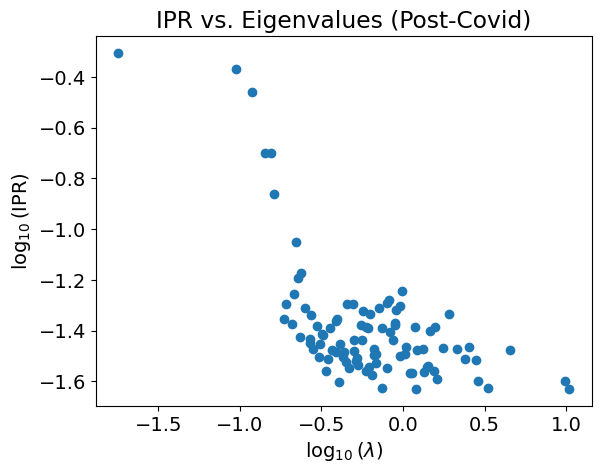

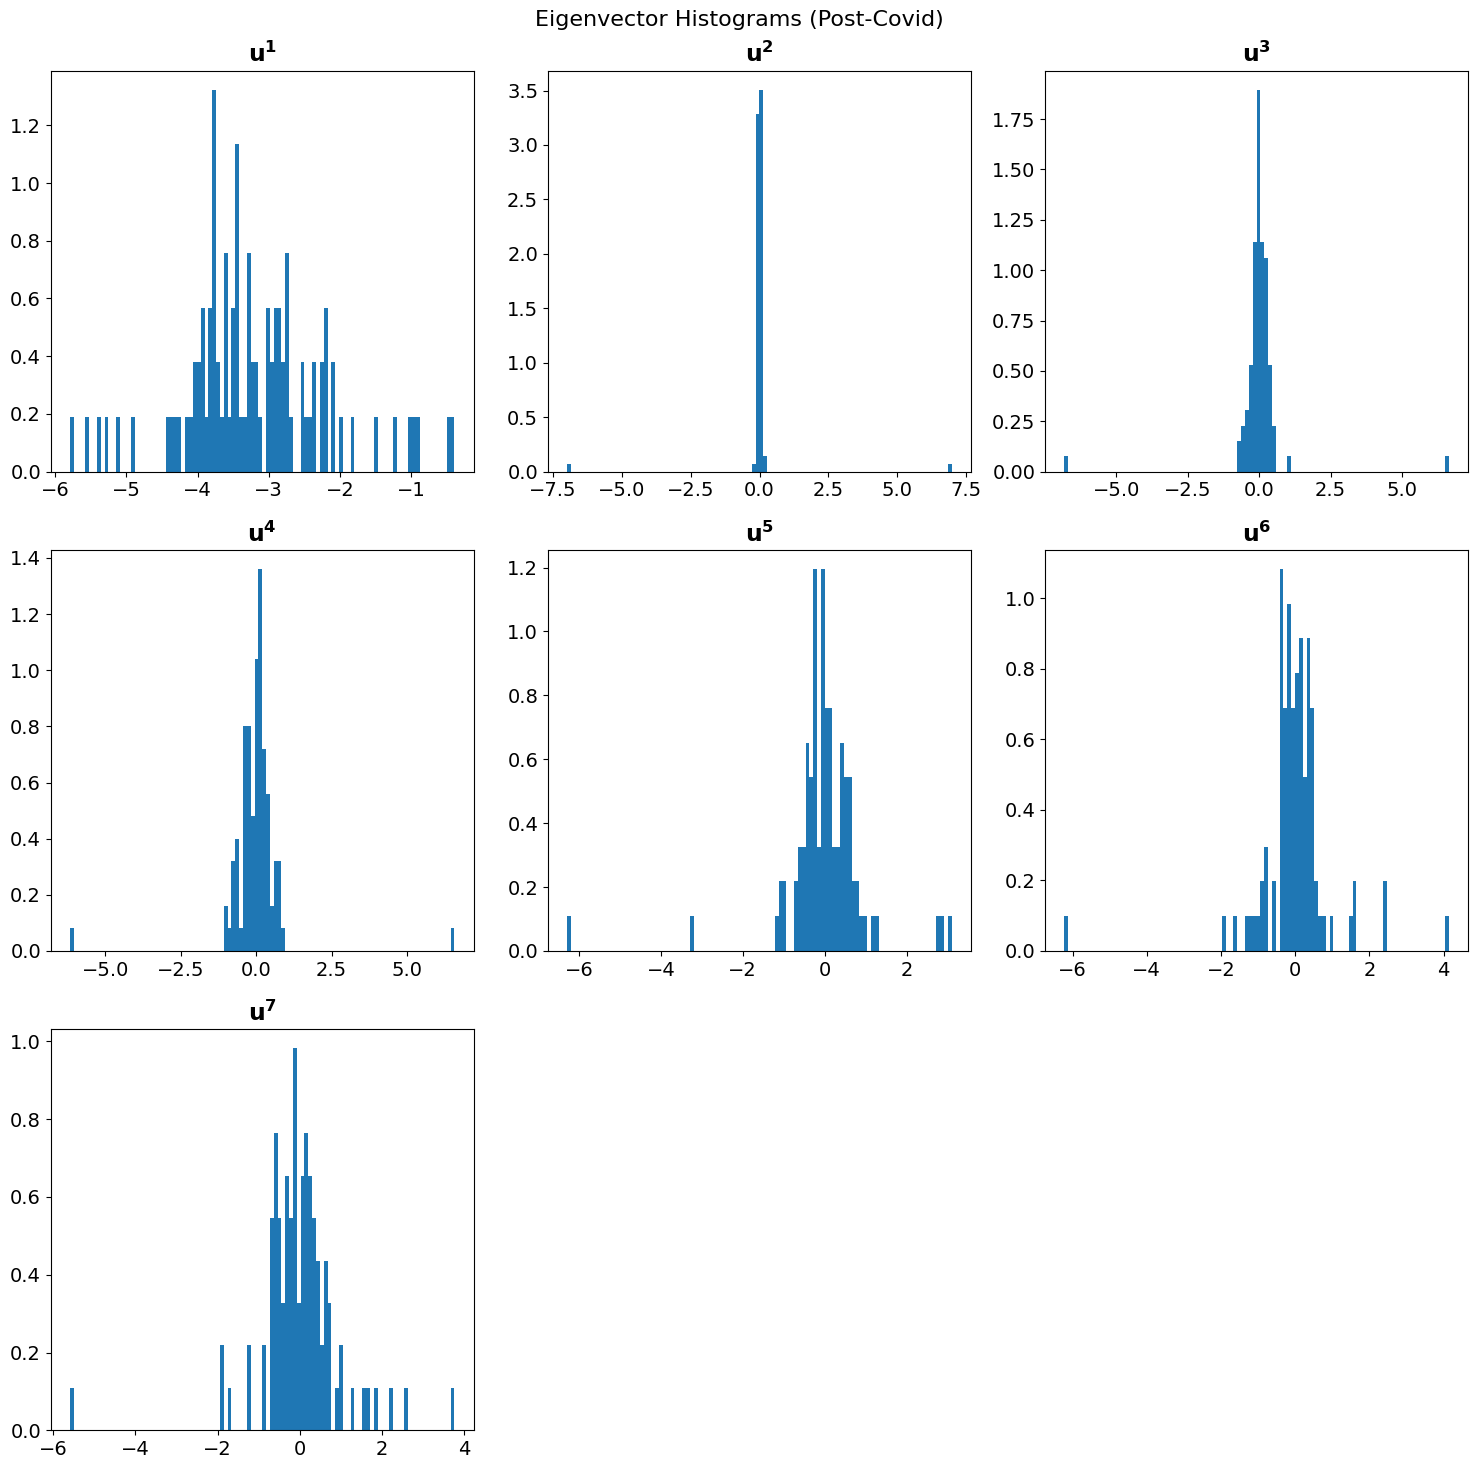

Mean of correlation matrix: 0.0028076774482339293, Std of correlation matrix: 0.1830308243404776
 ;$u^{1}$;  -0.03266683838716189, IPR: 0.013395917198090072
PLDGP; Prologis, Inc.; Real Estate
NVDA; NVIDIA Corporation; Technology
 ;$u^{2}$;  0.9787571295529336, IPR: 0.4944455121388471
GOOG; Alphabet Inc.; Communication Services
GOOGL; Alphabet Inc.; Communication Services
 ;$u^{3}$;  0.8668977878038269, IPR: 0.427365397307709
BRK-A; Berkshire Hathaway Inc.; Financial Services
BRK-B; Berkshire Hathaway Inc.; Financial Services
 ;$u^{4}$;  0.8185435740536487, IPR: 0.34651423051343644
SHEL; Shell plc; Energy
BP; BP p.l.c.; Energy
 ;$u^{5}$;  -0.06839376813931085, IPR: 0.19883030065515034
HD; The Home Depot, Inc.; Consumer Cyclical
SO; The Southern Company; Utilities
 ;$u^{6}$;  0.7156716968738747, IPR: 0.19886662679320147
COP; ConocoPhillips; Energy
XOM; Exxon Mobil Corporation; Energy
 ;$u^{7}$;  0.7088305580829688, IPR: 0.13797929681278975
COP; ConocoPhillips; Energy
CVX; Chevron Corpora

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def financial_analysis(analysis, title_suffix):
    """
    Perform financial analysis to compute G1000, estimate residuals, create a correlation matrix,
    fit the Marchenko-Pastur distribution, and find the stocks with the largest and smallest 
    magnitudes in the first few eigenvectors.

    Parameters:
    analysis: An object containing the following attributes:
        - analysis.eigenvectors: Matrix of eigenvectors.
        - analysis.returns_data: Matrix of daily returns.
        - analysis.metadata: Metadata for stocks (used to find stock names).
    title_suffix (str): String to append to plot titles (e.g., 'Pre-COVID' or 'Post-COVID').
        
    Returns:
    residuals, correlation matrix, eigenvalue distribution, and stock details with largest/smallest
    magnitudes of eigenvectors.
    """
    
    def compute_G1000(eigenvectors, daily_returns):
        """Function to compute G1000."""
        u1000 = eigenvectors[:, 0]  # First eigenvector
        G1000 = np.dot(u1000.T, daily_returns)  # G1000 is a dot product of u1000 and daily returns
        return G1000

    def estimate_alpha_beta_residuals(daily_returns, G1000):
        """Estimate alpha, beta, and residuals (epsilon) for each stock."""
        daily_returns = daily_returns.to_numpy()
        num_stocks, num_days = daily_returns.shape
        alphas = np.zeros(num_stocks)
        betas = np.zeros(num_stocks)
        residuals = np.zeros((num_stocks, num_days))
        
        # Linear regression model
        model = LinearRegression()
        
        for i in range(num_stocks):
            G_i = daily_returns[i, :]
            G1000_reshaped = G1000.reshape(-1, 1)
            model.fit(G1000_reshaped, G_i)
            alphas[i] = model.intercept_  # Alpha (intercept)
            betas[i] = model.coef_[0]     # Beta (slope)
            residuals[i, :] = G_i - (alphas[i] + betas[i] * G1000)
        
        return alphas, betas, residuals

    def find_largest_smallest_indices(eigenvectors, num_eigenvalues, title_suffix):
        """
        Find the indices of the stocks with the largest and smallest magnitudes in the eigenvectors,
        and create subplots for the histograms of the first num_eigenvalues eigenvectors.
        
        Parameters:
        eigenvectors (numpy.ndarray): Matrix of eigenvectors.
        num_eigenvalues (int): Number of eigenvectors to consider.
        title_suffix (str): String to append to plot titles (e.g., 'Pre-COVID' or 'Post-COVID').

        Returns:
        idx (list of lists): List of [largest_idx, smallest_idx] for each eigenvector.
        """
        idx = []

        # Determine the number of rows and columns for the subplots grid
        cols = 3  # Set to 3 columns for the grid
        rows = (num_eigenvalues + cols - 1) // cols  # Calculate the number of rows needed

        fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

        for i in range(num_eigenvalues):
            eigenvec = eigenvectors[:, -1-i] # Get the eigenvector
            eigenvec = eigenvec/ np.std(eigenvec) # Standardize the eigenvector
            largest_idx = np.argmax(eigenvec)
            smallest_idx = np.argmin(eigenvec)

            # Plot the eigenvector histogram in the appropriate subplot
            
            axs[i].hist(eigenvec, bins=100, density=True)
            axs[i].set_title(rf'$\mathbf{{u^{{{i+1}}}}}$')
            
            idx.append([largest_idx, smallest_idx])

        # Remove any empty subplots if num_eigenvalues < rows * cols
        for j in range(i + 1, rows * cols):
            fig.delaxes(axs[j])  # Remove empty axes

        fig.suptitle(rf'Eigenvector Histograms ({title_suffix})', fontsize=16)

        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()

        return idx

    # Compute G1000
    G1000 = compute_G1000(analysis.eigenvectors, analysis.returns_data)

    # Estimate alpha, beta, and residuals
    alphas, betas, residuals = estimate_alpha_beta_residuals(analysis.returns_data, G1000)

    # Correlation matrix
    corr_matrix = np.corrcoef(residuals)
    # eigenvalues and eigenvectors of the correlation matrix 
    eigenvalues_corr, eigenvectors_corr = np.linalg.eigh(corr_matrix)
    # have them in descending order
    eigenvalues_corr = eigenvalues_corr[::-1]
    eigenvectors_corr = eigenvectors_corr[:, ::-1]


    # Plot heatmap of correlation matrix
    plt.figure()
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.title(f'Heatmap of correlation matrix of residuals ({title_suffix})')
    plt.show()

    # Histogram of correlation matrix
    plt.figure()
    plt.hist(corr_matrix.flatten(), bins=100, density=True)
    plt.title(f'Histogram of correlation matrix of residuals ({title_suffix})')
    plt.show()

    # Eigenvalue distribution of correlation matrix
    plt.figure()
    plt.hist(eigenvalues_corr, bins=100, density=True)
    plt.title(f'Histogram of eigenvalues of correlation matrix of residuals ({title_suffix})')
    plt.show()

    # Fit the Marchenko-Pastur distribution
    gamma = analysis.returns_data.shape[0] / analysis.returns_data.shape[1]
    lambda_plus, lambda_minus = fit_mp_distribution(eigenvalues_corr, gamma, title=f'Marchenko-Pastur Distribution Fit: {title_suffix}', bins=300)

    # Number of eigenvalues less than lambda_minus
    num_eigenvalues = np.sum(eigenvalues_corr < lambda_minus)
    print(f"Number of eigenvalues below lambda_minus: {num_eigenvalues}")

    # IPR of all eigenvectors plot
    # x axis is log(eigenvalue), y axis is log of IPR
    IPR = np.sum(eigenvectors_corr**4, axis=0)
    plt.figure()
    plt.scatter(np.log10(eigenvalues_corr), np.log10(IPR))
    plt.xlabel(r'$\log_{10}(\lambda)$')
    plt.ylabel(r'$\log_{10}(\text{IPR})$')
    plt.title(f'IPR vs. Eigenvalues ({title_suffix})')
    plt.show()



    # Find stocks with largest and smallest eigenvector magnitudes
    left_filtered_groups = find_largest_smallest_indices(eigenvectors_corr, num_eigenvalues, title_suffix)


    # Print stock names and correlation matrix values
    metadata = analysis.metadata
    print(f"Mean of correlation matrix: {np.mean(corr_matrix)}, Std of correlation matrix: {np.std(corr_matrix)}")
    for i, idx in enumerate(left_filtered_groups):
        # find inverse participation ratio
        IPR = np.sum(eigenvectors_corr[:, -1-i]**4)
        print(rf" ;$u^{{{i+1}}}$;  {corr_matrix[idx[0], idx[1]]}, IPR: {IPR}")
        print(f"{metadata.iloc[idx[0]]['Symbol']}; {metadata.iloc[idx[0]]['Company Name']}; {metadata.iloc[idx[0]]['Sector']}")
        print(f"{metadata.iloc[idx[1]]['Symbol']}; {metadata.iloc[idx[1]]['Company Name']}; {metadata.iloc[idx[1]]['Sector']}")

    return residuals, corr_matrix, eigenvalues_corr, left_filtered_groups

# Example usage:
residuals, corr_matrix_pre, eigenvalues_corr, left_filtered_groups = financial_analysis(analysis, 'Pre-Covid')
residuals, corr_matrix_post, eigenvalues_corr, left_filtered_groups = financial_analysis(analysis_post, 'Post-Covid')


In [8]:
def print_groups(analysis, groups):
    print("Symbol; Company Name; Sector")
    for i, group in enumerate(groups):
        # g_string = f"{98-i}"
        g_string = f"{i+1}"
        print(" ; u^{" + g_string + "} ; ")
        for j, stock in enumerate(group):
            if j>4:
                break
            print(analysis.metadata.loc[stock-1, 'Symbol'],"; ",
                    analysis.metadata.loc[stock-1, 'Company Name'],"; ",
                    analysis.metadata.loc[stock-1, 'Sector'])
sectors_groups_pre_covid = [
    [79, 19, 25, 31, 98, 40, 66, 26, 77, 58],  
    [62, 8, 81, 44, 56, 4, 43, 28, 6, 5],     
    [64, 52, 96, 82, 16, 54, 45, 72, 80, 18],  
    [39, 46, 53, 21, 33, 79, 14, 20, 16, 11], 
    [2, 45, 9, 52, 84, 91, 31, 71, 27, 49],    
    [39, 24, 49, 85, 9, 78, 80, 12, 36, 95],   
    [45, 52, 86, 36, 22, 18, 37, 94, 20, 83],   
    [35,22 ,74 ,98 ,11 ,25 ,90 ,31 ,24 ,51],  
    [2 ,57 ,50 ,11 ,74 ,42 ,94 ,16 ,20 ,21],   
    [15 ,69 ,30 ,94 ,53 ,87 ,38 ,76 ,34 ,7]    
]

sectors_groups_post_covid = [
    [5, 59, 81, 67, 64, 96, 48, 68, 84, 8],   # 
    [4, 53, 31, 28, 94, 58, 98, 79, 8, 25],   # 
    [19, 79, 16, 76, 21, 20, 37, 66, 25, 46], # 
    [50, 57, 63, 11, 47, 74, 69, 82, 75, 34], # 
    [26, 39, 23, 32, 97, 86, 98, 46, 51, 31], # 
    [3, 25, 31, 98, 9, 53, 94, 90, 51, 88],   # 
    [82 ,64 ,69 ,55 ,50 ,68 ,48 ,2 ,96 ,67], # 
    [45 ,52 ,21 ,20 ,86 ,26 ,10 ,42 ,14 ,43],# 
    [9 ,49 ,51 ,77 ,36 ,12 ,76 ,21 ,20 ,46]   # 
]


sectors_groups_pre_covid_right = [
    [94, 53],
    [5, 59],
    [21, 20],
    [44, 43],
    [53, 8]
]

sectors_groups_post_covid_right = [
    [81, 52],
    [79, 19],
    [21, 20],
    [44, 43],
    [43, 44]
]

print("Pre-Covid Groups")
print_groups(analysis, sectors_groups_pre_covid_right)
print("Post-Covid Groups")
print_groups(analysis, sectors_groups_post_covid_right)


Pre-Covid Groups
Symbol; Company Name; Sector
 ; u^{1} ; 
V ;  Visa Inc. ;  Financial Services
MA ;  Mastercard Incorporated ;  Financial Services
 ; u^{2} ; 
AEP ;  American Electric Power Company, Inc. ;  Utilities
NEE ;  NextEra Energy, Inc. ;  Utilities
 ; u^{3} ; 
BRK-B ;  Berkshire Hathaway Inc. ;  Financial Services
BRK-A ;  Berkshire Hathaway Inc. ;  Financial Services
 ; u^{4} ; 
GOOGL ;  Alphabet Inc. ;  Communication Services
GOOG ;  Alphabet Inc. ;  Communication Services
 ; u^{5} ; 
MA ;  Mastercard Incorporated ;  Financial Services
AMZN ;  Amazon.com, Inc. ;  Consumer Cyclical
Post-Covid Groups
Symbol; Company Name; Sector
 ; u^{1} ; 
SO ;  The Southern Company ;  Utilities
LOW ;  Lowe's Companies, Inc. ;  Consumer Cyclical
 ; u^{2} ; 
SHEL ;  Shell plc ;  Energy
BP ;  BP p.l.c. ;  Energy
 ; u^{3} ; 
BRK-B ;  Berkshire Hathaway Inc. ;  Financial Services
BRK-A ;  Berkshire Hathaway Inc. ;  Financial Services
 ; u^{4} ; 
GOOGL ;  Alphabet Inc. ;  Communication Services
GO

d:\mukul\Desktop\Unimelb\Masters\Year 2\Large Data and methods\NoiseResolution-HighDimData\.venv\Lib\site-packages\sklearn\covariance\_graph_lasso.py:191: ConvergenceWarning: graphical_lasso: did not converge after 1000 iteration: dual gap: -2.171e-02
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

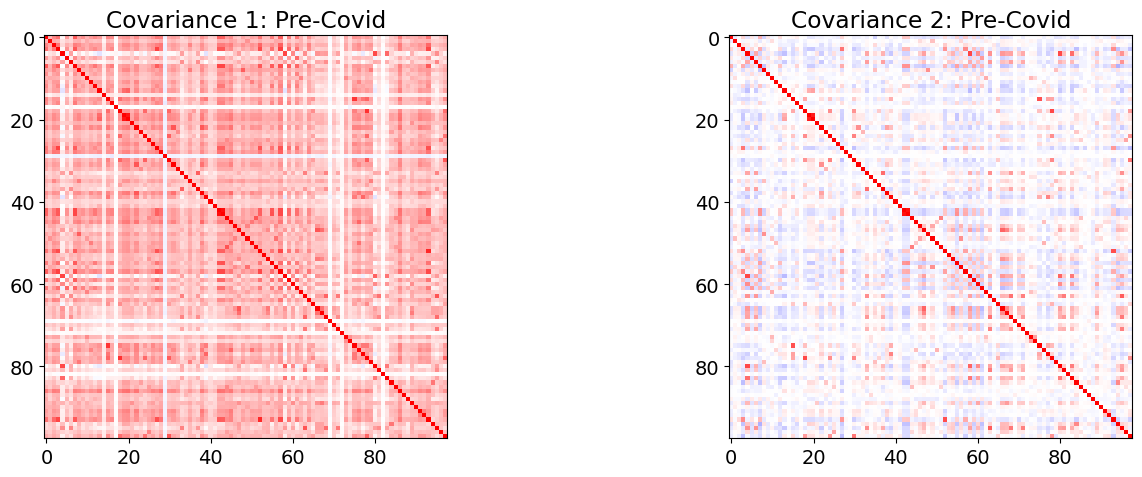

Cluster 1: American Electric Power Company, Inc., NextEra Energy, Inc., The Southern Company, Sempra
Cluster 2: Apple Inc., Adobe Inc., Amazon.com, Inc., Salesforce, Inc., Alphabet Inc., Alphabet Inc., Mastercard Incorporated, Meta Platforms, Inc., Microsoft Corporation, Netflix, Inc., Visa Inc.
Cluster 3: Accenture plc, Air Products and Chemicals, Inc., Ecolab Inc., Linde plc, Oracle Corporation, The Sherwin-Williams Company
Cluster 4: Bank of America Corporation, Bank of America Corporation, EIDP, Inc., Prologis, Inc., Roche Holding AG, Simon Property Group, Inc.
Cluster 5: Anheuser-Busch InBev SA/NV, Comcast Corporation, Costco Wholesale Corporation, The Walt Disney Company, The Home Depot, Inc., Lowe's Companies, Inc., McDonald's Corporation, The TJX Companies, Inc., Walmart Inc.
Cluster 6: BP p.l.c., ConocoPhillips, Chevron Corporation, Shell plc, Exxon Mobil Corporation
Cluster 7: Deutsche Telekom AG, Enbridge Inc., Fomento Económico Mexicano, S.A.B. de C.V., GE Aerospace, Roche 

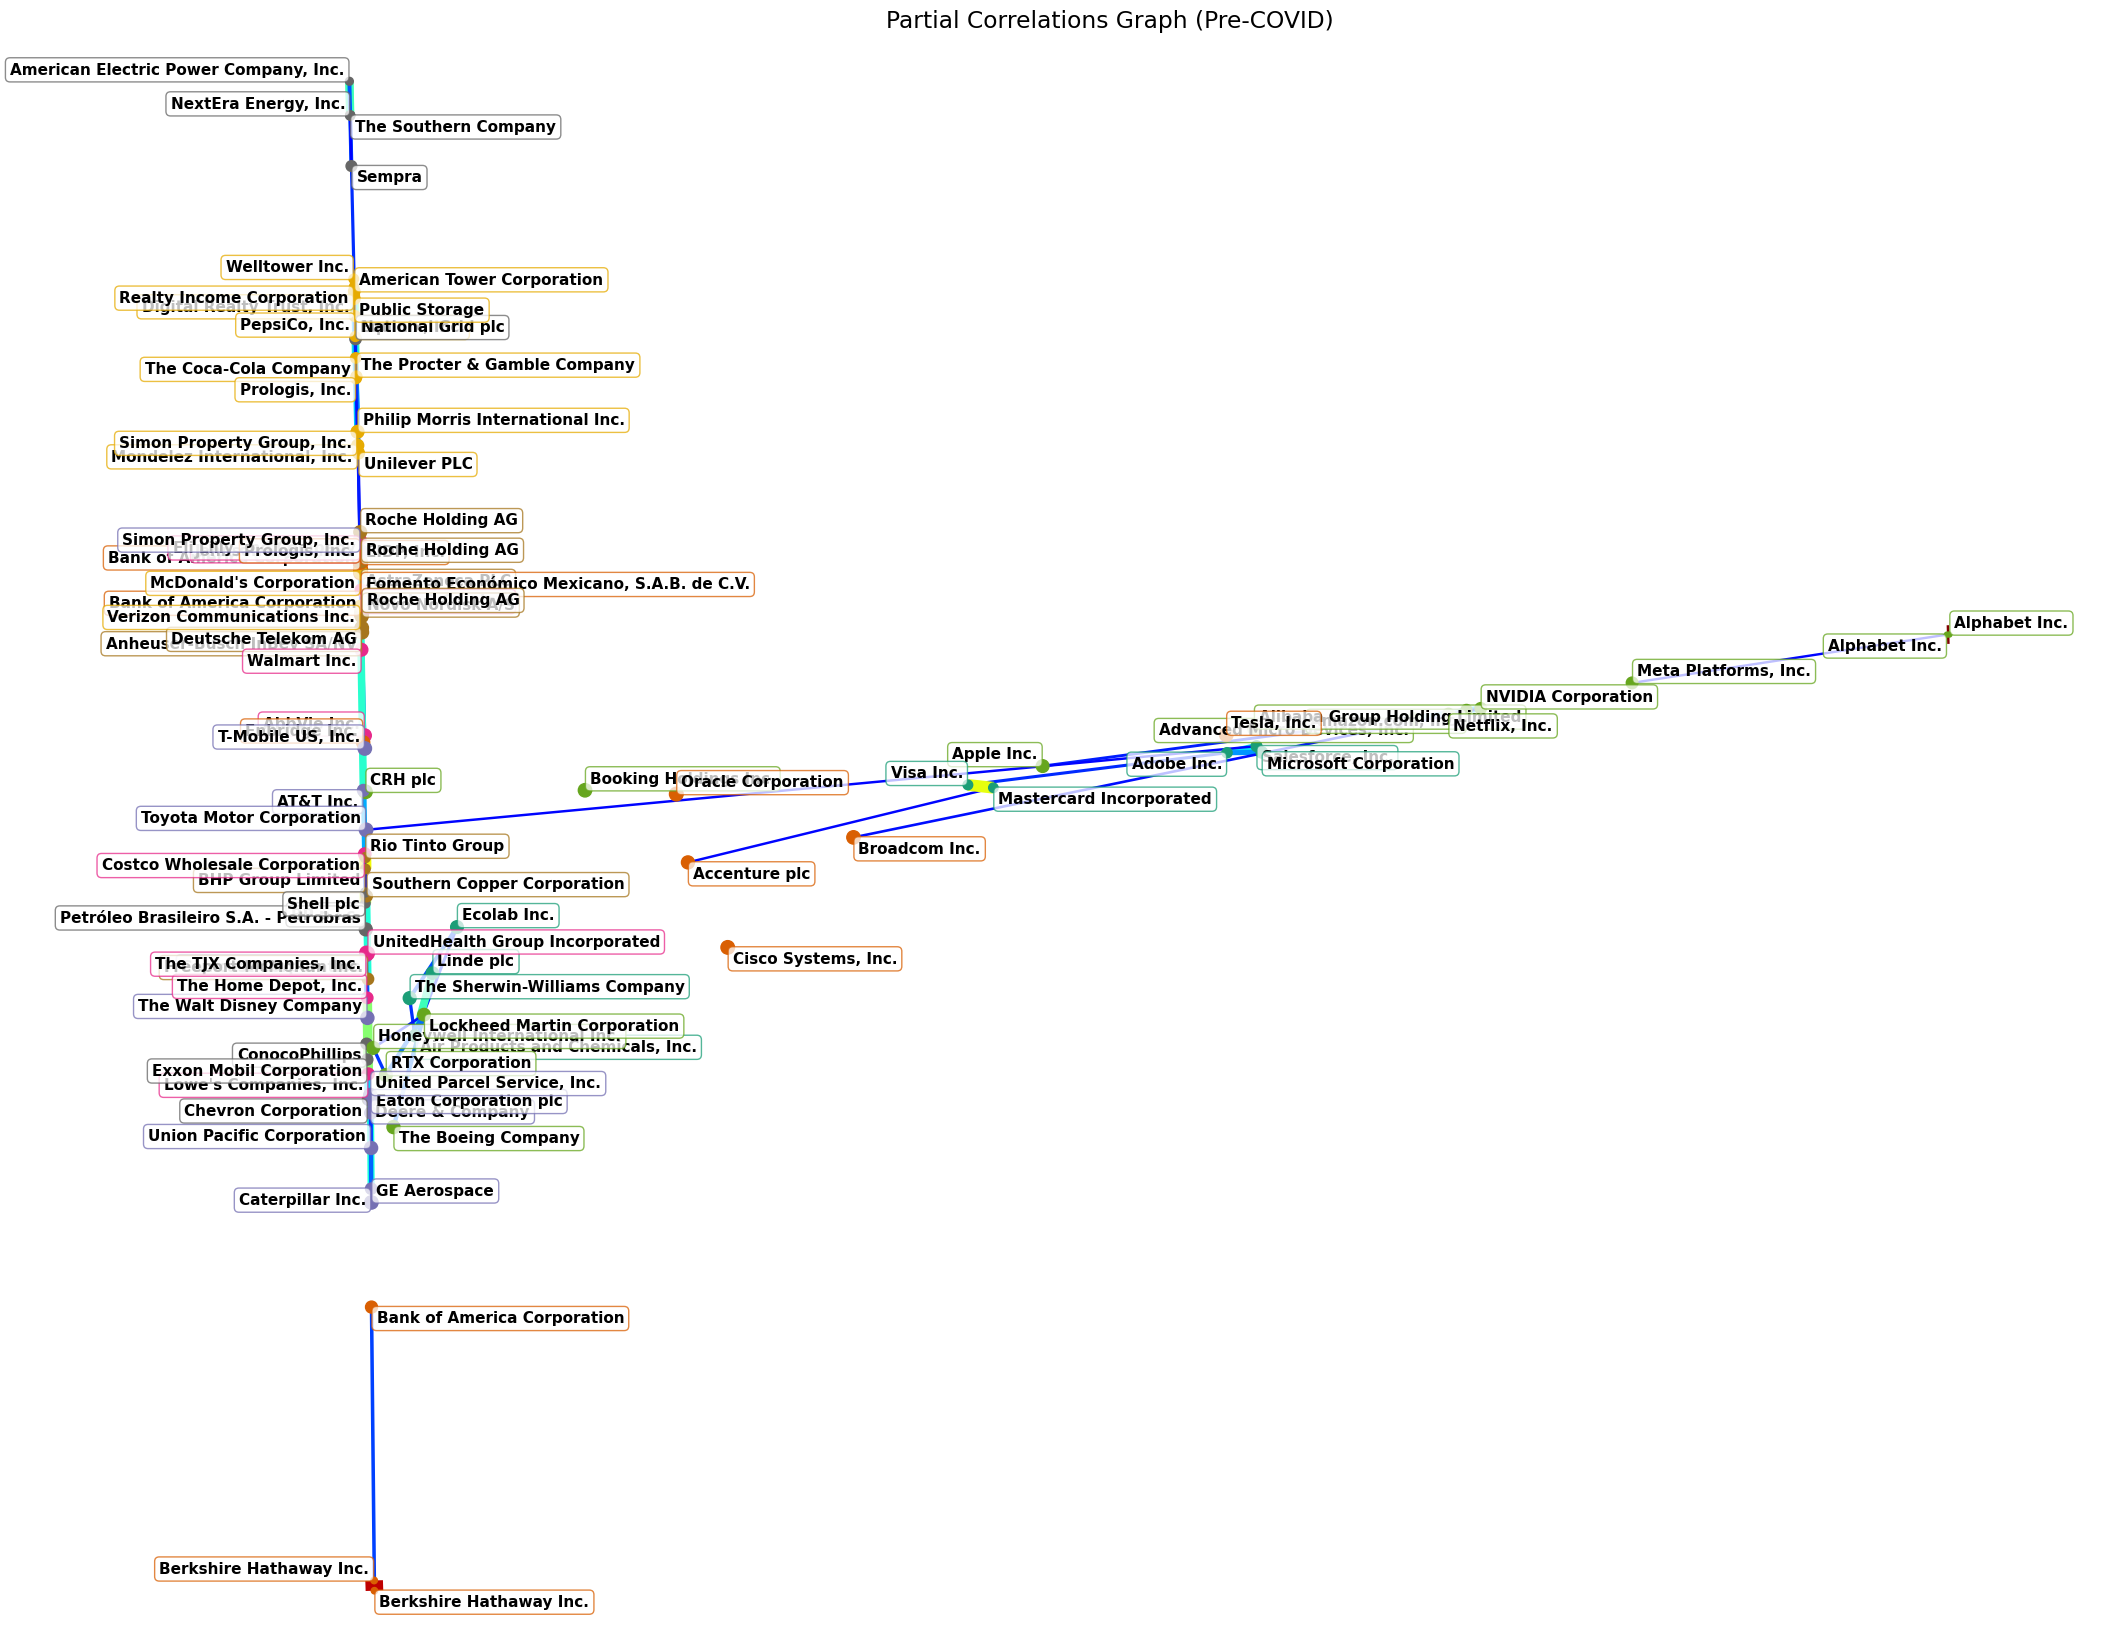

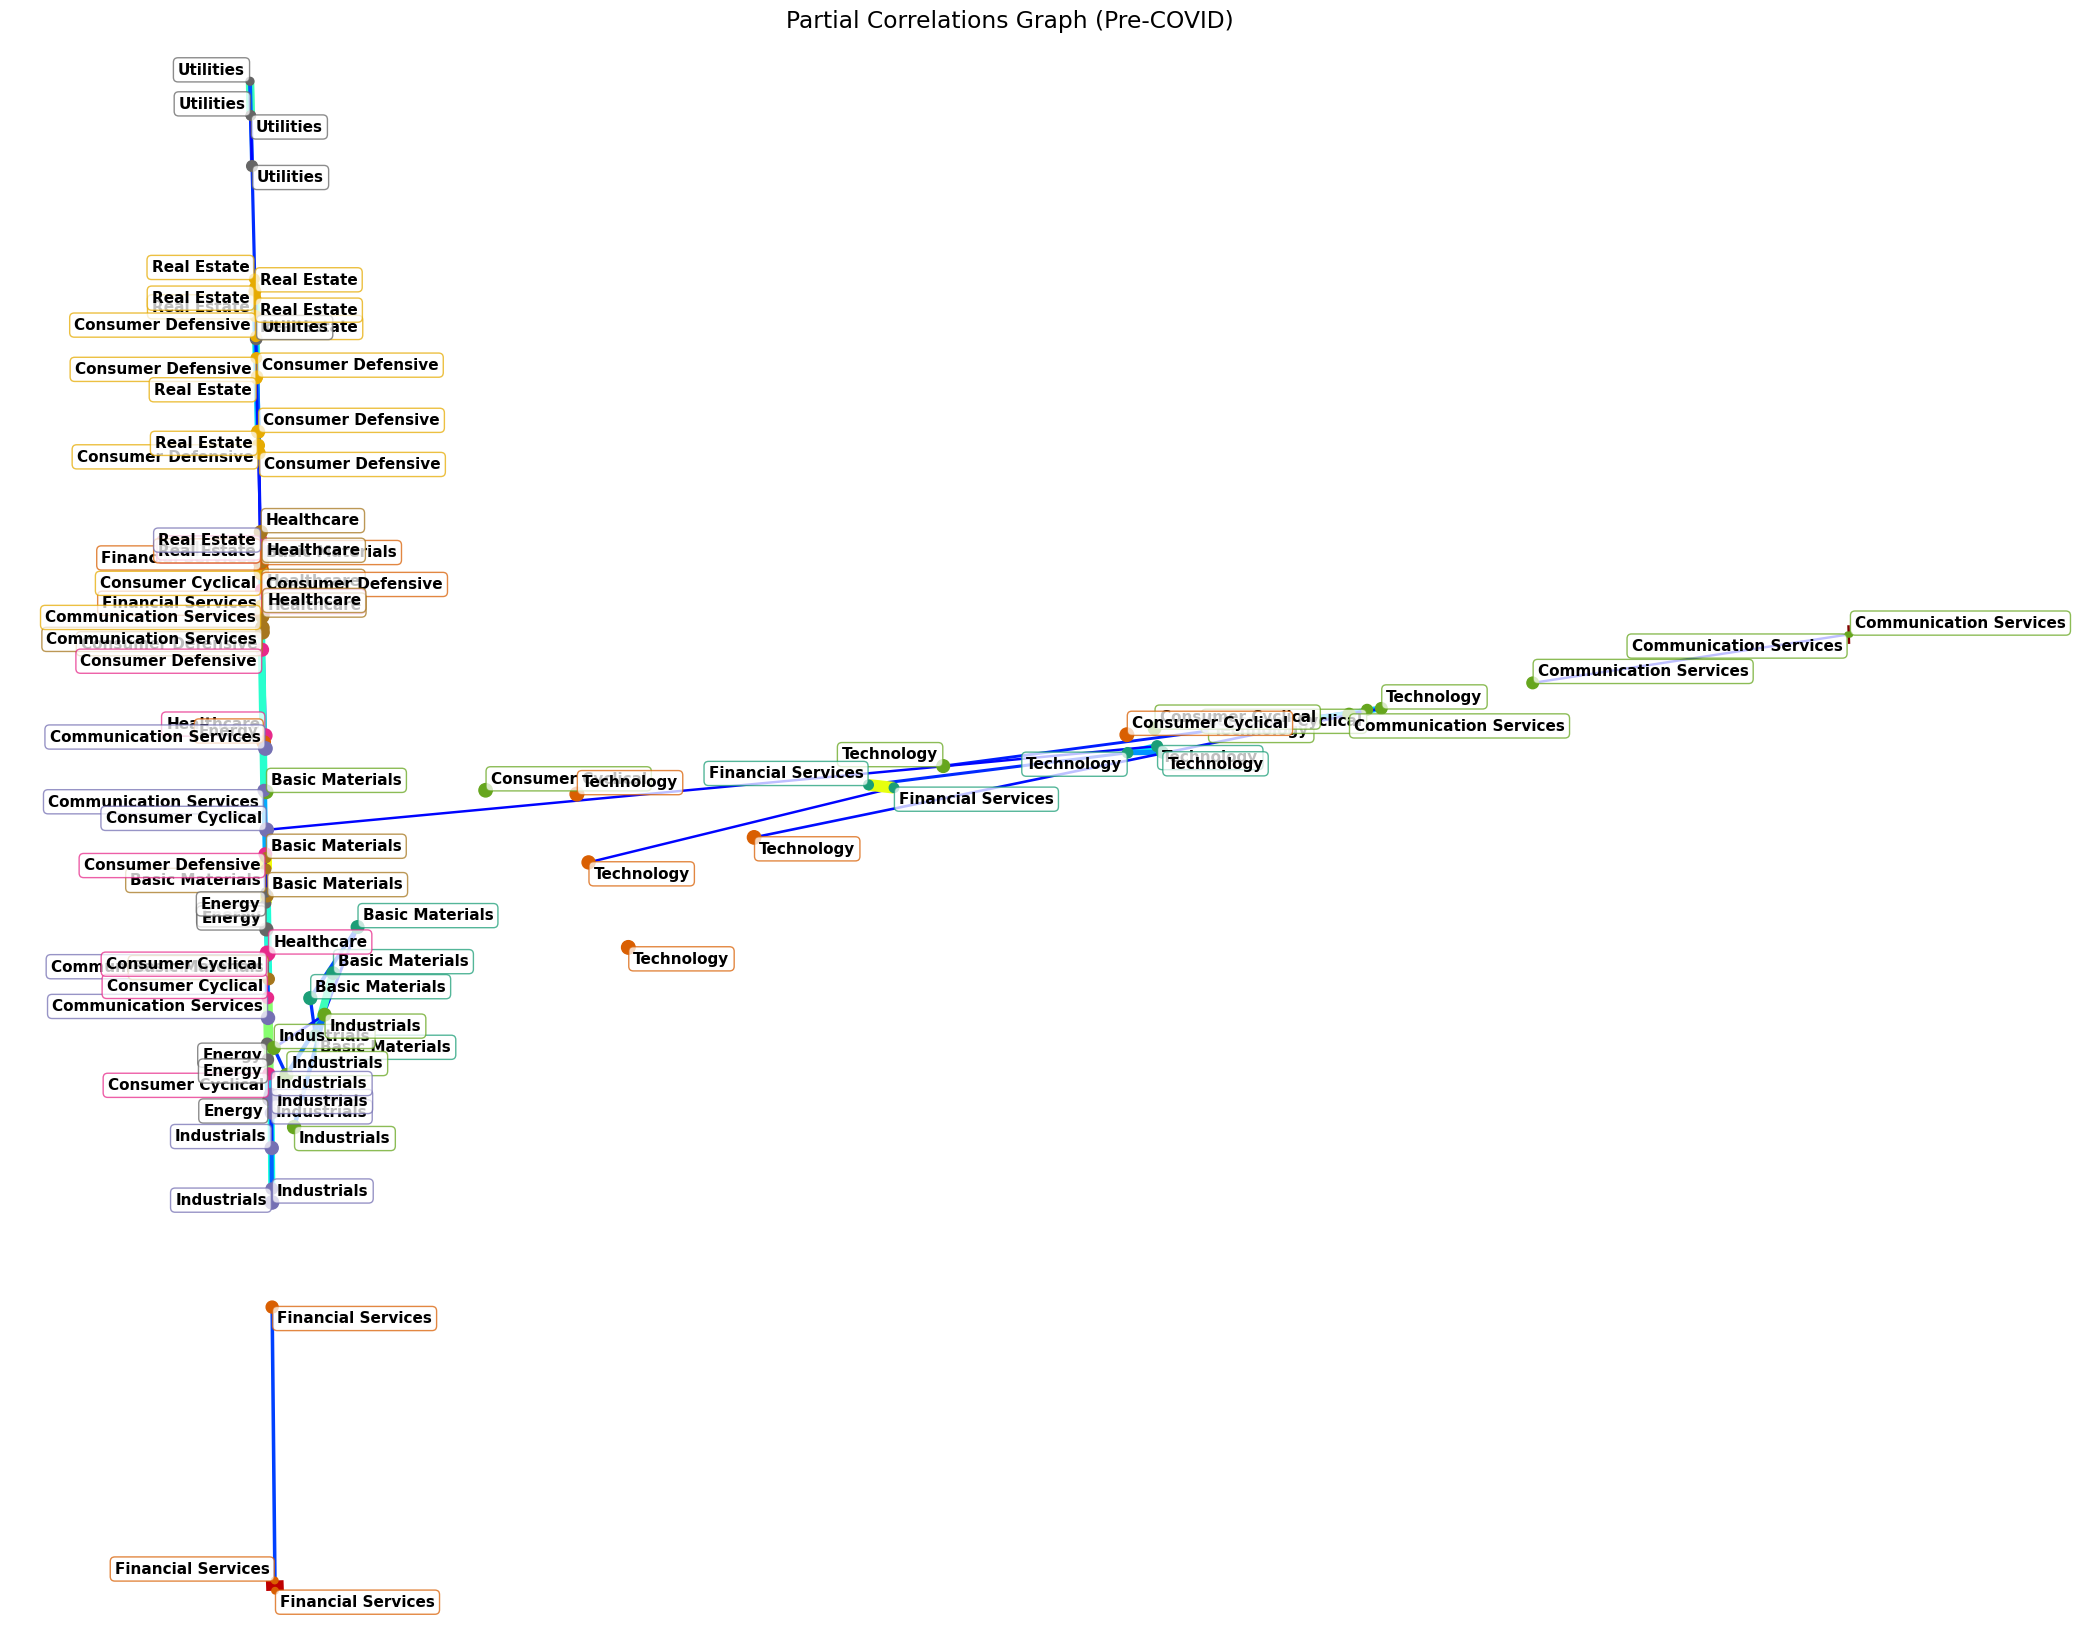

In [16]:
# do structure recovery using graphical lasso
from sklearn.covariance import GraphicalLasso
from matplotlib.collections import LineCollection
from sklearn import cluster
from sklearn import manifold
import mplcursors

def structure_recovery(corr_matrix, corr_matrix_without_top_eig, title_suffix, alpha=0.04):
    """
    Perform structure recovery using the Graphical Lasso algorithm to estimate the precision matrix.

    Parameters:
    analysis: An object containing the following attributes:
        - corr_matrix: The correlation matrix of residuals.
        - corr_matrix_without_top_eig: The correlation matrix without the influence of the top eigenvalue-eigenvector pair.
    title_suffix (str): String to append to plot titles (e.g., 'Pre-COVID' or 'Post-COVID').

    Returns:
    fitted Graphical Lasso models for the correlation matrix and the correlation matrix without the top eigenvalue.
    """
    # Fit the Graphical Lasso model on the correlation matrix
    model1 = GraphicalLasso(alpha=alpha, covariance = "precomputed", max_iter=1000)
    model1.fit(corr_matrix)

    model2 = GraphicalLasso(alpha=alpha, covariance = "precomputed", max_iter=1000)
    model2.fit(corr_matrix_without_top_eig)

    # Plot the correlation matrix, bwr color map put before and after next to each other, show colorbar
    plt.figure(figsize=(10, 5))
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # Plot the correlation matrix recovered 
    axs[0].imshow(model1.covariance_, cmap='bwr', interpolation='nearest',  vmin=-1, vmax=1)
    axs[0].set_title(f'Covariance 1: {title_suffix}')
    # Plot the correlation matrix recovered without top eigenvalue
    axs[1].imshow(model2.covariance_, cmap='bwr', interpolation='nearest',  vmin=-1, vmax=1)
    axs[1].set_title(f'Covariance 2: {title_suffix}')
    # Show the colorbar
    plt.tight_layout()
    plt.show()
    return model1, model2

# cluster the stocks using affinity propagation
def cluster_stocks(corr_matrix, title_suffix, analysis):
    """
    Perform clustering of stocks using the Affinity Propagation algorithm.

    Parameters:
    analysis: An object containing the following attributes:
        - corr_matrix: The correlation matrix of residuals.
    title_suffix (str): String to append to plot titles (e.g., 'Pre-COVID' or 'Post-COVID').

    Returns:
    labels: The cluster labels assigned to each stock.
    """
    # Perform clustering using Affinity Propagation
    model = cluster.AffinityPropagation(damping=0.9)
    labels = model.fit_predict(corr_matrix)
    # name of the stocks in analysis.metadata, Cluster 1: Company Name 1, Company Name 2, ...
    for cluster_label in np.unique(labels):
        stocks_in_cluster = analysis.metadata.iloc[labels == cluster_label]['Company Name']
        print(f"Cluster {cluster_label + 1}: {', '.join(stocks_in_cluster)}")
    print("")
    return labels

def plot_partial_correlations(edge_model, embedding, labels, names, title="Partial Correlations Visualization", scale_factor=1.5, font_size=12):
    """
    Plot the graph of partial correlations using the precision matrix from a fitted Graphical Lasso model,
    with interactive label adjustment.

    Parameters:
    edge_model: The fitted GraphicalLasso model containing the precision matrix (inverse covariance).
    embedding: 2D array with shape (2, n_nodes) for node coordinates on the plot.
    labels: Array of cluster labels for each node, used for coloring nodes.
    names: List of names for each node (e.g., stock names).
    title: Title for the plot.
    scale_factor: Factor to scale the embedding, increasing spacing between points.
    font_size: Font size for node labels.
    """
    # Scale the embedding to expand the points
    expanded_embedding = embedding * scale_factor
    
    # Process the precision matrix
    partial_correlations = edge_model.precision_.copy()
    d = 1 / np.sqrt(np.diag(partial_correlations))
    partial_correlations *= d
    partial_correlations *= d[:, np.newaxis]
    non_zero = np.abs(np.triu(partial_correlations, k=1)) > 0.11
    
    # Set up the plot
    plt.figure(figsize=(20, 16))
    plt.clf()
    ax = plt.axes([0.0, 0.0, 1.0, 1.0])
    plt.axis("off")



    # Scatter plot of nodes
    plt.scatter(
        expanded_embedding[0], expanded_embedding[1], s=100 * d**2, c=labels, cmap=plt.cm.Dark2
    )

    # Plot edges
    start_idx, end_idx = np.where(non_zero)
    segments = [
        [expanded_embedding[:, start], expanded_embedding[:, stop]] for start, stop in zip(start_idx, end_idx)
    ]
    values = np.abs(partial_correlations[non_zero])
    lc = LineCollection(
        segments, zorder=0, cmap=plt.cm.jet, norm=plt.Normalize(0, values.max())
    )
    lc.set_array(values)
    lc.set_linewidths(15 * values)
    ax.add_collection(lc)

    # Add labels to nodes with improved readability and interactive adjustment
    texts = []
    for index, (name, label, (x, y)) in enumerate(zip(names, labels, expanded_embedding.T)):
        dx = x - expanded_embedding[0]
        dx[index] = 1
        dy = y - expanded_embedding[1]
        dy[index] = 1
        this_dx = dx[np.argmin(np.abs(dy))]
        this_dy = dy[np.argmin(np.abs(dx))]
        horizontalalignment = "left" if this_dx > 0 else "right"
        verticalalignment = "bottom" if this_dy > 0 else "top"
        x += 0.008 * (1 if this_dx > 0 else -1)
        y += 0.008 * (1 if this_dy > 0 else -1)
        text = plt.text(
            x,
            y,
            name,
            size=font_size,
            weight='bold',
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            bbox=dict(
                facecolor="w",
                edgecolor=plt.cm.Dark2(label / float(len(set(labels)))),
                boxstyle="round,pad=0.3",
                linewidth=1,
                alpha=0.75,
            ),
        )
        texts.append(text)

    # Set plot limits
    plt.xlim(
        expanded_embedding[0].min() - 0.15 * np.ptp(expanded_embedding[0]),
        expanded_embedding[0].max() + 0.10 * np.ptp(expanded_embedding[0]),
    )
    plt.ylim(
        expanded_embedding[1].min() - 0.03 * np.ptp(expanded_embedding[1]),
        expanded_embedding[1].max() + 0.03 * np.ptp(expanded_embedding[1]),
    )

    # Enable interactive adjustment of label positions
    cursor = mplcursors.cursor(texts, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_text()))
    
    plt.title(title)
    plt.show()

# pre covid
pre_model_1, pre_model_2 = structure_recovery(analysis.corr_matrix, corr_matrix_pre, 'Pre-Covid')
# pre_labels = cluster_stocks(pre_model_1.covariance_, 'Pre-Covid', analysis)
pre_labels2 = cluster_stocks(pre_model_2.covariance_, 'Pre-Covid', analysis)
# Finding a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver="dense", n_neighbors=6
)
embedding = node_position_model.fit_transform(analysis.returns_data).T
# Plot the partial correlations graph
# plot_partial_correlations(pre_model_1, embedding, pre_labels, analysis.metadata['Company Name'], title="Partial Correlations Graph (Pre-COVID)", scale_factor=6, font_size=11)
plot_partial_correlations(pre_model_2, embedding, pre_labels2, analysis.metadata['Company Name'], title="Partial Correlations Graph (Pre-COVID)", scale_factor=6, font_size=11)
plot_partial_correlations(pre_model_2, embedding, pre_labels2, analysis.metadata['Sector'], title="Partial Correlations Graph (Pre-COVID)", scale_factor=6, font_size=11)

<Figure size 1000x500 with 0 Axes>

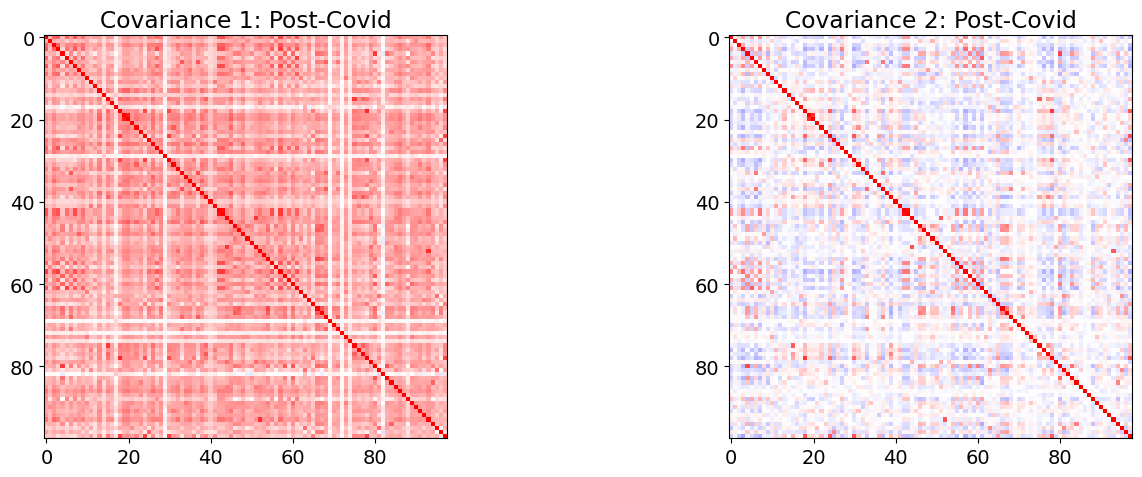

Cluster 1: Apple Inc., Adobe Inc., Advanced Micro Devices, Inc., Amazon.com, Inc., Salesforce, Inc., Alphabet Inc., Alphabet Inc., Meta Platforms, Inc., Microsoft Corporation, Netflix, Inc., NVIDIA Corporation
Cluster 2: American Tower Corporation, Digital Realty Trust, Inc., Equinix, Inc., Prologis, Inc., Public Storage
Cluster 3: Alibaba Group Holding Limited, Tesla, Inc.
Cluster 4: Bank of America Corporation, Bank of America Corporation, Prologis, Inc., Simon Property Group, Inc.
Cluster 5: BP p.l.c., ConocoPhillips, Chevron Corporation, Petróleo Brasileiro S.A. - Petrobras, Shell plc, Exxon Mobil Corporation
Cluster 6: EIDP, Inc., Roche Holding AG, Roche Holding AG
Cluster 7: The Boeing Company, Booking Holdings Inc., Anheuser-Busch InBev SA/NV, Caterpillar Inc., Deere & Company, Enbridge Inc., Freeport-McMoRan Inc., GE Aerospace, Rio Tinto Group, RTX Corporation, Southern Copper Corporation, Union Pacific Corporation
Cluster 8: Bank of America Corporation, BHP Group Limited, Berk

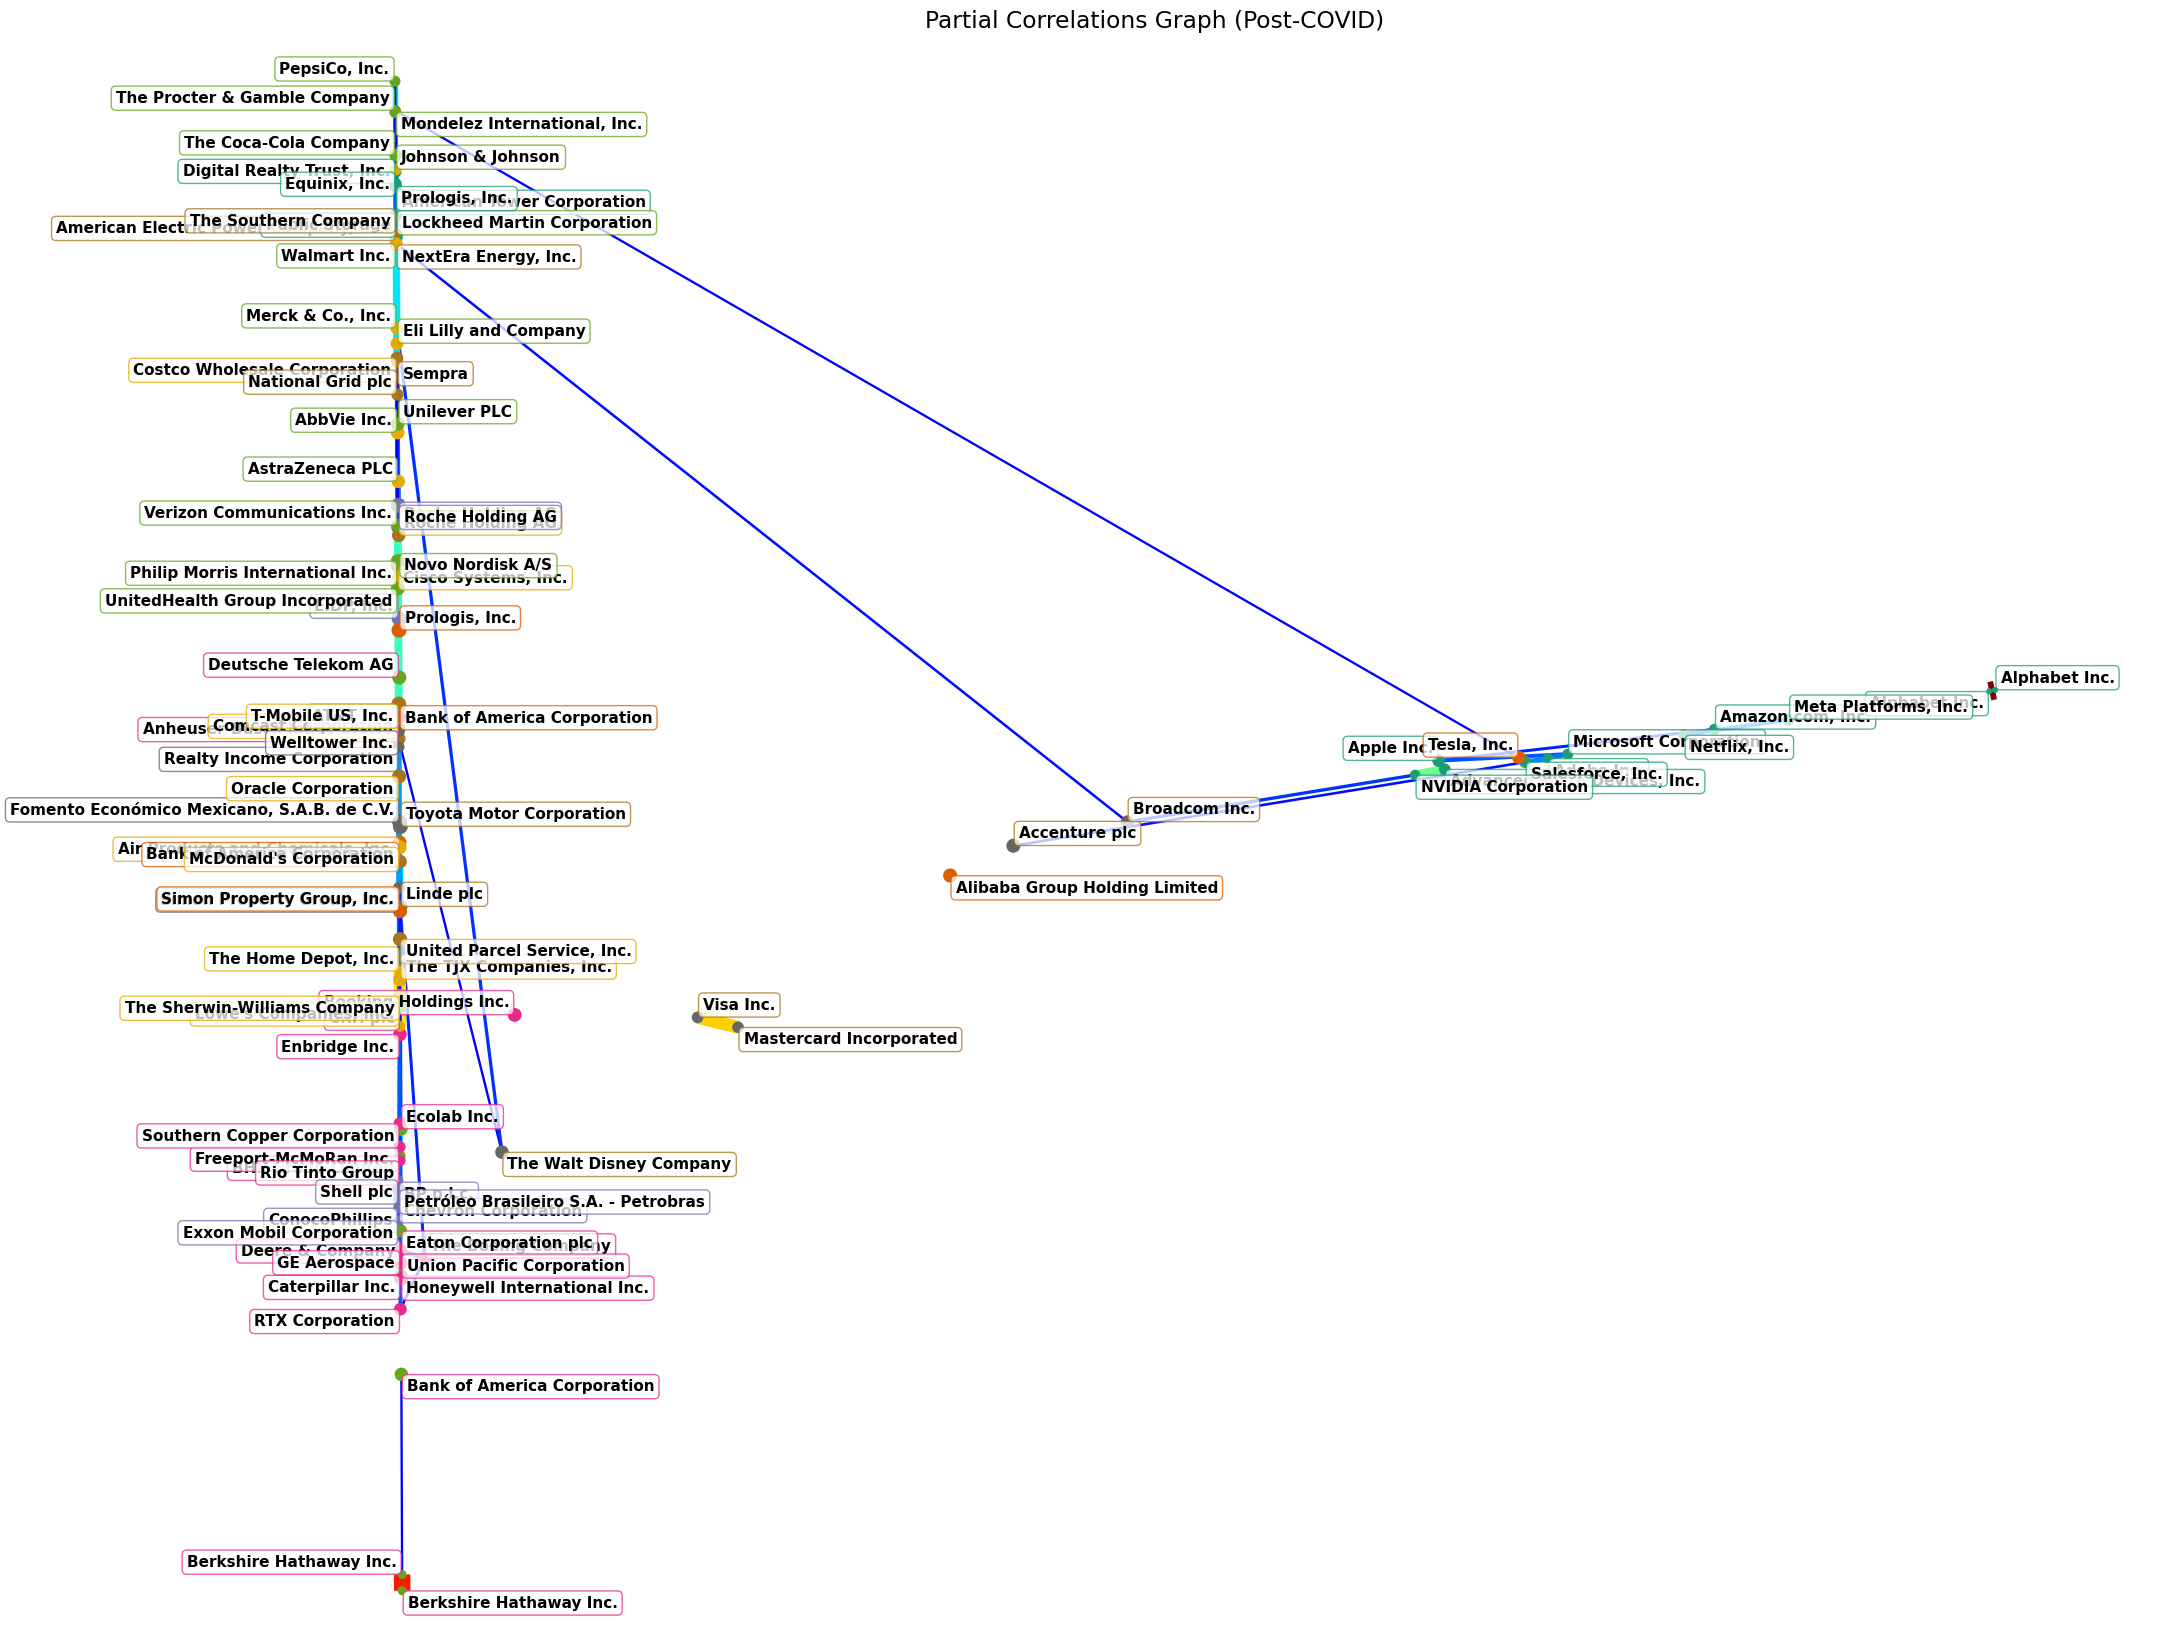

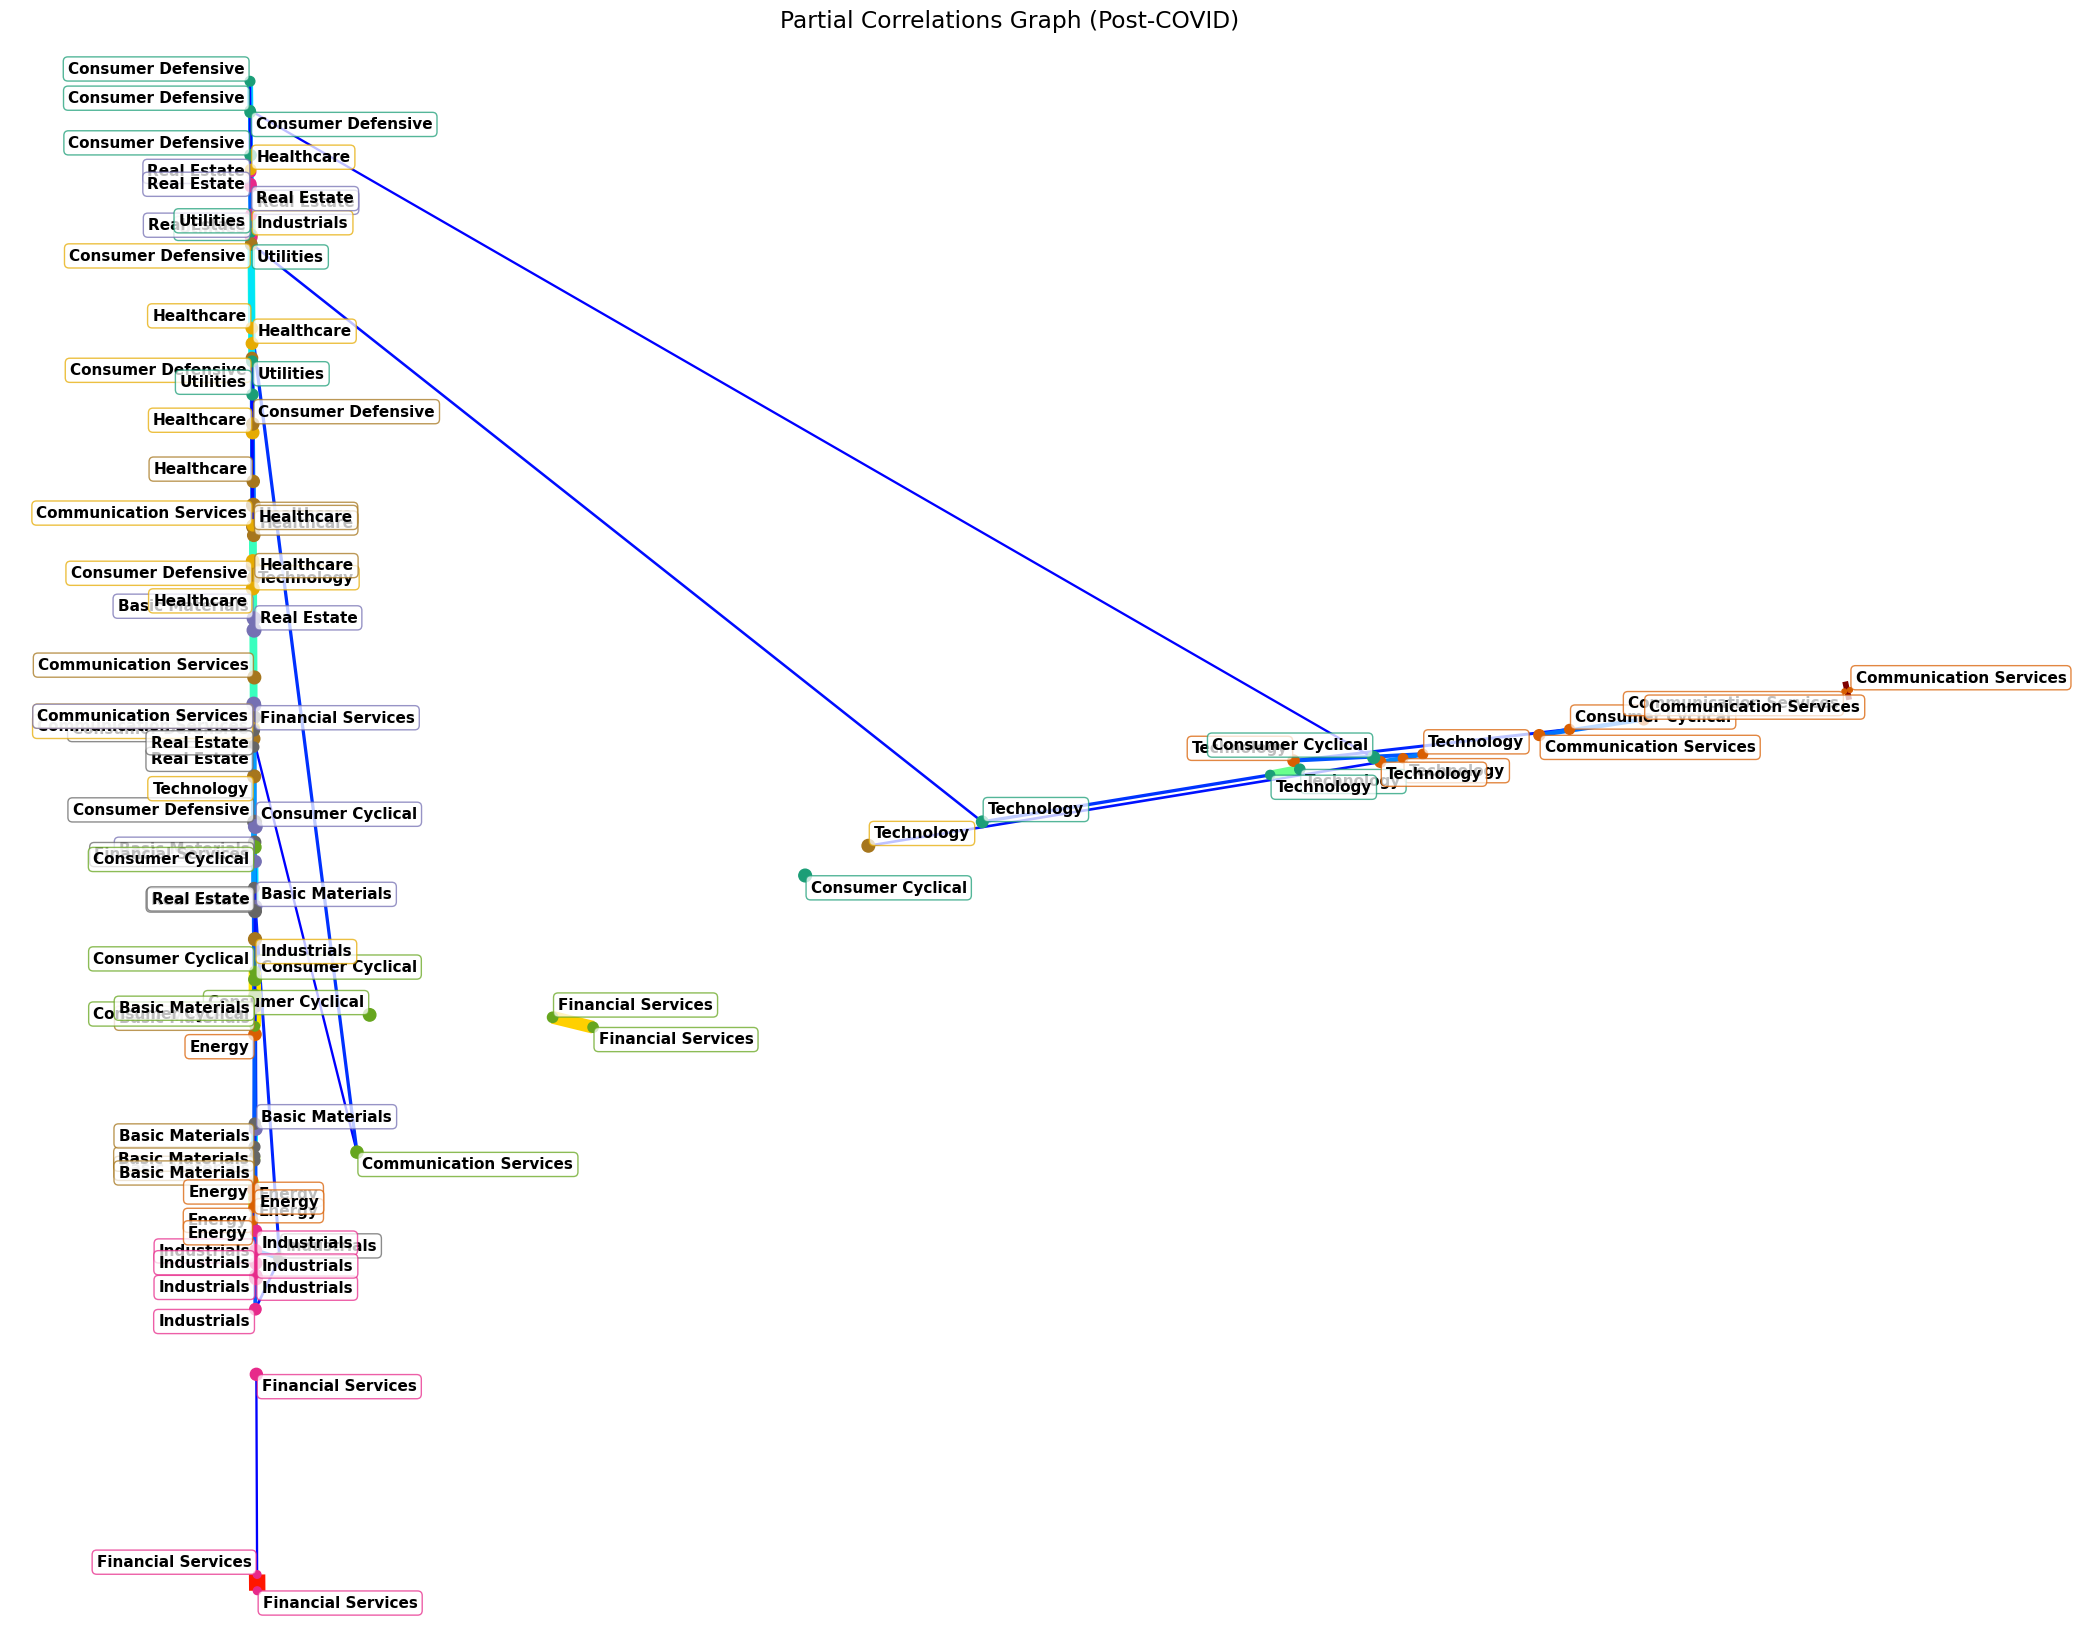

In [12]:
# post covid
post_model_1, post_model_2 = structure_recovery(analysis_post.corr_matrix, corr_matrix_post, 'Post-Covid')
post_labels = cluster_stocks(post_model_1.covariance_, 'Post-Covid', analysis_post)
post_labels2 = cluster_stocks(post_model_2.covariance_, 'Post-Covid', analysis_post)
# Finding a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver="dense", n_neighbors=6
)
embedding = node_position_model.fit_transform(analysis_post.returns_data).T
embedding = -1 * embedding
# Plot the partial correlations graph
plot_partial_correlations(post_model_2, embedding, post_labels, analysis_post.metadata['Company Name'], title="Partial Correlations Graph (Post-COVID)", scale_factor=6, font_size=11)
plot_partial_correlations(post_model_2, embedding, post_labels2, analysis_post.metadata['Sector'], title="Partial Correlations Graph (Post-COVID)", scale_factor=6, font_size=11)

